# <span style='font-family:"Times New Roman"'> <span styel=''>**CANCER SPECIFIC ANALYSIS**
*Emile Cohen*
    
 *April 2020*

**Goal:** In this notebook, we want to explore all the metrics for one specific cancer. The cancer_type will be a parameter of this notebook.

The notebook is composed of 3 parts:
   * **General Information**
   * **Genomic Information**
   * **Clinical Information**
---

In [561]:
%run -i '../../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')
from cancer_utils import *
from scipy.stats import fisher_exact, ranksums, chi2, norm
from statsmodels.sandbox.stats.multicomp import multipletests

data_path = '../../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [600]:
cancer_type = 'Soft Tissue Sarcoma'
mc = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
palette ={'>=1_LOSS':mc[0], 'HOMDEL':mc[1], '1_WILD_TYPE':mc[2], '>1muts':mc[3], '>=1_cnLOH':mc[4], '0_HETLOSS':mc[5]}
palette_list = [mc[5],mc[2],mc[3],mc[4],mc[0],mc[1]]
group_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '>=1_LOSS','HOMDEL']
master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
# We remove INDETERMINATE and NaN tp53_cn_state samples
master_cancer = master[master['Cancer_Type'] == cancer_type][master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]

In [3]:
set(master.Cancer_Type)

{'Adenocarcinoma In Situ',
 'Adrenocortical Carcinoma',
 'Ampullary Cancer',
 'Anal Cancer',
 'Appendiceal Cancer',
 'B-Lymphoblastic Leukemia/Lymphoma',
 'Bladder Cancer',
 'Blood Cancer, NOS',
 'Bone Cancer',
 'Breast Cancer',
 'Breast Sarcoma',
 'CNS Cancer',
 'Cancer of Unknown Primary',
 'Cervical Cancer',
 'Choroid Plexus Tumor',
 'Colorectal Cancer',
 'Embryonal Tumor',
 'Endometrial Cancer',
 'Esophagogastric Cancer',
 'Gastrointestinal Neuroendocrine Tumor',
 'Gastrointestinal Neuroendocrine Tumors of the Esophagus/Stomach',
 'Gastrointestinal Stromal Tumor',
 'Germ Cell Tumor',
 'Gestational Trophoblastic Disease',
 'Glioma',
 'Head and Neck Cancer',
 'Hepatobiliary Cancer',
 'Histiocytosis',
 'Lacrimal Gland Tumor',
 'Mature B-Cell Neoplasms',
 'Mature T and NK Neoplasms',
 'Melanoma',
 'Mesothelioma',
 'Miscellaneous Brain Tumor',
 'Miscellaneous Neuroepithelial Tumor',
 'Myelodysplastic Syndromes',
 'Nerve Sheath Tumor',
 'Non-Small Cell Lung Cancer',
 'Ovarian Cancer',
 '

# General

In [4]:
print_md('**' + cancer_type + '**')
print_md('* Number of samples: {}'.format(len(master_cancer)))
print_md('* Proportion in the entire cohort: {} %'.format(round(100*float(len(master_cancer))/float(len(master)),2)))

**Glioma**

* Number of samples: 1540

* Proportion in the entire cohort: 5.6 %

In [8]:
print(master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] == 'DIPLOID'].shape[0])
print(master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0])
print(master_cancer[master_cancer['tp53_count'] ==0][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0])

150
362
203


In [27]:
master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] == 'DIPLOID'].shape[0]

150

In [28]:
master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0]

362

In [529]:
master_cancer[master_cancer['tp53_count'] == 0][(master_cancer['tp53_cn_state'] == 'HOMDEL')| (master_cancer['tp53_cn_state'] == 'HETLOSS')]

Sample_Id           Tumor_Id Patient_Id  \
99     P-0034290-T01-IM6_P-0034290-N01-IM6  P-0034290-T01-IM6  P-0034290   
286    P-0018635-T02-IM6_P-0018635-N01-IM6  P-0018635-T02-IM6  P-0018635   
356    P-0025410-T01-IM6_P-0025410-N01-IM6  P-0025410-T01-IM6  P-0025410   
459    P-0015337-T01-IM6_P-0015337-N01-IM6  P-0015337-T01-IM6  P-0015337   
482    P-0029310-T01-IM6_P-0029310-N01-IM6  P-0029310-T01-IM6  P-0029310   
544    P-0002231-T01-IM3_P-0002231-N01-IM3  P-0002231-T01-IM3  P-0002231   
977    P-0032474-T01-IM6_P-0032474-N01-IM6  P-0032474-T01-IM6  P-0032474   
1166   P-0002130-T02-IM3_P-0002130-N01-IM3  P-0002130-T02-IM3  P-0002130   
1461   P-0000926-T01-IM3_P-0000926-N01-IM3  P-0000926-T01-IM3  P-0000926   
1508   P-0006196-T02-IM5_P-0006196-N01-IM5  P-0006196-T02-IM5  P-0006196   
1676   P-0025756-T01-IM6_P-0025756-N01-IM6  P-0025756-T01-IM6  P-0025756   
1807   P-0032024-T01-IM6_P-0032024-N01-IM6  P-0032024-T01-IM6  P-0032024   
1917   P-0020491-T01-IM6_P-0020491-N01-IM6  P-0020491-T01-IM6  P-0020491   
1933   P-0025308-T01-IM6_P-0025308-N01-IM6  P-0025308-T01-IM6  P-0025308   
2550   P-0036131-T01-IM6_P-0036131-N01-IM6  P-0036131-T01-IM6  P-0036131   
2692   P-0020393-T01-IM6_P-0020393-N01-IM6  P-0020393-T01-IM6  P-0020393   
3739   P-0037485-T01-IM6_P-0037485-N01-IM6  P-0037485-T01-IM6  P-0037485   
4519   P-0028471-T01-IM6_P-0028471-N01-IM6  P-0028471-T01-IM6  P-0028471   
4528   P-0013415-T01-IM5_P-0013415-N01-IM5  P-0013415-T01-IM5  P-0013415   
4723   P-0010829-T01-IM5_P-0010829-N01-IM5  P-0010829-T01-IM5  P-0010829   
5357   P-0004411-T01-IM5_P-0004411-N01-IM5  P-0004411-T01-IM5  P-0004411   
5787   P-0026362-T01-IM6_P-0026362-N01-IM6  P-0026362-T01-IM6  P-0026362   
5914   P-0025049-T01-IM6_P-0025049-N01-IM6  P-0025049-T01-IM6  P-0025049   
5978   P-0025954-T01-IM6_P-0025954-N02-IM6  P-0025954-T01-IM6  P-0025954   
6186   P-0024918-T01-IM6_P-0024918-N01-IM6  P-0024918-T01-IM6  P-0024918   
6366   P-0006884-T01-IM5_P-0006884-N01-IM5  P-0006884-T01-IM5  P-0006884   
6576   P-0022431-T01-IM6_P-0022431-N01-IM6  P-0022431-T01-IM6  P-0022431   
6694   P-0036526-T01-IM6_P-0036526-N01-IM6  P-0036526-T01-IM6  P-0036526   
6923   P-0036914-T01-IM6_P-0036914-N01-IM6  P-0036914-T01-IM6  P-0036914   
7744   P-0006258-T01-IM5_P-0006258-N01-IM5  P-0006258-T01-IM5  P-0006258   
7909   P-0012398-T01-IM5_P-0012398-N01-IM5  P-0012398-T01-IM5  P-0012398   
8473   P-0008918-T03-IM5_P-0008918-N01-IM5  P-0008918-T03-IM5  P-0008918   
8508   P-0003498-T01-IM5_P-0003498-N01-IM5  P-0003498-T01-IM5  P-0003498   
8554   P-0033623-T01-IM6_P-0033623-N01-IM6  P-0033623-T01-IM6  P-0033623   
9013   P-0001948-T01-IM3_P-0001948-N01-IM3  P-0001948-T01-IM3  P-0001948   
9109   P-0028991-T01-IM6_P-0028991-N01-IM6  P-0028991-T01-IM6  P-0028991   
9462   P-0023399-T01-IM6_P-0023399-N01-IM6  P-0023399-T01-IM6  P-0023399   
10291  P-0037551-T01-IM6_P-0037551-N01-IM6  P-0037551-T01-IM6  P-0037551   
10328  P-0010403-T01-IM5_P-0010403-N01-IM5  P-0010403-T01-IM5  P-0010403   
10592  P-0013164-T01-IM5_P-0013164-N01-IM5  P-0013164-T01-IM5  P-0013164   
10842  P-0002501-T01-IM3_P-0002501-N01-IM3  P-0002501-T01-IM3  P-0002501   
11050  P-0037109-T01-IM6_P-0037109-N01-IM6  P-0037109-T01-IM6  P-0037109   
11168  P-0030917-T02-IM6_P-0030917-N01-IM6  P-0030917-T02-IM6  P-0030917   
11868  P-0006490-T01-IM5_P-0006490-N01-IM5  P-0006490-T01-IM5  P-0006490   
12472  P-0030963-T01-IM6_P-0030963-N01-IM6  P-0030963-T01-IM6  P-0030963   
12941  P-0003959-T01-IM3_P-0003959-N01-IM3  P-0003959-T01-IM3  P-0003959   
12962  P-0004671-T01-IM5_P-0004671-N01-IM5  P-0004671-T01-IM5  P-0004671   
13268  P-0021061-T01-IM6_P-0021061-N01-IM6  P-0021061-T01-IM6  P-0021061   
13292  P-0013530-T01-IM5_P-0013530-N01-IM5  P-0013530-T01-IM5  P-0013530   
13349  P-0022538-T01-IM6_P-0022538-N01-IM6  P-0022538-T01-IM6  P-0022538   
13683  P-0003512-T01-IM5_P-0003512-N01-IM5  P-0003512-T01-IM5  P-0003512   
13881  P-0008263-T01-IM5_P-0008263-N01-IM5  P-0008263-T01-IM5  P-0008263   
14204

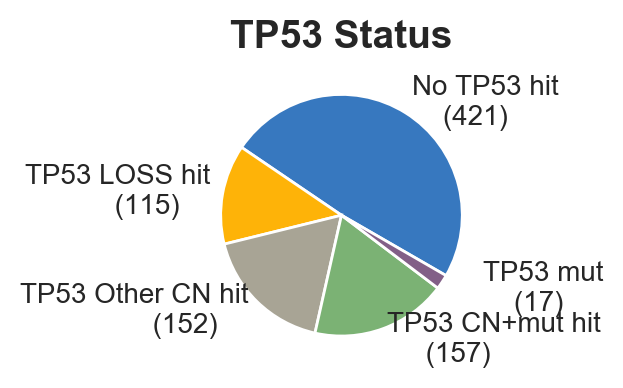

In [601]:
fig = plt.figure(figsize=(4,2))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

sizes = [master_cancer.shape[0] - master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] == 'DIPLOID'].shape[0] - master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0] - master_cancer[master_cancer['tp53_count'] ==0][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0], 
        master_cancer[master_cancer['tp53_count'] == 0][(master_cancer['tp53_cn_state'] == 'HOMDEL')| (master_cancer['tp53_cn_state'] == 'HETLOSS')].shape[0],
        master_cancer[master_cancer['tp53_count'] ==0][master_cancer['tp53_cn_state'] != 'DIPLOID'][~((master_cancer['tp53_cn_state'] == 'HOMDEL')| (master_cancer['tp53_cn_state'] == 'HETLOSS'))].shape[0],
        master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0],
        master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] == 'DIPLOID'].shape[0]  
        ]

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

labels = ['No TP53 hit\n    (' + str(sizes[0])+')', 'TP53 LOSS hit\n     ('+str(sizes[1])+')    ','TP53 Other CN hit\n     ('+str(sizes[2])+')    ', 'TP53 CN+mut hit\n     ('+str(sizes[3])+')     ',  '    TP53 mut\n        ('+str(sizes[4])+')     ']
patches, texts = ax.pie(sizes, labels=labels, startangle=330, colors=sns.xkcd_palette(colors))
texts = [ _.set_fontsize(10) for _ in texts ]
ax.set_title('TP53 Status', weight='bold', fontsize=14)
plt.show()
plt.show(fig)

In [53]:
master_cancer[master_cancer['tp53_count'] >=1].shape[0]

512

## Sample Type proportion

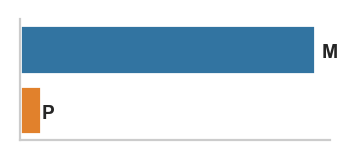

In [78]:
sns.set_style("whitegrid", {'grid.color': '1.'})
fig = plt.figure(figsize=(2,0.8))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
g = sns.countplot(data=master_cancer, y='Sample_Type', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
g.set(xticklabels=[])
g.set(yticklabels=[])

rects = ax.patches
labels = ['M', 'P']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width*(102/100) , rect.get_y()+(3/4)*height,  str(label),
        ha='left', va='bottom', weight='bold', fontsize=7) 


count_Sample_Type
Sample_Type                   
Metastasis                 761
Primary                    290

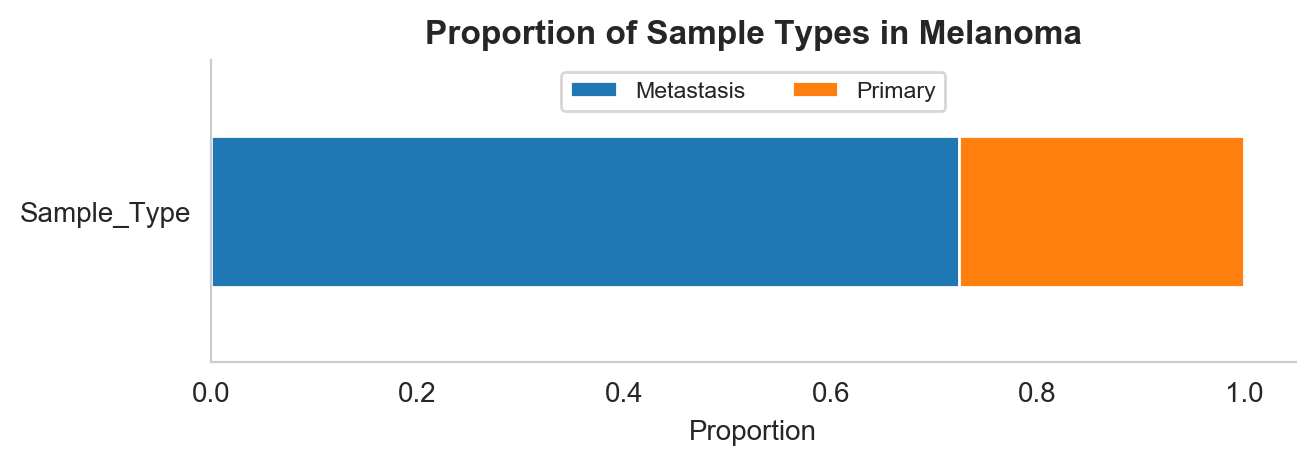

In [243]:
fig, ax = proportion_plot(master_cancer, 
                metrics='Sample_Type',
                title= 'Proportion of Sample Types in ' + cancer_type,
                figsize=(7,2),
                display_table=True, 
                ncol_legend =2)

## TP53 Mutants

**Melanoma**

* Number of TP53 muted samples: 183 

* Proportion of TP53 muted samples: 17.26 %

count_tp53_count
tp53_count                  
0                        877
1                        160
2                         19
3                          4

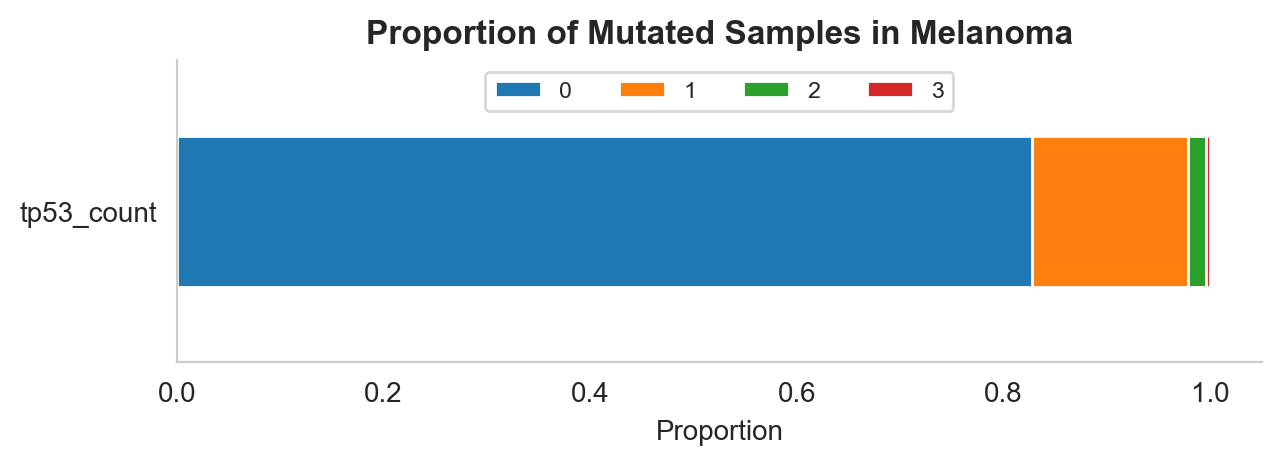

In [244]:
print_md('**' + cancer_type + '**')
print_md('* Number of TP53 muted samples: {} '.format(len(master_cancer[master_cancer['tp53_count']>=1])))
print_md('* Proportion of TP53 muted samples: {} %'.format(round(100*float(len(master_cancer[master_cancer['tp53_count']>=1]))/float(len(master_cancer)),2)))

fig, ax = proportion_plot(master_cancer, 
                metrics='tp53_count',
                title= 'Proportion of Mutated Samples in ' + cancer_type,
                figsize=(7,2),
                display_table=True, 
                ncol_legend =6)

prim_count  met_count     sum
tp53_count                               
0                 1219      640.0  1859.0
1                  946      809.0  1755.0
2                   87       49.0   136.0
3                    6        3.0     9.0
4                    1        NaN     NaN

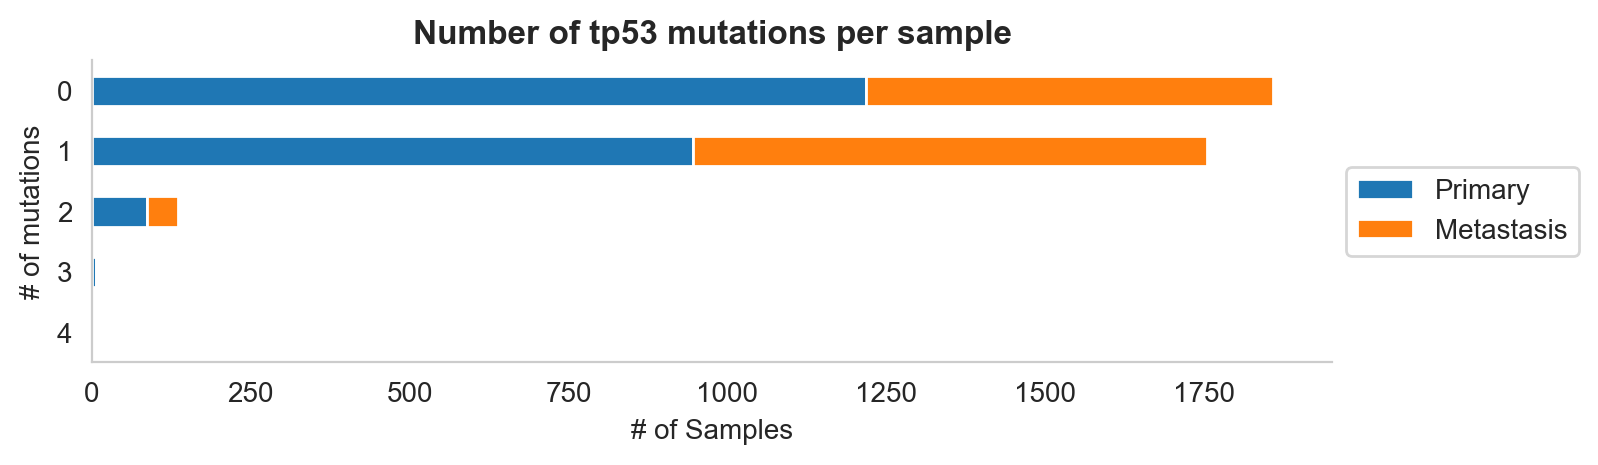

In [33]:
master_tp53 = master_cancer[master_cancer['tp53_count'] >= 0]
# We filter out the duplicates and keep only the Primary Samples
master_tp53_prim = master_tp53[master_tp53['Sample_Type'] == 'Primary']
master_tp53_met = master_tp53[master_tp53['Sample_Type'] == 'Metastasis']

# Counting
count_0hetloss = get_groupby(master_tp53_prim, 'tp53_count', 'prim_count')
count_met = get_groupby(master_tp53_met, 'tp53_count', 'met_count')

#We rename the column
count = pd.concat([count_prim, count_met],
                  axis=1).sort_values(by=['prim_count'])
count['sum'] = count.apply(lambda x: x.prim_count + x.met_count, axis=1)
count_ = count.sort_values(by='sum', ascending=False)
len(master_cancer)
print()
display(count_)

ax, fig = get_mstacked_plot(count[['prim_count', 'met_count']],
                            'Number of tp53 mutations per sample',
                            ['Primary', 'Metastasis'],
                            '# of Samples',
                            '# of mutations',
                            figsize=(10, 2))

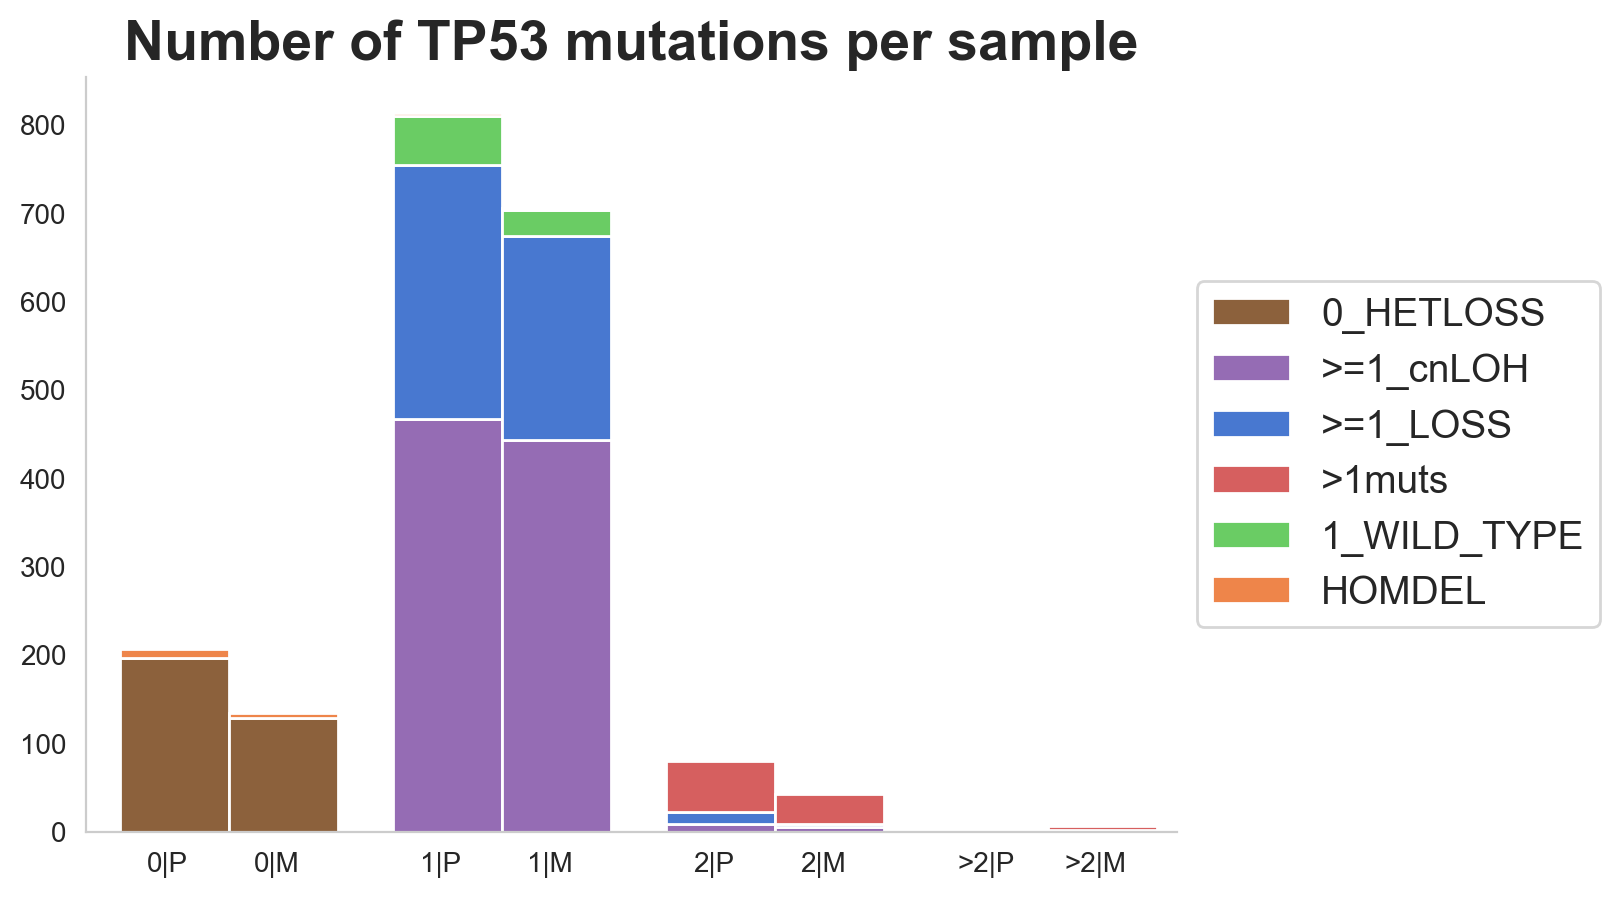

In [302]:
groups = ['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL']

for i,group in enumerate(groups):
    master_group = master_cancer[master_cancer['tp53_group'] == group]#[master_cancer['tp53_count']<4]
    groupby_prim = get_groupby(master_group[master_group['Sample_Type'] == 'Primary'], 'tp53_count', group + '_count')
    groupby_met = get_groupby(master_group[master_group['Sample_Type'] == 'Metastasis'], 'tp53_count', group + '_count')
    if i == 0 : met = groupby_met ; prim = groupby_prim
    else: met = pd.concat([met, groupby_met], axis=1) ; prim = pd.concat([prim, groupby_prim], axis=1)
for i in [0,1,2,3,4,5]:
    if i not in met.index: met.loc[i]=[0]*6
    if i not in prim.index: prim.loc[i]=[0]*6   
met = met.fillna(0) ; prim = prim.fillna(0)
met.index = ['0 | M', '1 | M', '2 | M', '3 | M', '4 | M', '5 | M'] ; prim.index = ['0 | P', '1 | P', '2 | P', '3 | P', '4 | P', '5 | P']
count = pd.concat([met, prim], axis=0)
#count['sum'] = count.sum(axis=1)
count= count.fillna(0)
count = count.reindex(['0 | P', '0 | M','1 | P','1 | M','2 | P','2 | M','3 | P','3 | M', '4 | P', '4 | M', '5 | P', '5 | M'])
count.loc['>2 | M'] = count.apply(lambda x: x['3 | M'] + x['4 | M'] + x['5 | M'], axis=0)
count.loc['>2 | P'] = count.apply(lambda x: x['3 | P'] + x['4 | P'] + x['5 | P'], axis=0)
count = count.drop(['3 | P','3 | M', '4 | P', '4 | M', '5 | P', '5 | M'])


fig = plt.figure(figsize=(11,5))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
h = count.plot(kind = 'bar', stacked=True, ax=ax)
h.set_xticklabels(['0|P', '0|M','1|P','1|M','2|P','2|M','>2|P','>2|M'], rotation=0)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.set_title('Number of TP53 mutations per sample',weight='bold', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(True)

palette_list_new = [mc[5],mc[4],mc[0],mc[3],mc[2], mc[1]]
for j,container in enumerate(ax.containers):
    for i, child in enumerate(container.get_children()):
        child.set_facecolor(palette_list_new[j])
        if i%2 == 1: child.set_x(child.get_x() - 0.2)
        child.set_width(0.8)
        
ax.set_xticks([0.1, 0.9, 2.1, 2.9, 4.1, 4.9, 6.1, 6.9])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL'],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)



#h[1].set_facecolor('red')
plt.show()

## Subgroup proportion

In [ ]:
def proportion_plot(df:pd.DataFrame, metrics: str,title: str,  figsize=(7,2),display_table=False, tp53_metrics=False, ncol_legend:int =5):
    if tp53_metrics == True:
            data_1 =  pd.DataFrame(df[['Tumor_Id', metrics + '_1']])
            data_1.columns = ['Tumor_Id', metrics]
            data_2 = pd.DataFrame(df[['Tumor_Id', metrics + '_2']])
            data_2.columns = ['Tumor_Id', metrics]
            data_3 = pd.DataFrame(df[['Tumor_Id', metrics + '_3']])
            data_3.columns = ['Tumor_Id', metrics]
            data_4 = pd.DataFrame(df[['Tumor_Id', metrics + '_4']])
            data_4.columns = ['Tumor_Id', metrics]
            data_5 = pd.DataFrame(df[['Tumor_Id', metrics + '_5']])
            data_5.columns = ['Tumor_Id', metrics]
            data_tot = data_1.append(data_2)
            data_tot = data_tot.append(data_3)
            data_tot = data_tot.append(data_4)
            data_tot = data_tot.append(data_5)
    
            df = pd.merge(left=data_tot, right=df[['Tumor_Id','tp53_cn_state', 'tp53_tcn', 'Sample_Type']],how='left', left_on='Tumor_Id',right_on='Tumor_Id')

    count = get_groupby(df, metrics, 'count_' + metrics)
    freq = pd.DataFrame(count['count_' + metrics]).sort_values(by=['count_' + metrics], ascending=False)/ pd.DataFrame(count['count_' + metrics]).sum()
    freq.columns=['%']
    if display_table:
        display(count.sort_values(by = 'count_'+metrics, ascending=False))

    fig, ax = plt.subplots()
    freq.T.plot(kind = 'barh', stacked=True, figsize = figsize, ax=ax, yticks=[])
    plt.title(title, weight = 'bold')
    plt.legend(loc = 'upper center', fontsize='small', ncol=ncol_legend)
    ax.yaxis.set_major_formatter(matplotlib.ticker.IndexFormatter([metrics]))
    ax.set_xlabel('Proportion')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return fig, ax

P         M
0_HETLOSS    0.047809  0.044737
1_WILD_TYPE  0.035857  0.023684
>1muts       0.011952       NaN
>=1_cnLOH    0.573705  0.657895
>=1_LOSS     0.318725  0.273684
HOMDEL       0.011952       NaN

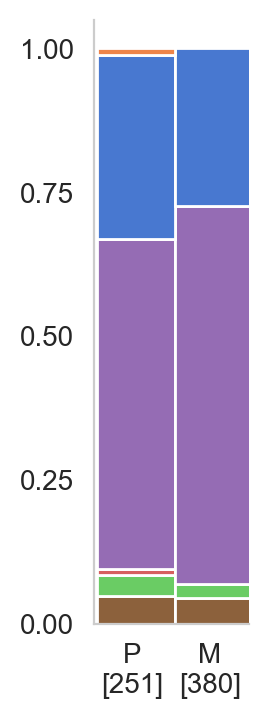

In [424]:
fig, ax = plt.subplots()
metrics='tp53_group'

count_prim = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Primary'], metrics, 'count_prim_' + metrics)
count_met = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'], metrics, 'count_met_' + metrics)
freq_prim = pd.DataFrame(count_prim['count_prim_' + metrics]).sort_values(by=['count_prim_' + metrics], ascending=False)/ pd.DataFrame(count_prim['count_prim_' + metrics]).sum()
freq_met = pd.DataFrame(count_met['count_met_' + metrics]).sort_values(by=['count_met_' + metrics], ascending=False)/ pd.DataFrame(count_met['count_met_' + metrics]).sum()
freq_prim.columns=['P'] ; freq_met.columns=['M']
freq = pd.concat([freq_prim, freq_met], axis=1)
freq = freq.reindex(group_list)
display(freq)

freq.T.plot(kind = 'bar', stacked=True, figsize = (1,4), ax=ax, yticks=[0,0.25,0.5,0.75,1], color=palette_list)
ax.set_title('', weight = 'bold', fontsize=12)
ax.legend_.remove()
ax.xaxis.set_major_formatter(matplotlib.ticker.IndexFormatter([ 'P\n' + str(pd.DataFrame(count_prim['count_prim_' + metrics]).sum().values), 'M\n' + str(pd.DataFrame(count_met['count_met_' + metrics]).sum().values)]))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for container in ax.containers:
    for i, child in enumerate(container.get_children()):
        child.set_x(child.get_x() - 0.2)
        child.set_width(1)
        
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

#ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
#ax.set_yticklabels(['P ' + str(pd.DataFrame(count_prim['count_prim_' + metrics]).sum().values), 'M ' + str(pd.DataFrame(count_met['count_met_' + metrics]).sum().values)])

P         M
tp53_res_group                    
no_tp53_res     0.723529  0.678261
tp53_res        0.252941  0.295652
uncertain       0.023529  0.026087

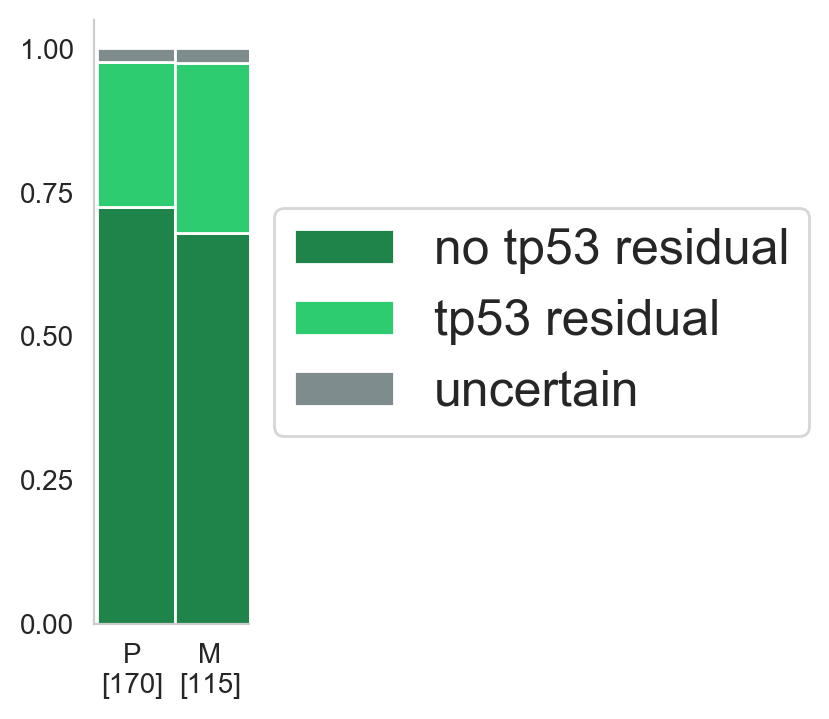

In [541]:
fig, ax = plt.subplots()
metrics='tp53_res_group'
res_group_list = ['no_tp53_res','tp53_res', 'uncertain']
palette_res = ['#1E8449','#2ECC71',  '#7F8C8D']

count_prim = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Primary'], metrics, 'count_prim_' + metrics)
count_met = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'], metrics, 'count_met_' + metrics)
freq_prim = pd.DataFrame(count_prim['count_prim_' + metrics]).sort_values(by=['count_prim_' + metrics], ascending=False)/ pd.DataFrame(count_prim['count_prim_' + metrics]).sum()
freq_met = pd.DataFrame(count_met['count_met_' + metrics]).sort_values(by=['count_met_' + metrics], ascending=False)/ pd.DataFrame(count_met['count_met_' + metrics]).sum()
freq_prim.columns=['P'] ; freq_met.columns=['M']
freq = pd.concat([freq_prim, freq_met], axis=1)
freq = freq.reindex(res_group_list )
display(freq)

freq.T.plot(kind = 'bar', stacked=True, figsize = (1,4), ax=ax, yticks=[0,0.25,0.5,0.75,1], color=palette_res)
ax.set_title('', weight = 'bold', fontsize=12)

# Shrink current axis by 20%
box = ax_inner_muttype.get_position()
ax_inner_muttype.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(['no tp53 residual', 'tp53 residual', 'uncertain'],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)



#ax.legend(['tp53 residual', 'no tp53 residual', 'uncertain'])
ax.xaxis.set_major_formatter(matplotlib.ticker.IndexFormatter([ 'P\n' + str(pd.DataFrame(count_prim['count_prim_' + metrics]).sum().values), 'M\n' + str(pd.DataFrame(count_met['count_met_' + metrics]).sum().values)]))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for container in ax.containers:
    for i, child in enumerate(container.get_children()):
        child.set_x(child.get_x() - 0.2)
        child.set_width(1)
        
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

In [473]:
get_groupby(master_cancer, 'tp53_res_group', 'count')

count
tp53_res_group       
no_tp53_res       560
tp53_res           47
uncertain          24

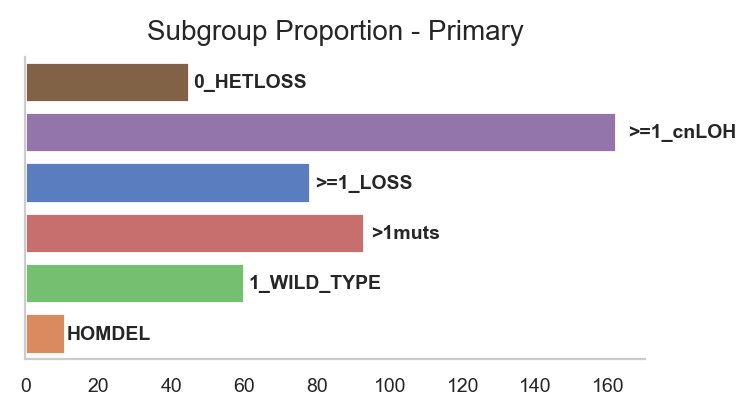

In [84]:
sns.set_style("whitegrid", {'grid.color': '1.'})
fig = plt.figure(figsize=(4,2))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax.set_title('Subgroup Proportion - Primary', fontsize=10)
g = sns.countplot(data=master_cancer[master_cancer['Sample_Type']== 'Primary'],
                  y='tp53_group', ax=ax,
                  order = ['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL'],
                 palette=palette)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
#g.set(xticklabels=[])
g.set(yticklabels=[])
ax.xaxis.set_tick_params(labelsize=7)


rects = ax.patches
labels = ['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL']
for rect, label in zip(rects, labels):
    height = rect.get_height() 
    width = rect.get_width()
    if np.isnan(width) : width = 0
    ax.text(width*(102/100) , rect.get_y()+(3/4)*height,  str(label),
       ha='left', va='bottom', weight='bold', fontsize=7) 

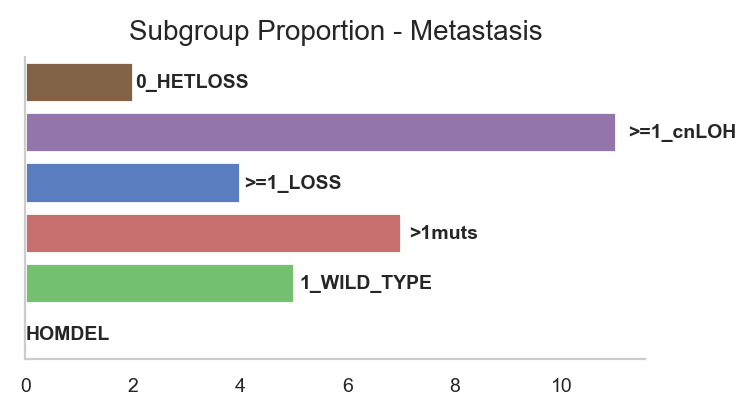

In [85]:
# Prim Samples
sns.set_style("whitegrid", {'grid.color': '1.'})
fig = plt.figure(figsize=(4,2))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax.set_title('Subgroup Proportion - Metastasis', fontsize=10)
g = sns.countplot(data=master_cancer[master_cancer['Sample_Type']== 'Metastasis'],
                  order=['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL'],
                  y='tp53_group', ax=ax,
                 palette=palette)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
#g.set(xticklabels=[])
g.set(yticklabels=[])
ax.xaxis.set_tick_params(labelsize=7)

rects = ax.patches
labels = ['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    width = rect.get_width()
    width = rect.get_width()
    if np.isnan(width) : width = 0
    ax.text(width*(102/100) , rect.get_y()+(3/4)*height,  str(label),
        ha='left', va='bottom', weight='bold', fontsize=7) 

In [378]:
groupby_met = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'], 'tp53_group', 'count')
groupby_prim = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Primary'], 'tp53_group', 'count')


groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
    
for groupbys in [groupby_prim, groupby_met]:
    for group in ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']:
        if group not in groupbys: groupbys[group] = 0

desired_order_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']
groupby_prim = {k: groupby_prim[k] for k in desired_order_list}
groupby_met = {k: groupby_met[k] for k in desired_order_list}
print(groupby_met)
print(groupby_prim)

{'0_HETLOSS': 17, '1_WILD_TYPE': 9, '>1muts': 0, '>=1_LOSS': 104, '>=1_cnLOH': 250, 'HOMDEL': 0}
{'0_HETLOSS': 12, '1_WILD_TYPE': 9, '>1muts': 3, '>=1_LOSS': 80, '>=1_cnLOH': 144, 'HOMDEL': 3}


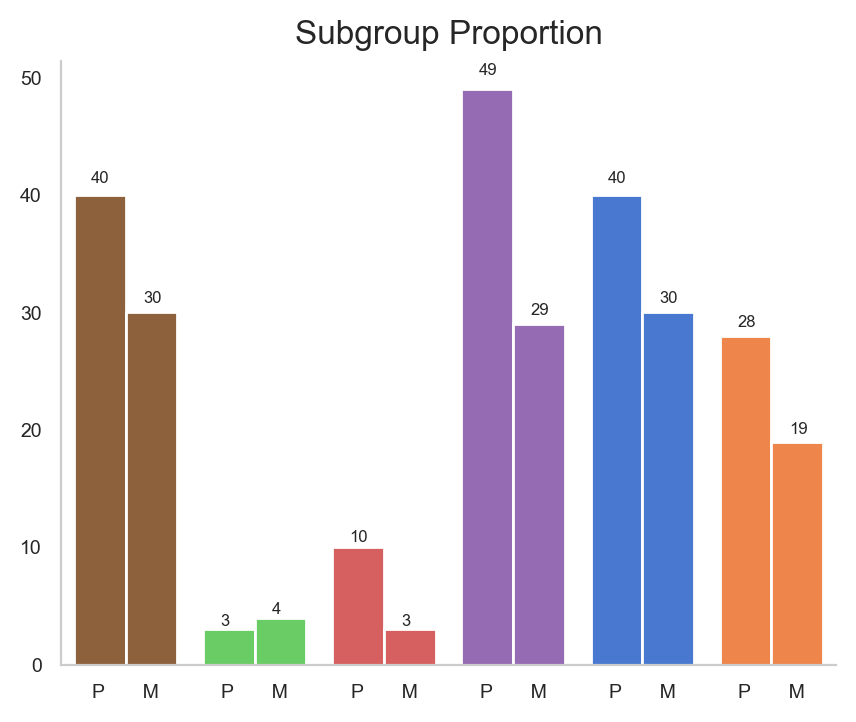

In [602]:
# Met Samples
group_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '>=1_LOSS','HOMDEL']
sns.set_style("whitegrid", {'grid.color': '1.'})
fig = plt.figure(figsize=(5,4))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax.set_title('Subgroup Proportion', fontsize=12)
master_cancer_prim = master_cancer[master_cancer['Sample_Type'] == 'Primary']
master_cancer_met = master_cancer[master_cancer['Sample_Type'] == 'Metastasis']
master_cancer_new = master_cancer_prim.append(master_cancer_met)
groupby_met = get_groupby(master_cancer_met, 'tp53_group', 'count')
groupby_prim = get_groupby(master_cancer_prim, 'tp53_group', 'count')
groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
    
for groupbys in [groupby_prim, groupby_met]:
    for group in ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']:
        if group not in groupbys: groupbys[group] = 0

desired_order_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']
groupby_prim = {k: groupby_prim[k] for k in desired_order_list}
groupby_met = {k: groupby_met[k] for k in desired_order_list}


g = sns.countplot(data=master_cancer_new, x='tp53_group', ax=ax, hue='Sample_Type',
                  order=group_list)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)
ax.set_xticklabels(['P       M']*6)
ax.get_legend().remove()

rects = ax.patches
labels = group_list*2
met_prim = ['P']*6 + ['M']*6
for rect, label, i in zip(rects, labels, range(12)):
    height = rect.get_height()
    width = rect.get_width()
    rect.set_width(1*width)
    if np.isnan(height) : height = 0
    if i<=5:
        ax.text(rect.get_x()+width/3,height*(102/100),  str(groupby_prim[group_list[i]]),
        ha='left', va='bottom', fontsize=6)
    if i>5:
        ax.text(rect.get_x()+width/3,height*(102/100),  str(groupby_met[group_list[i-6]]),
        ha='left', va='bottom', fontsize=6)
    rect.set_facecolor(palette[label])


## Densities (Purity, VAF, CCF)

### Purity

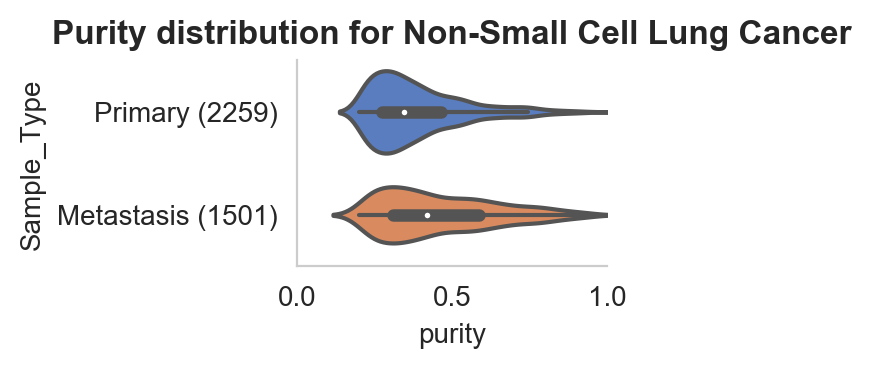

In [10]:
sns.set_style("whitegrid", {'grid.color': '1.'})
fig, ax = boxplot_sampletype(master_cancer,
                             'purity',
                             figsize= (2,3),
                             title='Purity distribution for ' + cancer_type, 
                             title_font=12,
                            continuous=True)

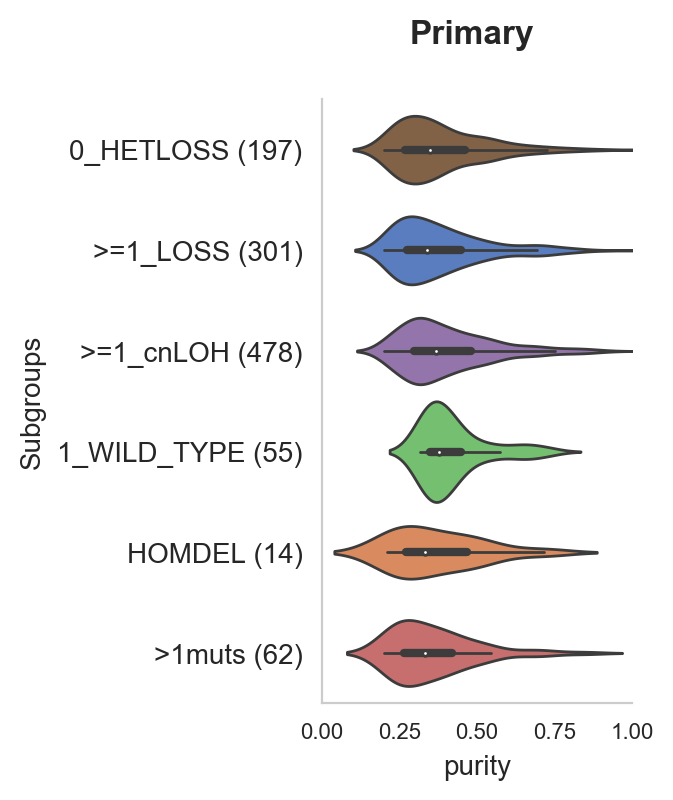

In [24]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='purity', 
                         title= 'Primary', 
                         figsize = (2, 4),  
                         xlim=1, 
                         met_prim = 'Primary',
                         continuous=True,
                         linewidth=1)

plt.show(fig)

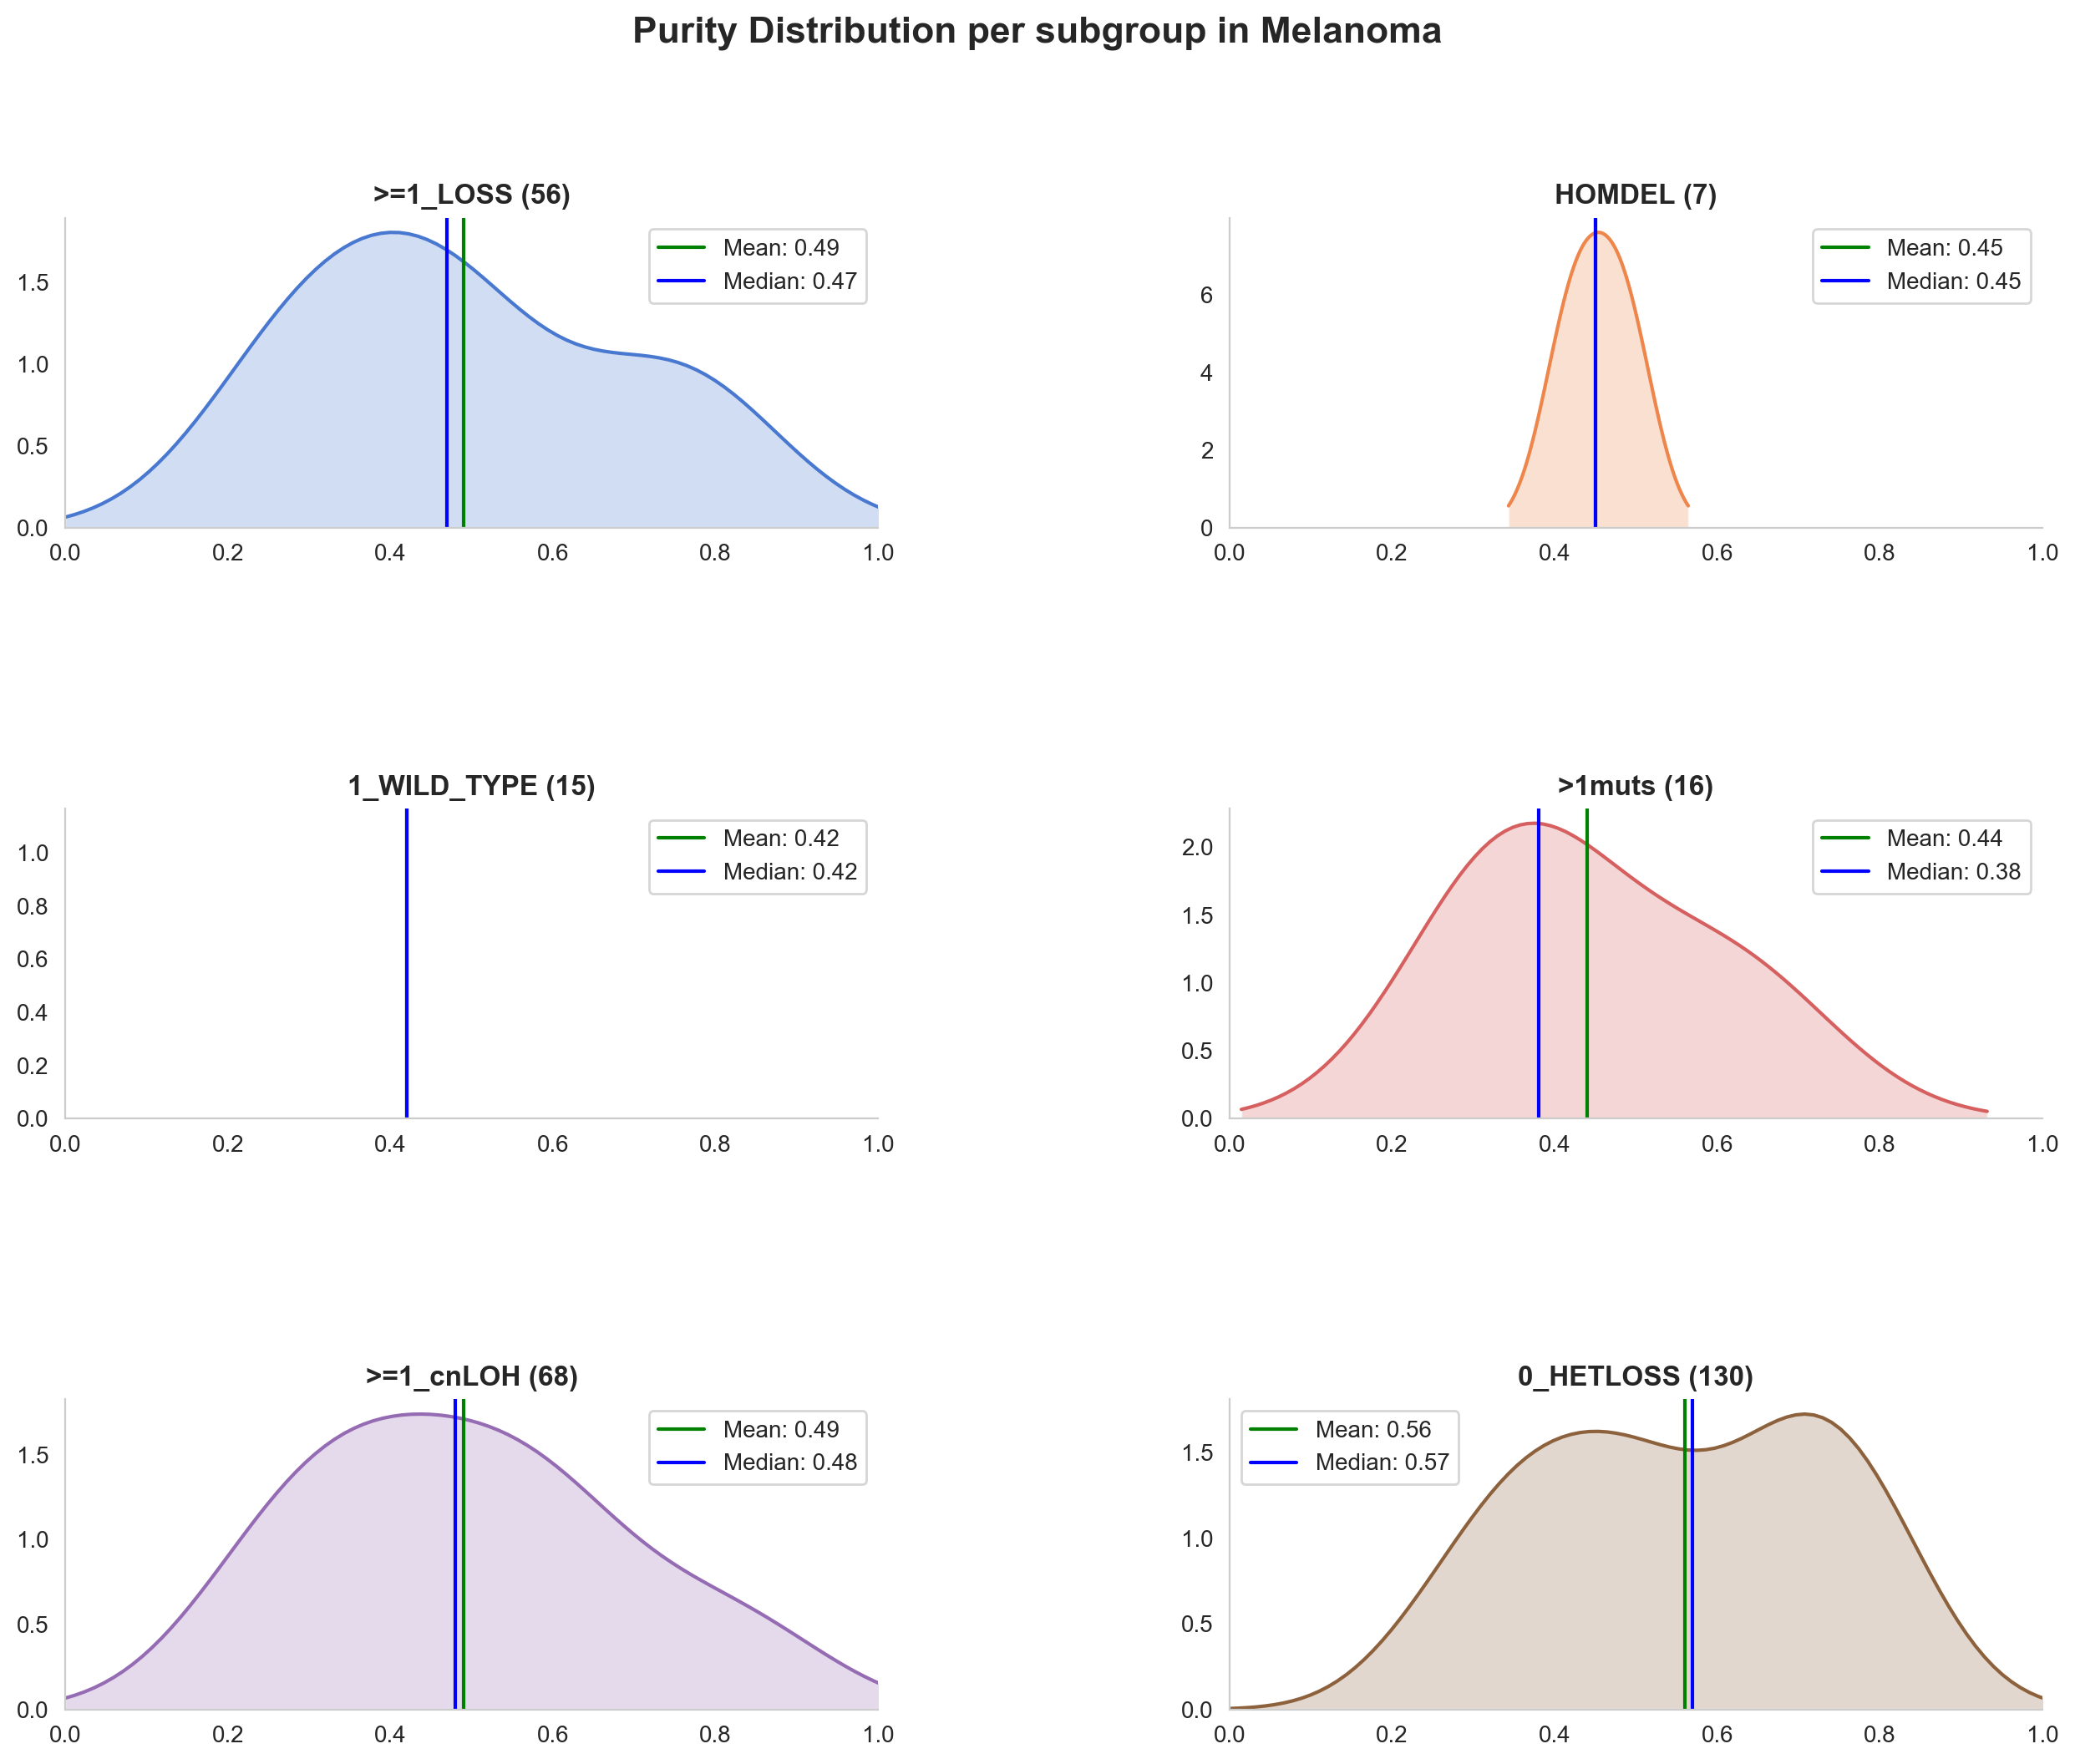

In [251]:
fig, ax = get_densities(master_cancer,
              metrics= 'purity', 
              fig_title= 'Purity Distribution per subgroup in ' + cancer_type, 
              xlabel='', 
              ylabel='',  
              number=6, 
              tp53_metrics=False,
              met_prim = 'Primary', 
              clip = (0.0,3.0), 
              x_lim =[0,1])

### TP53

#### VAF

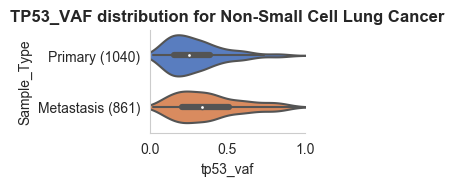

In [4]:
sns.set_style("whitegrid", {'grid.color': '1.'})
fig, ax = boxplot_sampletype(master_cancer,
                             'tp53_vaf', 
                             figsize= (2,3), 
                             title='TP53_VAF distribution for ' + cancer_type, 
                             tp53_metrics=True,
                             title_font=12,
                            continuous=True)

{'1_WILD_TYPE': 55, '>1muts': 62, '>=1_LOSS': 301, '>=1_cnLOH': 478, 'HOMDEL': 4}


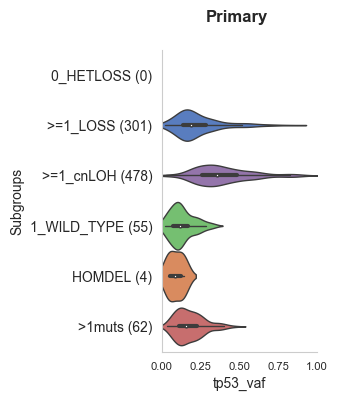

In [5]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='tp53_vaf', 
                         title= 'Primary', 
                         figsize = (2, 4),  
                         xlim=1, 
                         met_prim = 'Primary',
                         continuous=True,
                         tp53_metrics=True,
                         linewidth=1)

plt.show(fig)

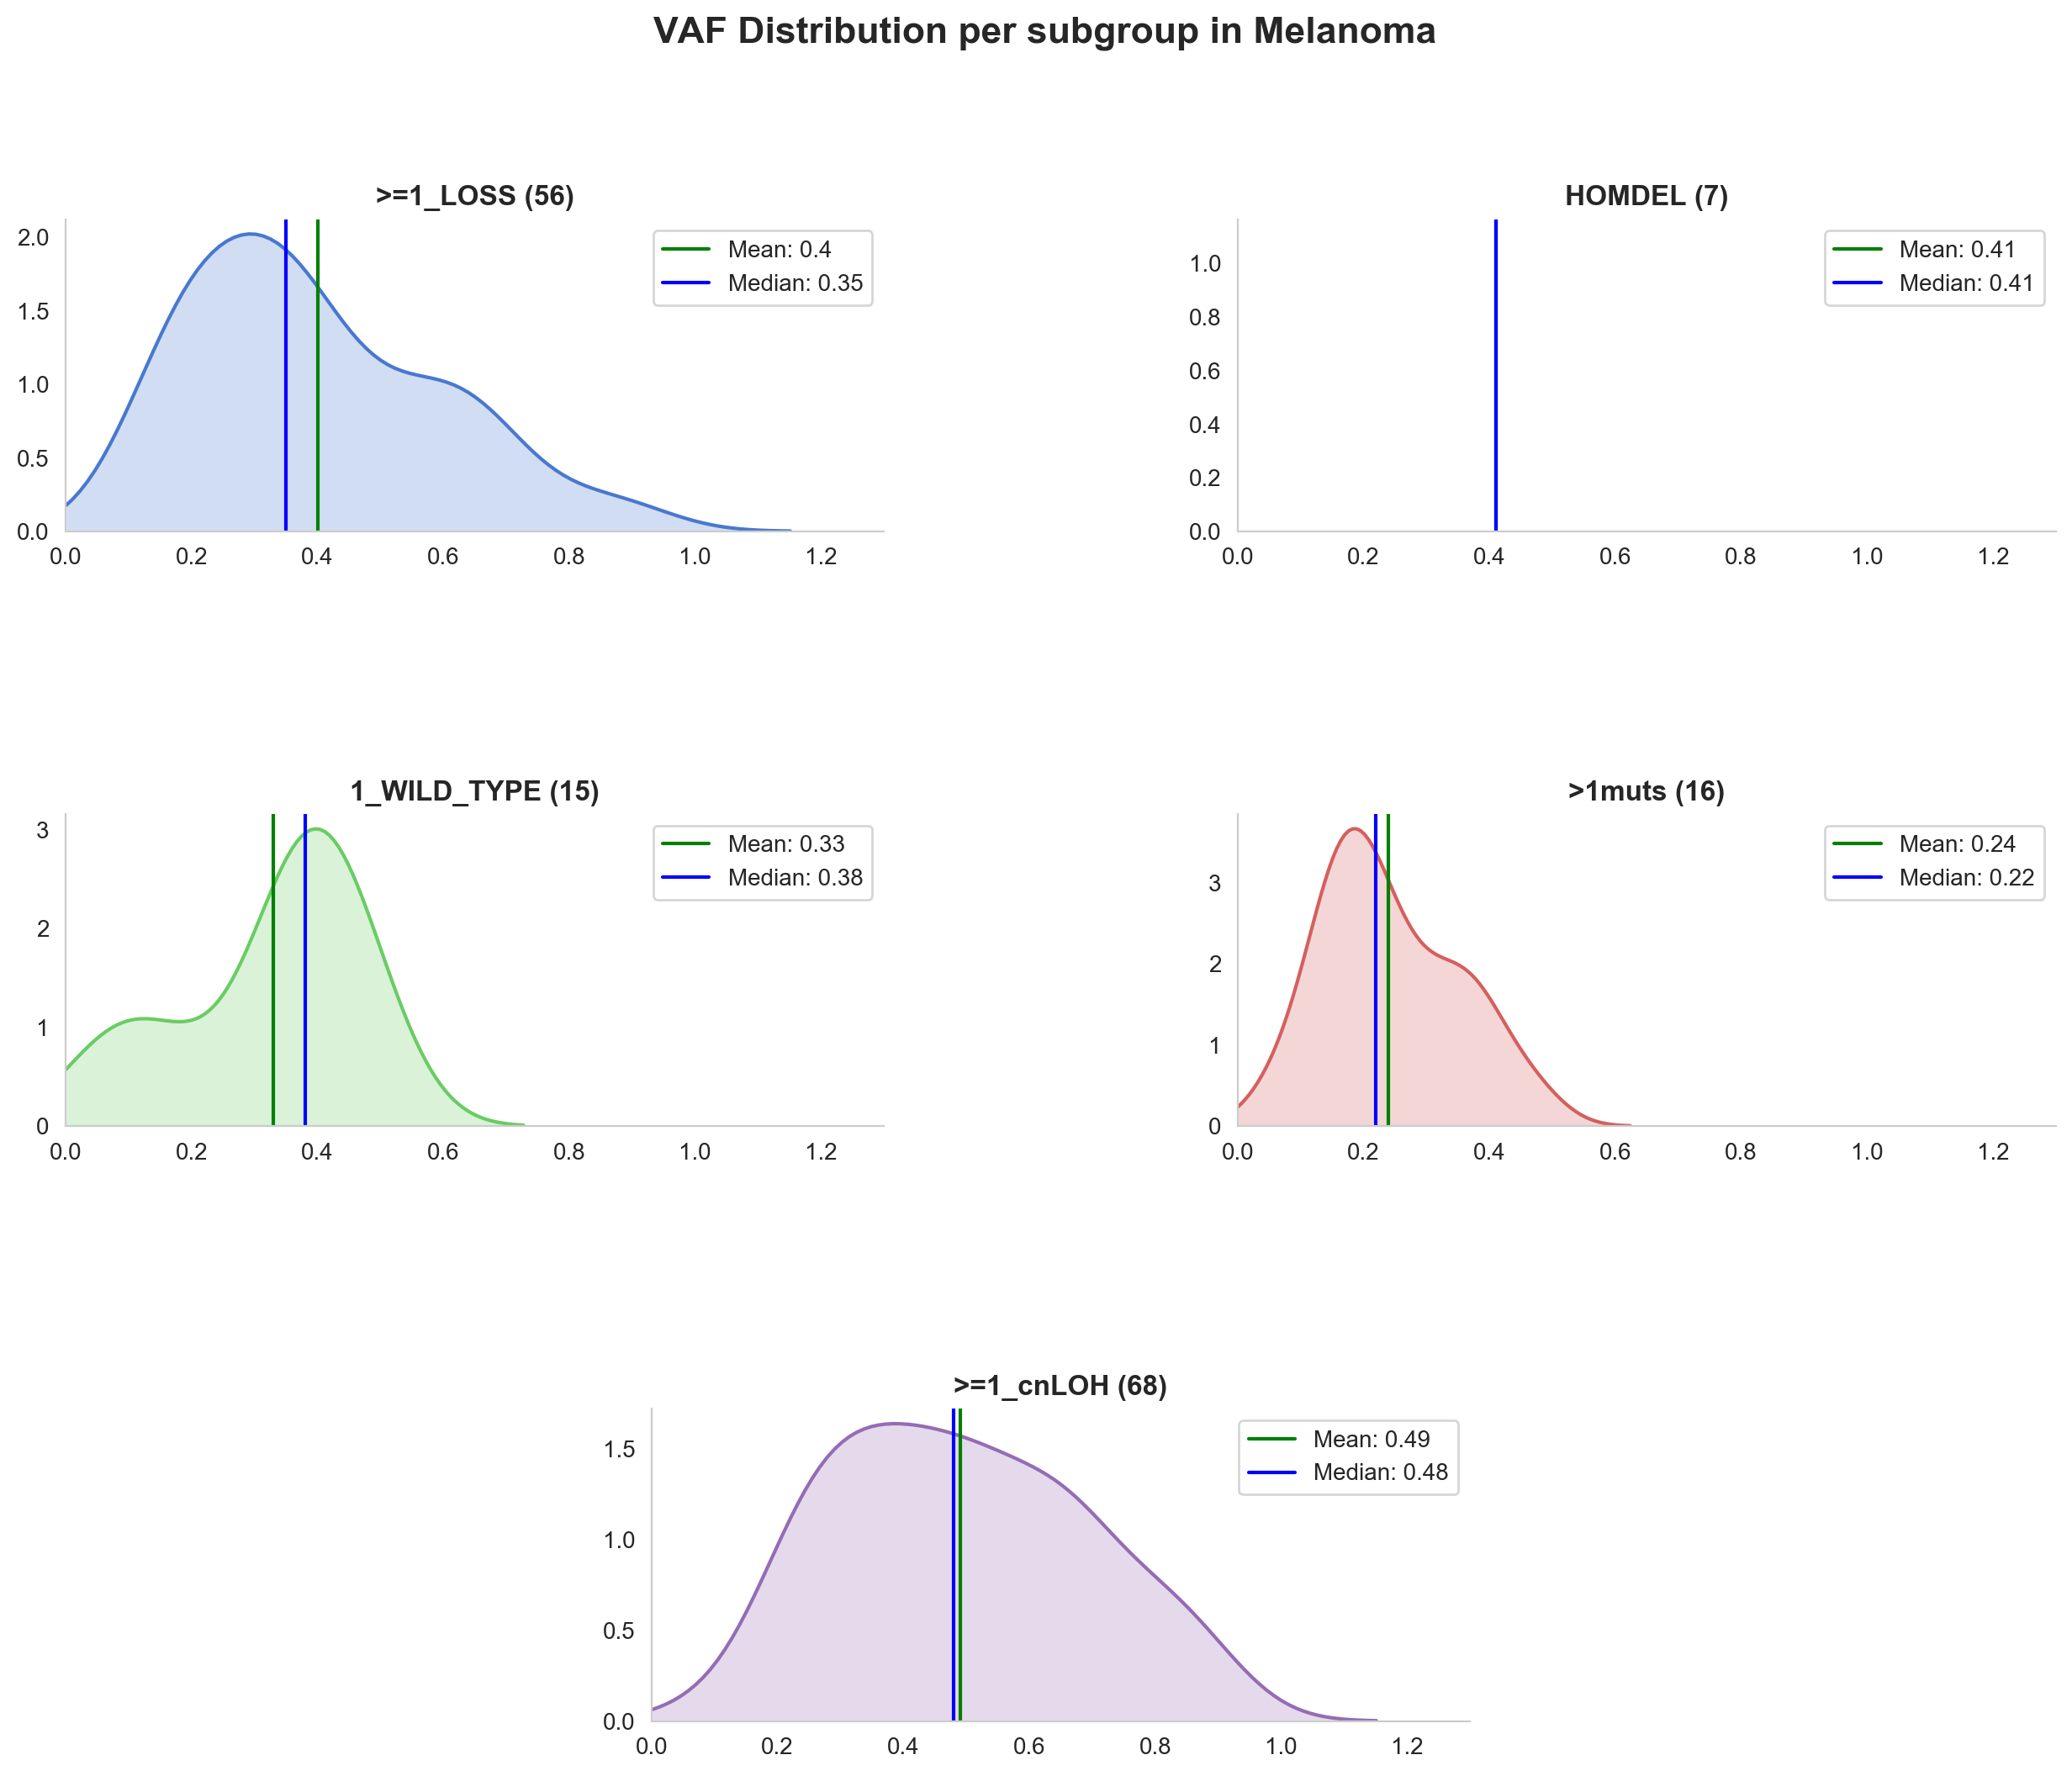

In [253]:
fig, ax = get_densities(master_cancer,
              metrics= 'tp53_vaf', 
              fig_title= 'VAF Distribution per subgroup in ' + cancer_type, 
              xlabel='', 
              ylabel='',  
              number=5, 
              tp53_metrics=True,
              met_prim = None, 
              clip = (0.0,3.0), 
              x_lim =[0,1.3])

### CCF

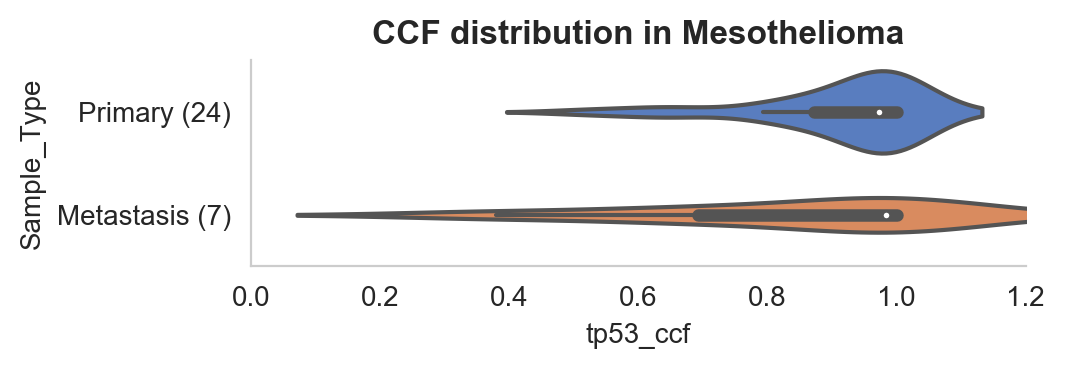

In [15]:
fig, ax = boxplot_sampletype(master_cancer, 
                             'tp53_ccf', 
                             figsize= (5,3), 
                             title='CCF distribution in ' + cancer_type, 
                             title_font=12,
                             tp53_metrics=True,
                             xlim=[0,1.2], 
                            continuous=True)

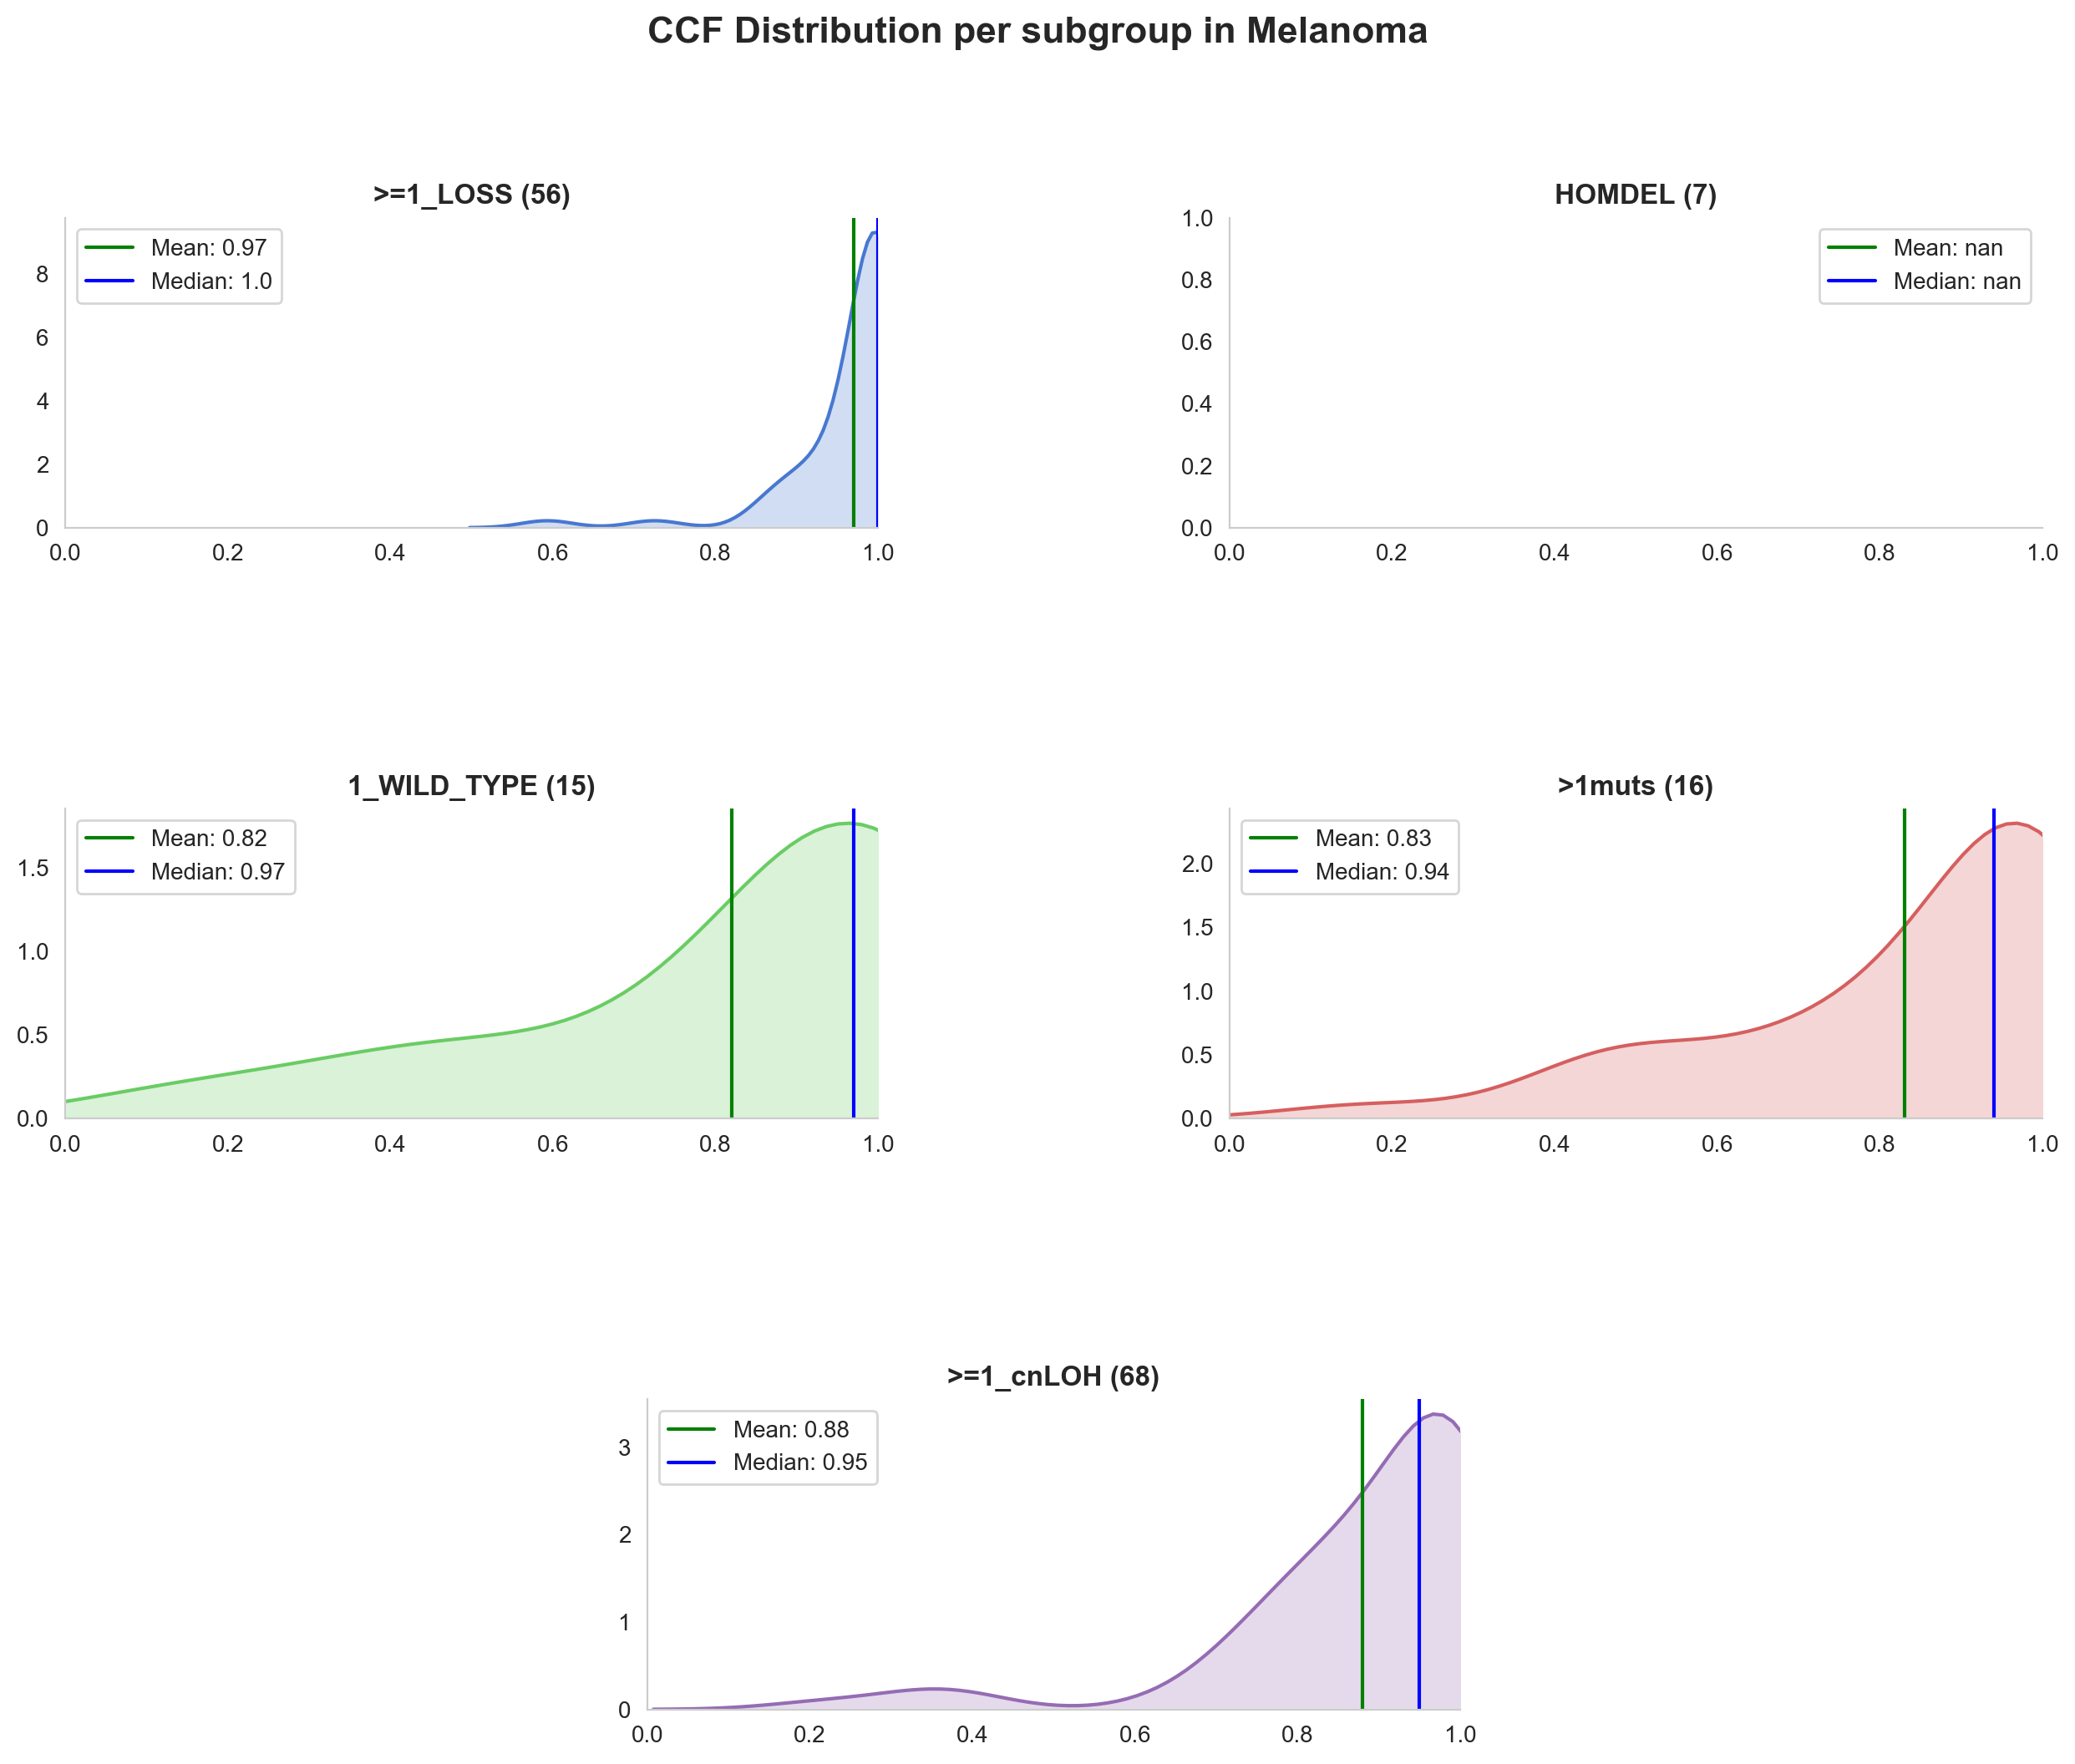

In [255]:
fig, ax = get_densities(master_cancer,
              metrics= 'tp53_ccf', 
              fig_title= 'CCF Distribution per subgroup in ' + cancer_type, 
              xlabel='', 
              ylabel='',  
              number=5, 
              tp53_metrics=True,
              met_prim = None, 
              clip = (0.0,3.0), 
              x_lim =[0,1])

## Scatter Plots (VAF, CCF)

In [112]:
def plot_scatters(data: pd.DataFrame, title:str, metrics: str, met_prim=False, figsize=(4,4)):
    fig=plt.figure(figsize=figsize)
    ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
    
    data = data[data['tp53_count']>=2]
    if met_prim:
        data = data[data['Sample_Type'] == met_prim]
    data_ccf = data[[metrics + '_1', metrics + '_2',metrics + '_3',metrics + '_4',metrics + '_5']]
    max_table_ccf = pd.DataFrame(np.sort(data_ccf.fillna(0).values)[:,-2:], columns=['2nd-largest','largest'])
    max_table_ccf = pd.concat([max_table_ccf, data.reset_index().tp53_group], axis=1)
    #display(max_table_ccf)
    
    sns.scatterplot(x='largest', y='2nd-largest', data=max_table_ccf, ax=ax, hue='tp53_group', palette=palette, legend=False)
    ax.plot([0,1], [0,1], linewidth=0.5, color='grey')
    ax.set_ylabel(metrics + '_2')
    ax.set_xlabel(metrics + '_1')
    ax.set_title(title, weight = 'bold')
    ax.text(.5,.9, str(data.shape[0]) +' samples',
        horizontalalignment='center',
        transform=ax.transAxes)
    
    return fig, ax

### VAF

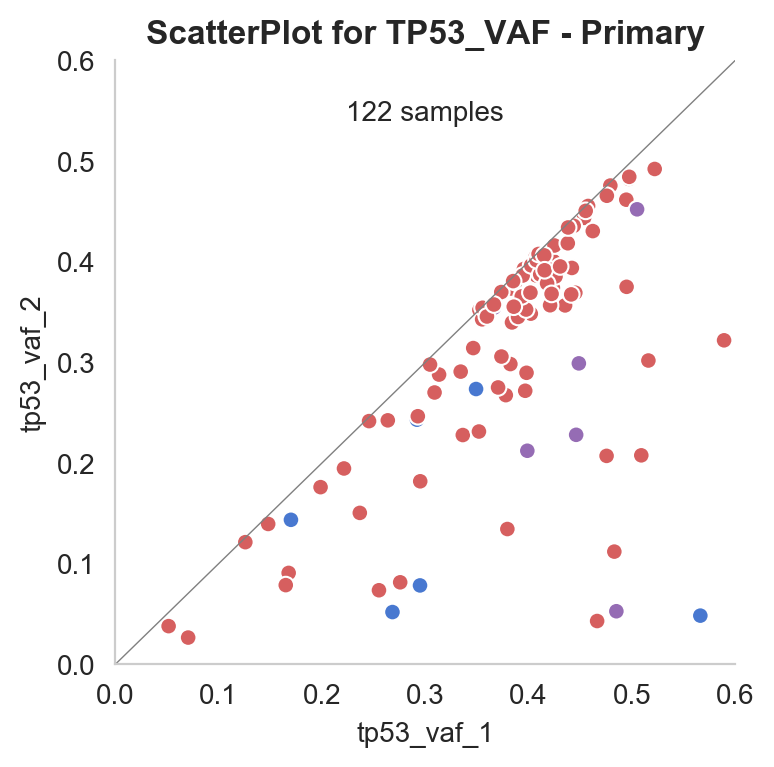

In [113]:
fig, ax = plot_scatters(master_cancer, 
              title='ScatterPlot for TP53_VAF - Primary', 
              metrics='tp53_vaf', 
              met_prim='Primary', 
              figsize=(4,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 0.6)
ax.set_ylim(0, 0.6)
plt.show(fig)

In [118]:
fig, ax = plot_scatters(master_cancer, 
              title='ScatterPlot for TP53_VAF - Metastasis', 
              metrics='tp53_vaf', 
              met_prim='Metastasis', 
              figsize=(4,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xlim(0, 0.6)
#ax.set_ylim(0, 0.6)
plt.show(fig)

TypeError: plot_scatters() got an unexpected keyword argument 'figsize'

### CCF

In [ ]:
fig, ax = plot_scatters(master_cancer, 
              title='ScatterPlot for TP53_CCF - Primary', 
              metrics='tp53_ccf', 
              met_prim='Primary', 
              figsize=(4,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xlim(0, 0.6)
#ax.set_ylim(0, 0.6)
plt.show(fig)

In [ ]:
fig, ax = plot_scatters(master_cancer, 
              title='ScatterPlot for TP53_CCF - Metastasis', 
              metrics='tp53_ccf', 
              met_prim='Metastasis', 
              figsize=(4,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xlim(0, 0.6)
#ax.set_ylim(0, 0.6)
plt.show(fig)

# Genomic

## Genome Instability

### # of affected chromosomes

In [319]:
master_cancer_gi = master_cancer[master_cancer['chr_affected']!='NaN']
fig, ax = boxplot_sampletype(master_cancer_gi, 'chr_affected', figsize= (3,3), title='Number of affected chromosomes for '+cancer_type, title_font=12, xlim=[0,25])

TypeError: boxplot_sampletype() got an unexpected keyword argument 'figsize'

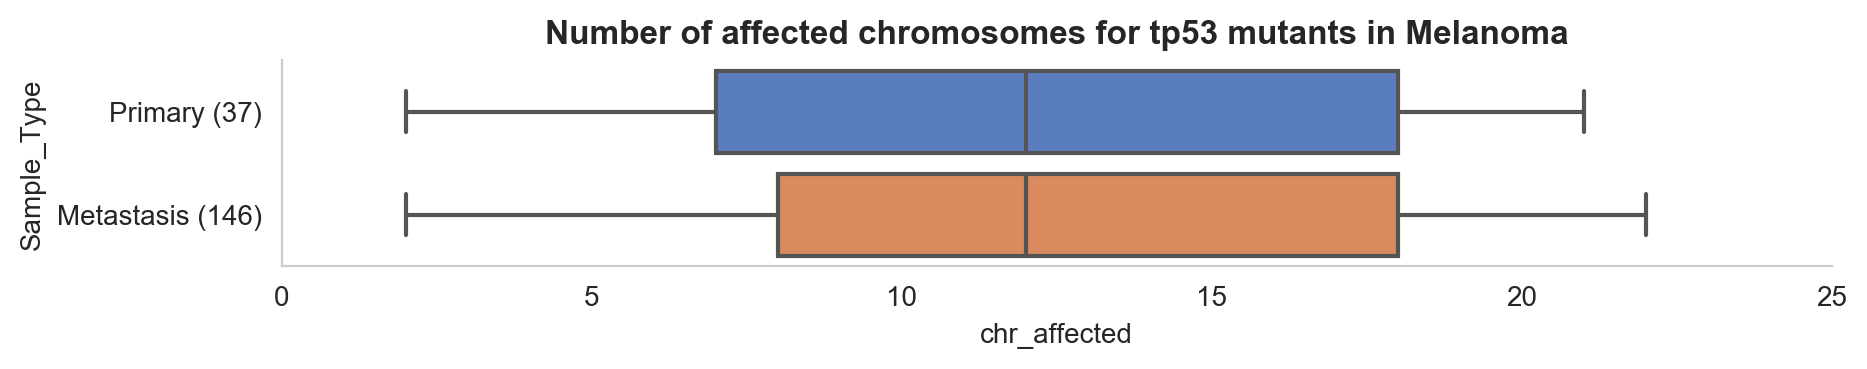

In [262]:
fig, ax = boxplot_sampletype(master_cancer_gi[master_cancer_gi['tp53_count']>=1], 'chr_affected', figsize= (10,3), title='Number of affected chromosomes for tp53 mutants in '+cancer_type, title_font=12, xlim=[0,25])

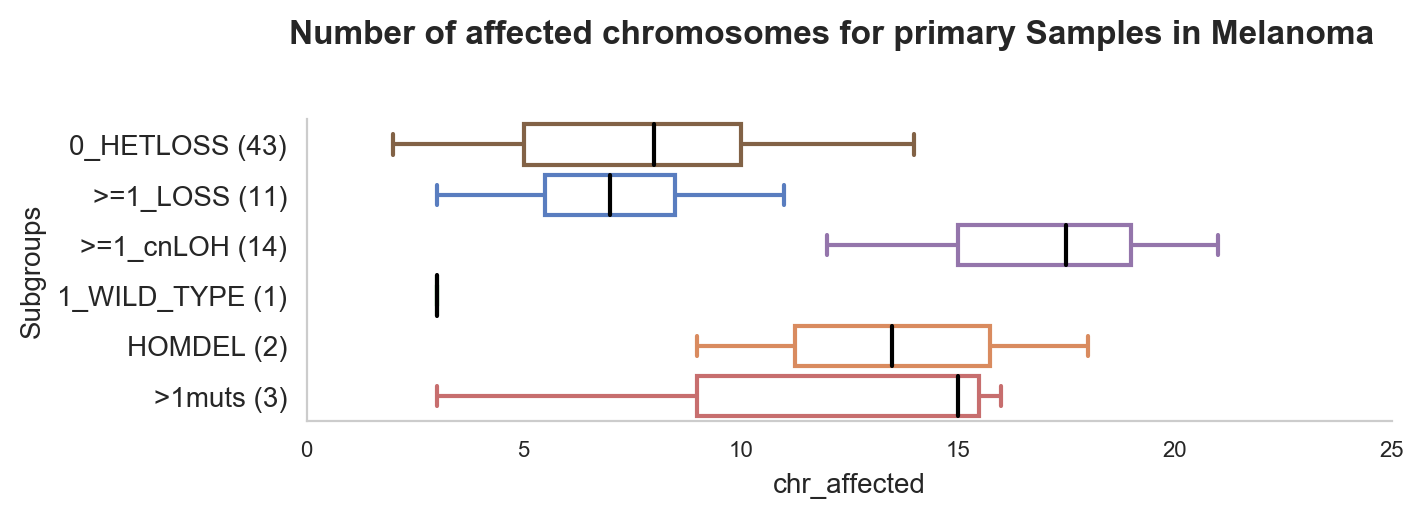

In [263]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='chr_affected', 
                         title= 'Number of affected chromosomes for primary Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=25, 
                         met_prim = 'Primary')

plt.show(fig)

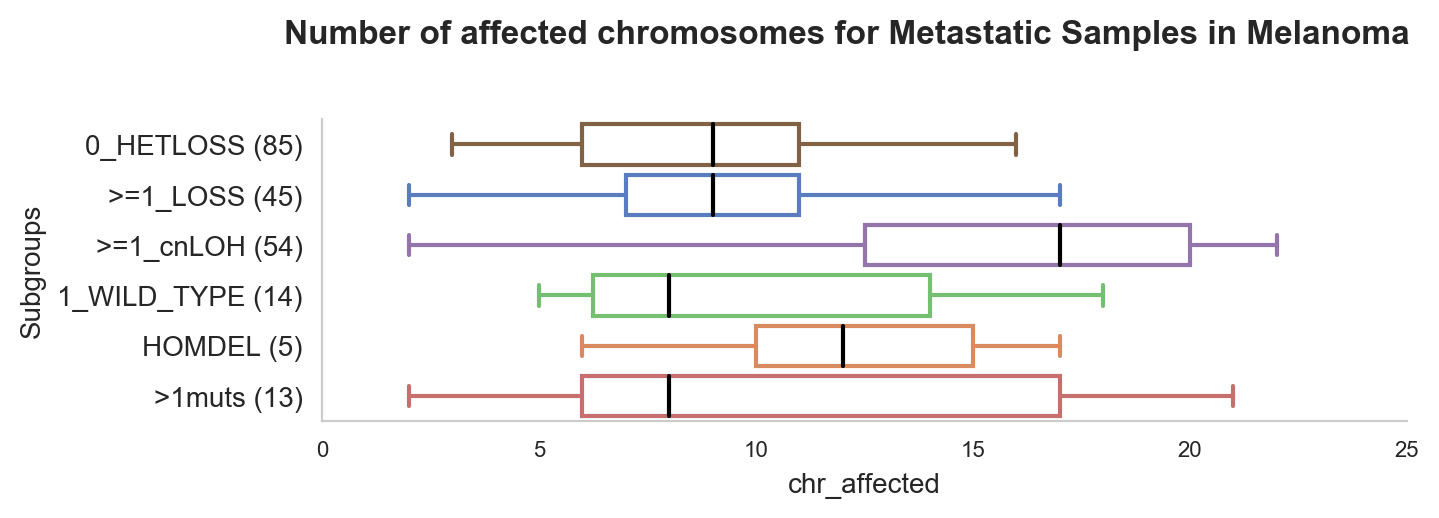

In [264]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='chr_affected', 
                         title= 'Number of affected chromosomes for Metastatic Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=25, 
                         met_prim = 'Metastasis')

plt.show(fig)

### # of chromosomes affected by a LOSS

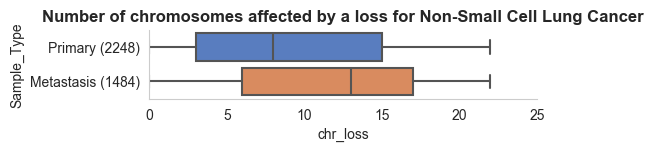

In [9]:
master_cancer_gi = master_cancer[master_cancer['chr_loss']!='NaN']
fig, ax = boxplot_sampletype(master_cancer_gi, 'chr_loss', figsize= (5,2), title='Number of chromosomes affected by a loss for '+cancer_type, title_font=12, xlim=[0,25])

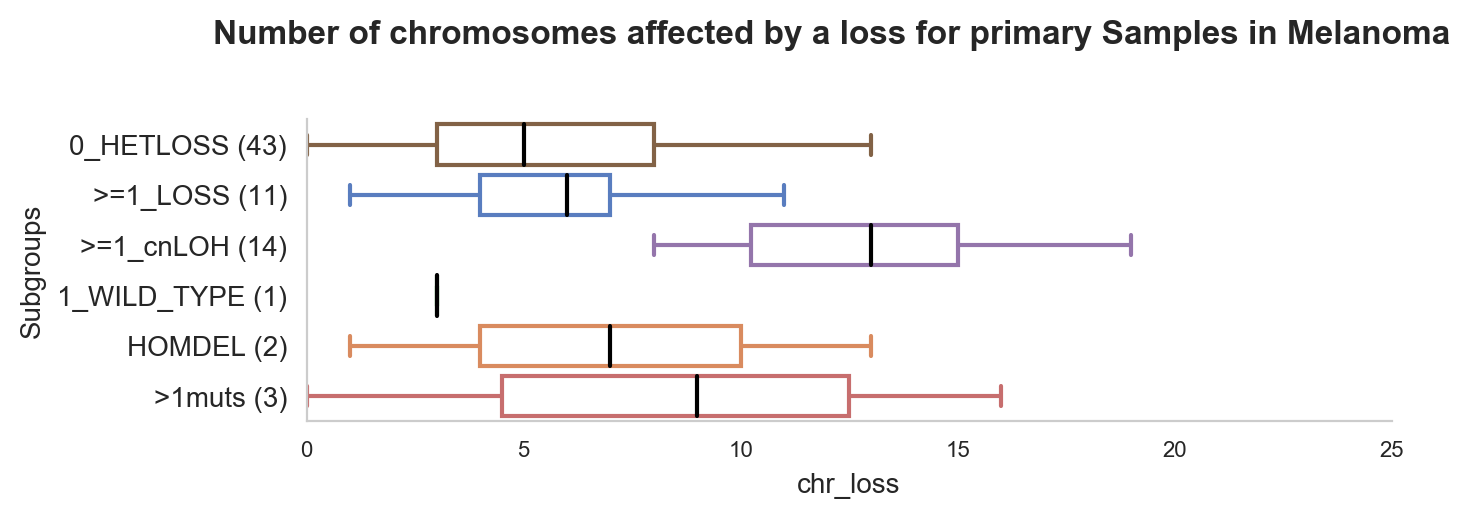

In [266]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='chr_loss', 
                         title= 'Number of chromosomes affected by a loss for primary Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=25, 
                         met_prim = 'Primary')

plt.show(fig)

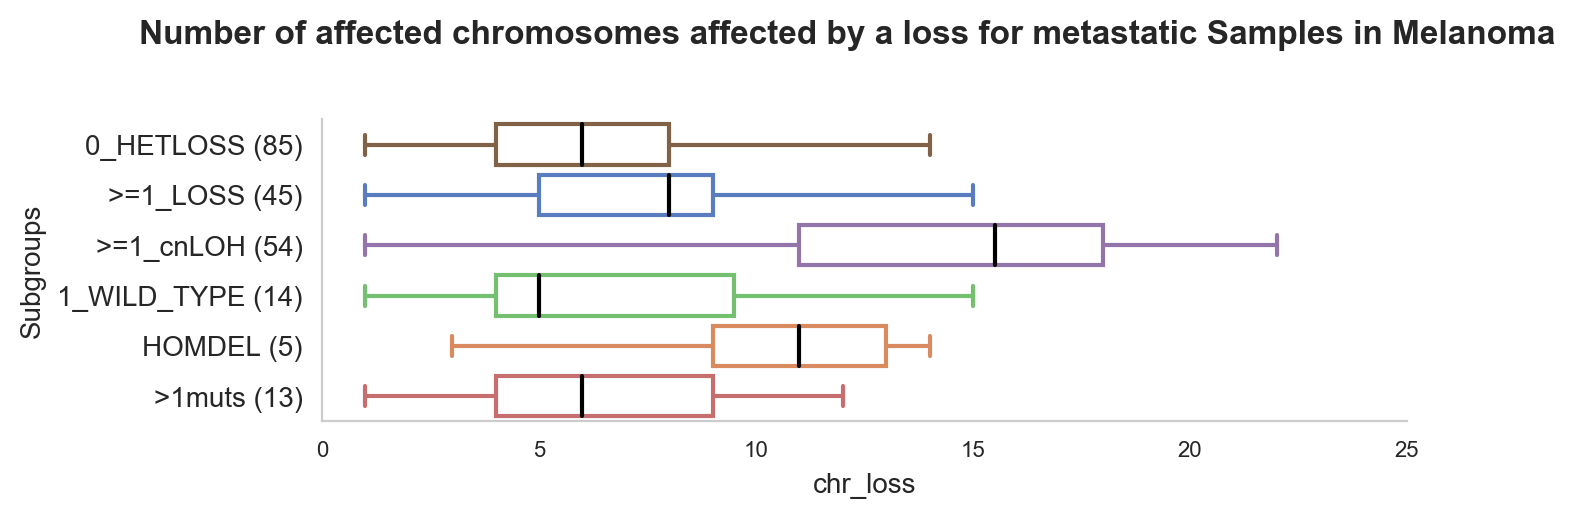

In [267]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='chr_loss', 
                         title= 'Number of affected chromosomes affected by a loss for metastatic Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=25, 
                         met_prim = 'Metastasis')

plt.show(fig)

### # of chromosomes affected by a CNLOH

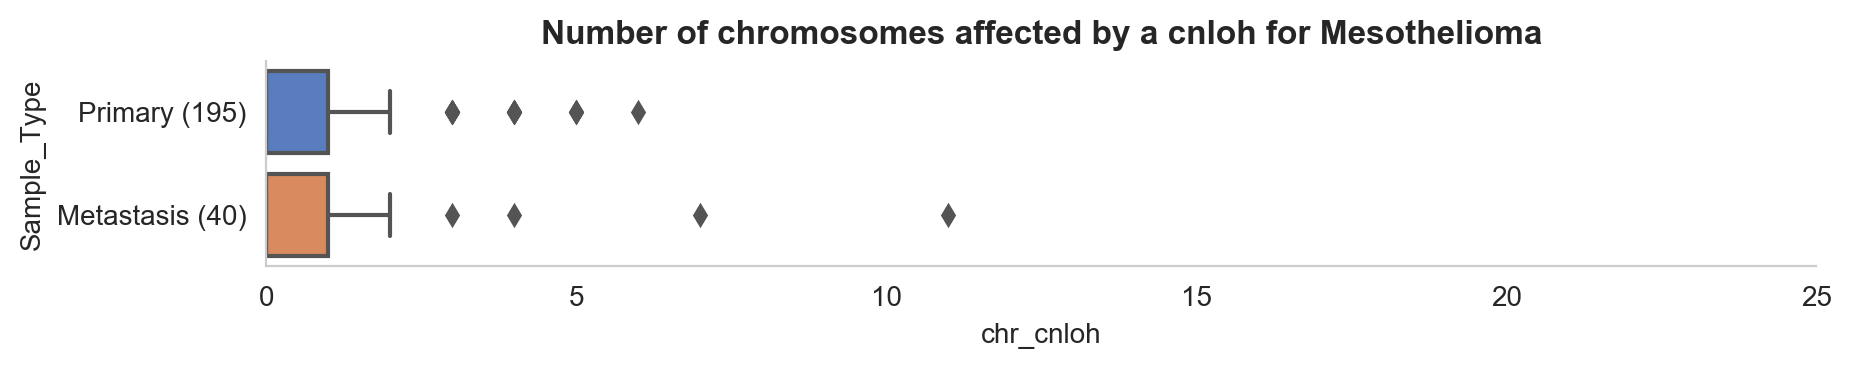

In [273]:
master_cancer_gi = master_cancer[master_cancer['chr_cnloh']!='NaN']
fig, ax = boxplot_sampletype(master_cancer_gi, 'chr_cnloh', figsize= (10,3), title='Number of chromosomes affected by a cnloh for '+cancer_type, title_font=12, xlim=[0,25])

(<Figure size 700x200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x130eb9e10>)

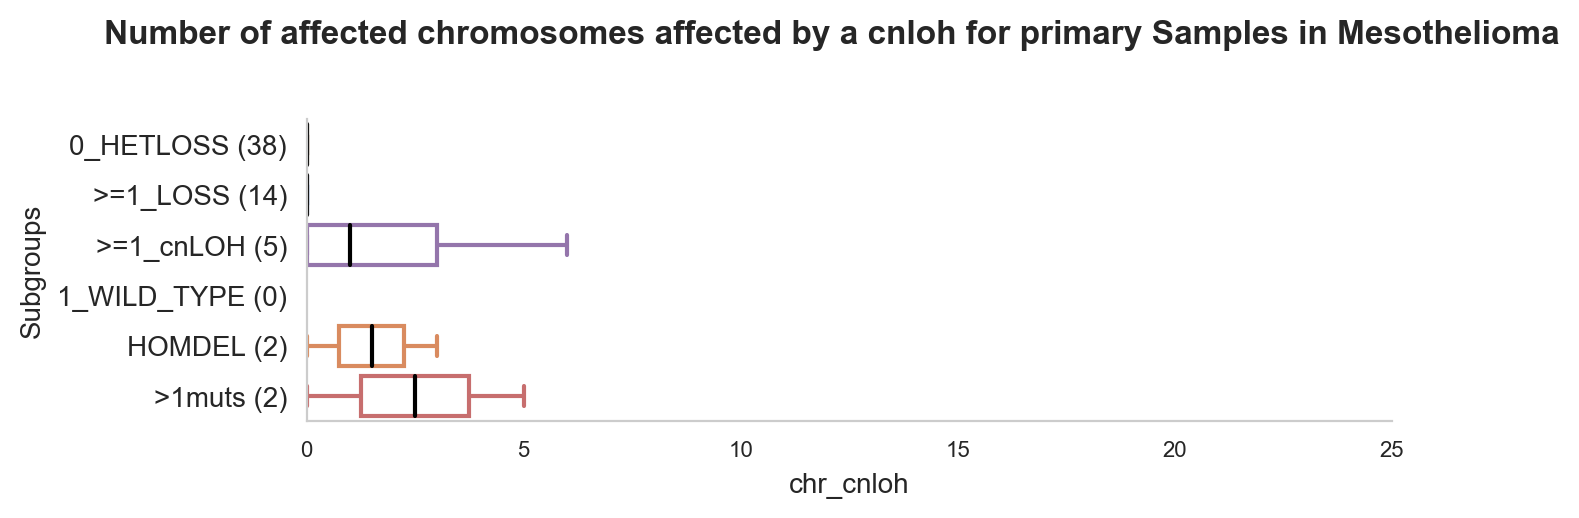

In [289]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='chr_cnloh', 
                         title= 'Number of affected chromosomes affected by a cnloh for primary Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=25, 
                         met_prim = 'Primary')

plt.show(fig)

(<Figure size 700x200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13b5878d0>)

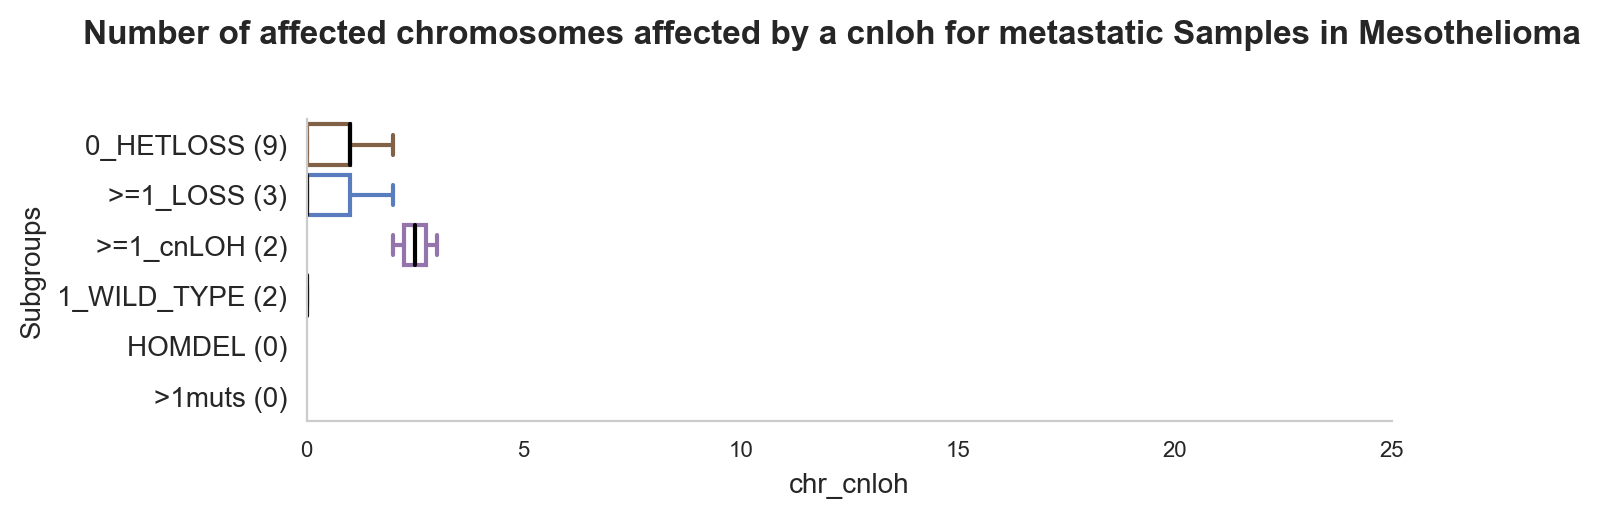

In [290]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='chr_cnloh', 
                         title= 'Number of affected chromosomes affected by a cnloh for metastatic Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=25, 
                         met_prim = 'Metastasis')

plt.show(fig)

## Mutational Landscape

## Mutation Count

In [248]:
def boxplot_mutation_count(df: pd.DataFrame, metrics: str, ax, title: str = '',tp53_metrics=False, title_font: int=20, xlim=[0,1], continuous= False):
    groupby = get_groupby(df, 'Sample_Type', 'count')

    statistic, p_value = ranksums(df[df['Sample_Type'] == 'Primary'][metrics].dropna().values,df[df['Sample_Type'] == 'Metastasis'][metrics].dropna().values)
    if p_value<0.001: s='P < 0.001'
    else: s='P = %.3f'%p_value
    ax.annotate(s=s, xy=(0.8,0.5), xycoords='axes fraction', fontsize='x-large')
    
    #g = sns.boxplot(x=metrics, y='Sample_Type',data=df,ax=ax, dodge=False,order=['Primary', 'Metastasis'], palette='muted', showfliers=False).set_title(title, weight='bold', fontsize=title_font)
    h = sns.boxplot(x='driver_count', y='Sample_Type', data=df,dodge=False,order=['Primary', 'Metastasis'], palette='seismic', showfliers=False)
    if tp53_metrics:
        try:
            ax.set_yticklabels(['P (' + str(numbers[0]) + ')',
                                'M (' + str(numbers[1]) + ')'], 
                                fontsize=18)
        except: pass
    else: 
        try:
            ax.set_yticklabels(['P (' + str(int(groupby.loc['Primary'])) + ')',
                                'M (' + str(int(groupby.loc['Metastasis'])) + ')'], 
                                fontsize=18)
        except: pass

    ax.set_xlim(xlim)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    
    '''for i, artist in enumerate(ax.artists[2:]):
        #col = artist.get_facecolor()
        artist.set_edgecolor('green')
        artist.set_facecolor('None')
        for j in range(i * 5, i * 5 + 5):
            line = artist.lines[j]
            if j % 5 == 1: line.set_color('None')
            if j % 5 == 2: line.set_color('None')
            if j % 5 == 3: line.set_color('None')
            if j % 5 == 4: line.set_color('green')
            #if j % 5 == 5: line.set_color('black')
            line.set_mfc('None')
            line.set_mec('None')'''
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(h[element], color='red')

    for patch in h['boxes']:
        patch.set(facecolor='green')     

    #print(ax.containers)


TypeError: 'AxesSubplot' object is not subscriptable

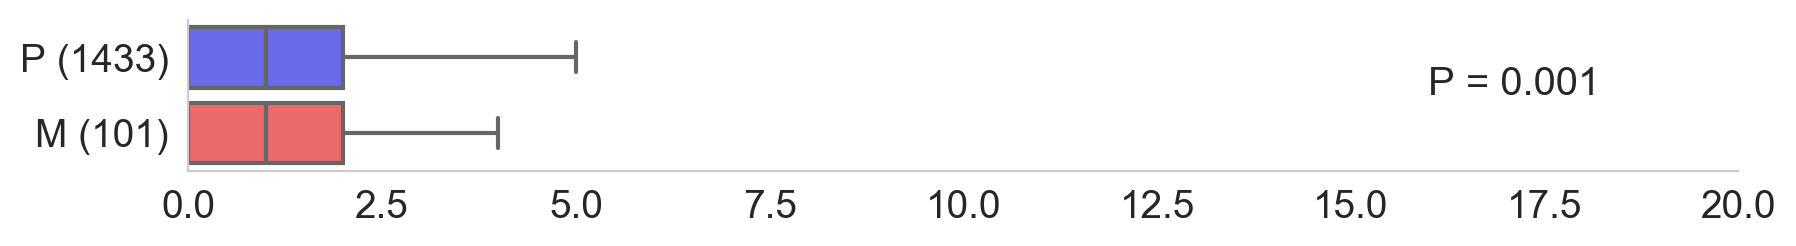

In [249]:
fig = plt.figure(figsize=(10,1))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

boxplot_mutation_count(master_cancer, 
                       metrics='mutation_count', 
                       ax=ax, 
                       title= '',
                       tp53_metrics=False,
                       title_font=20,
                       xlim=[0,20],
                       continuous= False)

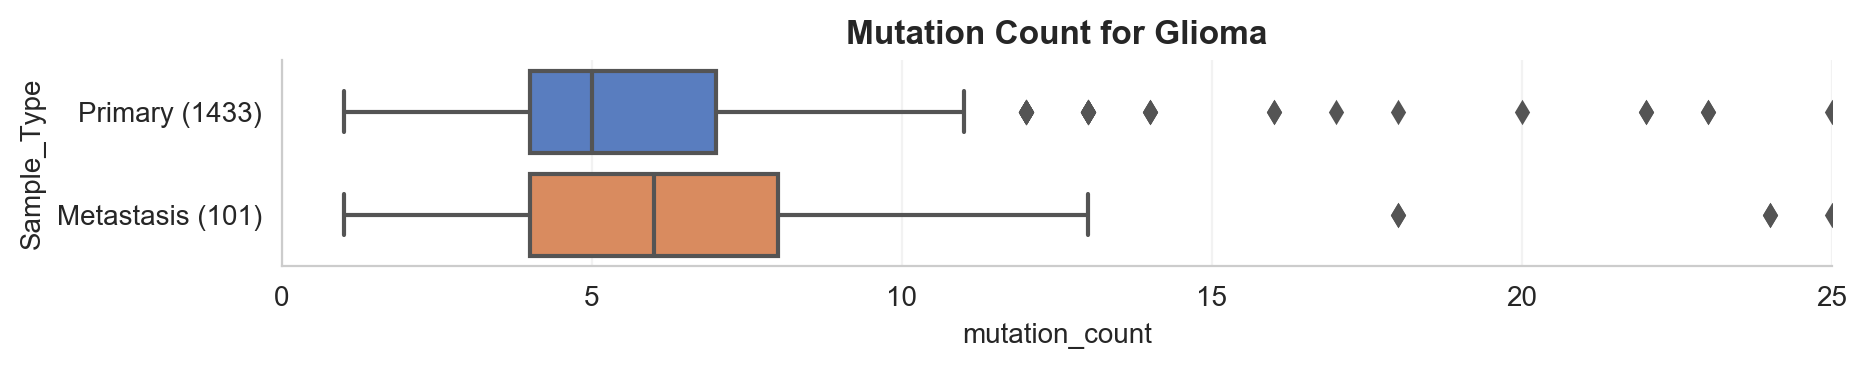

In [52]:
fig, ax = boxplot_sampletype(master_cancer, 'mutation_count', figsize= (10,3), title='Mutation Count for '+cancer_type, title_font=12, xlim=[0,25])

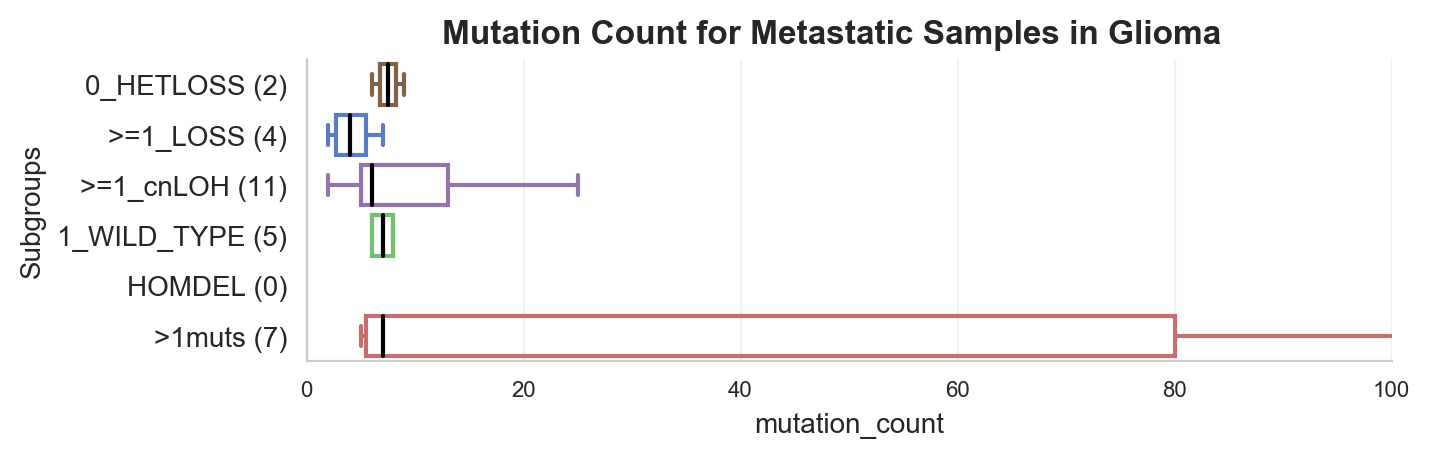

In [53]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='mutation_count', 
                         title= 'Mutation Count for Metastatic Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=100, 
                         met_prim = 'Metastasis')

plt.show(fig)

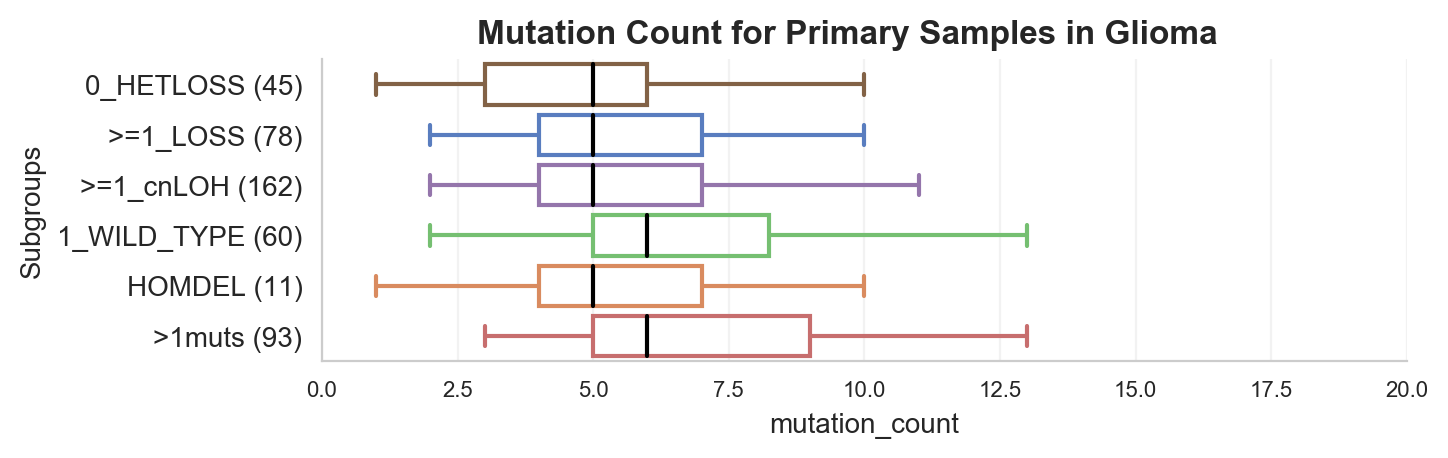

In [54]:
fig, ax = plot_mut_count_subgroups(master_cancer, 
                         cancer_type, 
                         metrics='mutation_count', 
                         title= 'Mutation Count for Primary Samples in ' + cancer_type, 
                         figsize = (7, 2),  
                         xlim=20, 
                         met_prim = 'Primary')

plt.show(fig)

## Tumor Mutational Burden

## MSI Score

## TP53 Metrics

### Hotspot distribution

            count
tp53_spots       
248            27
273            19
175            17
342            14
280            13
220            11
285            11
176            11
196            10
245            10
306            10
241             8
213             8
337             7
282             7
194             6
271             6
272             6
274             6
163             6
180             5
262             5
179             5
287             5
286             5
135             5
255             5
249             5
172             5
192             5
195             5
270             4
339             4
127             4
193             4
278             4
242             4
141             4
133             4
146             4
132             4
237             4
204             4
215             3
236             3
259             3
73              3
113             3
209             3
244             3
110             3
205             3
246             3
134       

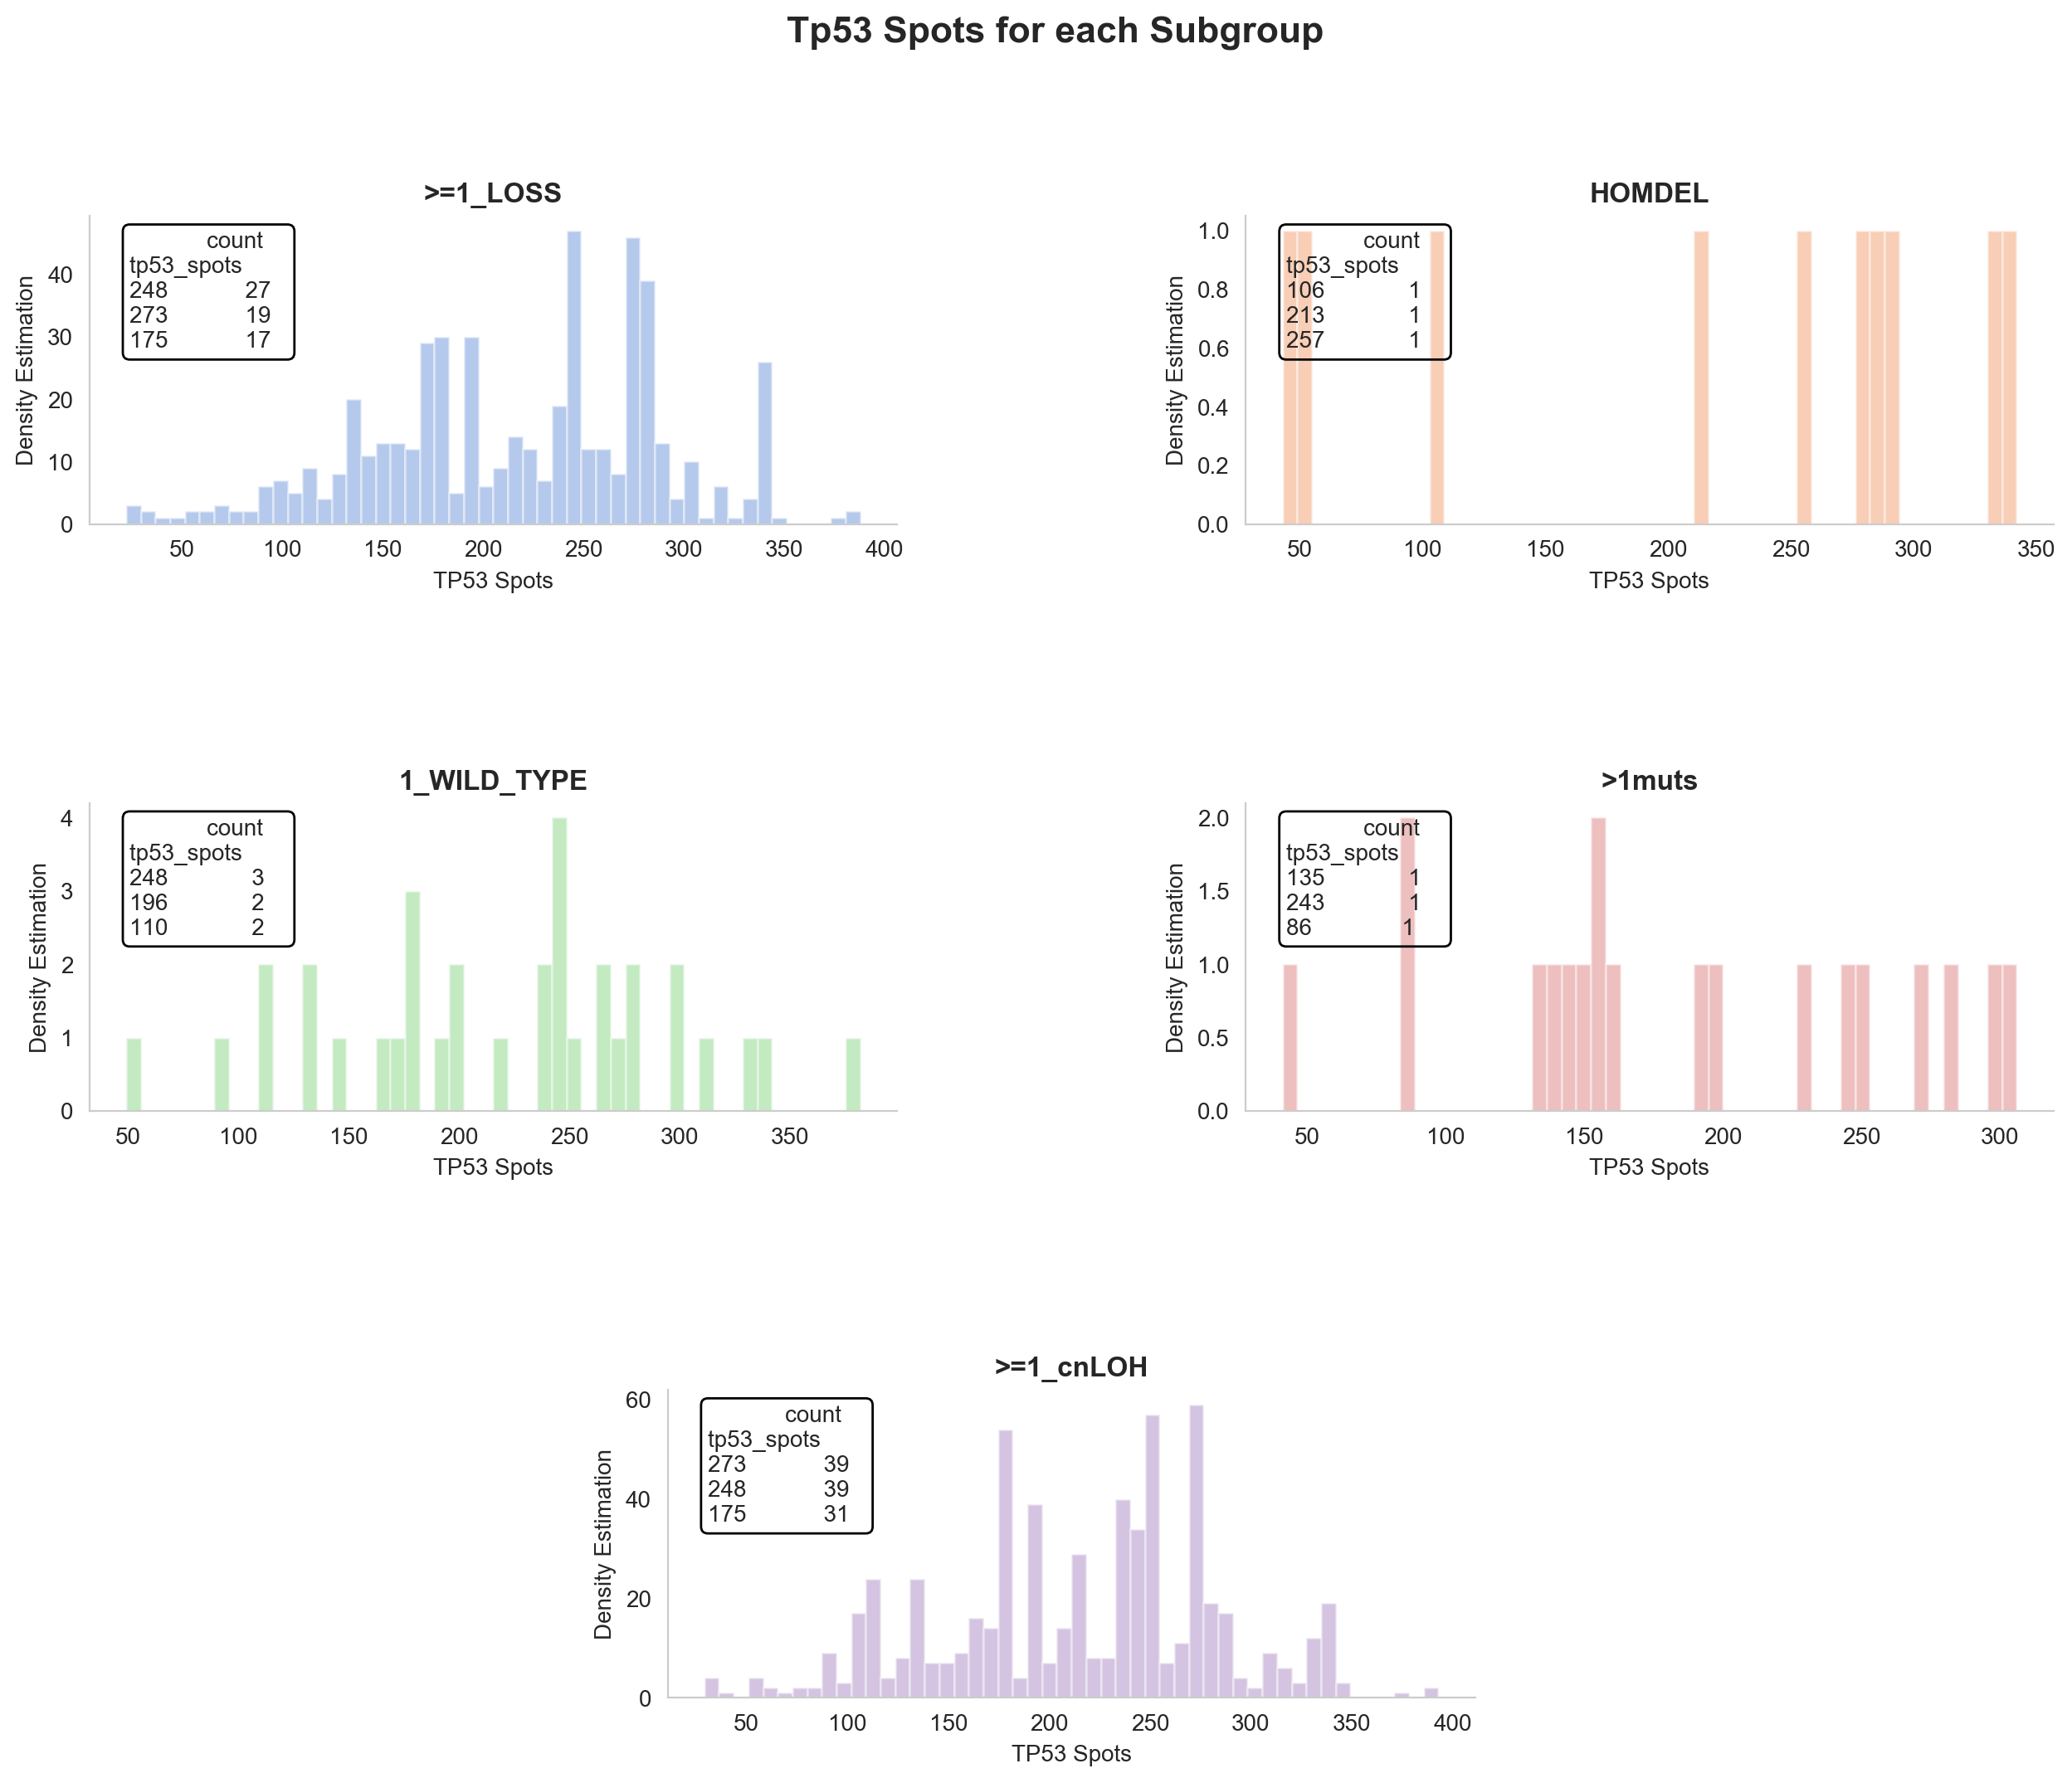

In [79]:
fig = def_fig_set(number = 5)
fig.tight_layout(pad=10, w_pad=0.5, h_pad=10)
fig.suptitle('Tp53 Spots for each Subgroup', fontsize=16, weight='bold')

groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '0_HETLOSS']
for ax, subgroup,i in zip(fig.axes, groups, range(len(groups))):
    data = master_cancer[master_cancer['tp53_group'] == subgroup]
    
    data_spots = list(data['tp53_spot_1']) + list(data['tp53_spot_2']) + list(data['tp53_spot_3']) + list(data['tp53_spot_4']) + list(data['tp53_spot_5'])
    data_spot_df = pd.DataFrame(data_spots, columns=['tp53_spots']).dropna()
    data_spot_df = data_spot_df[data_spot_df['tp53_spots'] !='nan']
    count = pd.DataFrame(data_spot_df.groupby(['tp53_spots']).size(), columns=['count']).sort_values(by=['count'], ascending=False)
    print(count)
    #count.index = count.index.drop('nan')
    count = pd.DataFrame(count, index = count.index).head(3)
    
    sns.distplot(data_spot_df, bins=50, kde=False, color=my_colors[i], ax=ax)
    ax.set_xlabel('TP53 Spots')
    ax.set_ylabel('Density Estimation')
    ax.set_title(subgroup, weight = 'bold')
    ax.text(.05, .95, str(count), transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

### Mutation Type

count_tp53_vc_group
tp53_vc_group                     
missense                       817
truncated                      606
in_frame                        50

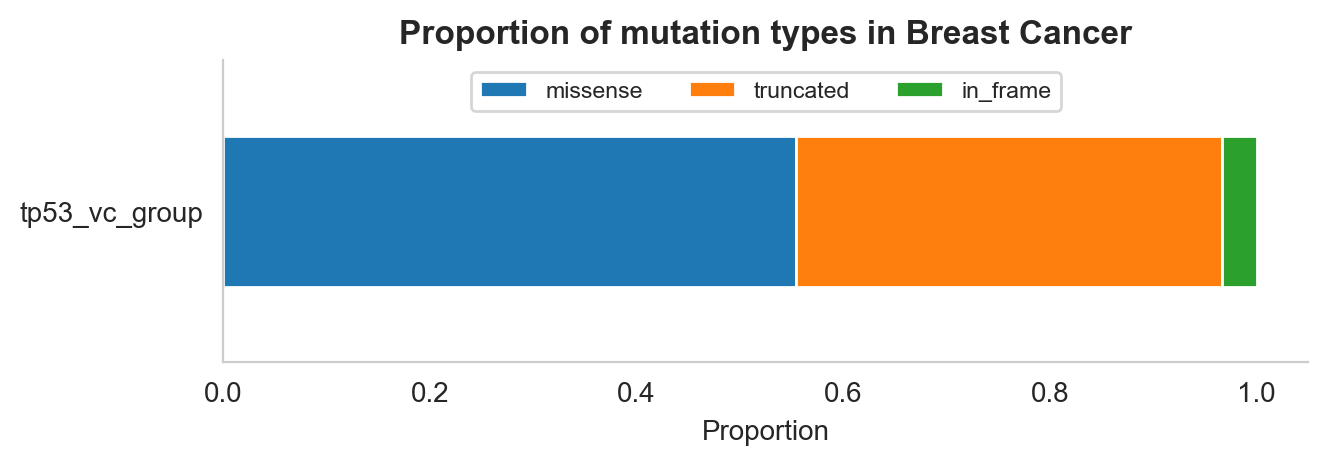

In [80]:
fig, ax = proportion_plot(master_cancer, 
                        metrics='tp53_vc_group',
                        title= 'Proportion of mutation types in ' + cancer_type,
                        figsize=(7,2),
                        display_table=True,
                        tp53_metrics=True,
                        ncol_legend =3)

175  248  273  hotspot  in_frame  missense  truncated  175_r  \
>=1_LOSS       1    3    1        2         3        18         17  0.022   
>=1_cnLOH      3    3    1        4         0        19         20  0.060   
1_WILD_TYPE    0    0    0        1         0         1          1  0.000   
HOMDEL         0    0    0        0         0         1          0  0.000   
>1muts         0    1    0        0         0        10         10  0.000   

             248_r  273_r  hotspot_r  in_frame_r  missense_r  truncated_r  
>=1_LOSS     0.067  0.022      0.044       0.067       0.400        0.378  
>=1_cnLOH    0.060  0.020      0.080       0.000       0.380        0.400  
1_WILD_TYPE  0.000  0.000      0.333       0.000       0.333        0.333  
HOMDEL       0.000  0.000      0.000       0.000       1.000        0.000  
>1muts       0.048  0.000      0.000       0.000       0.476        0.476

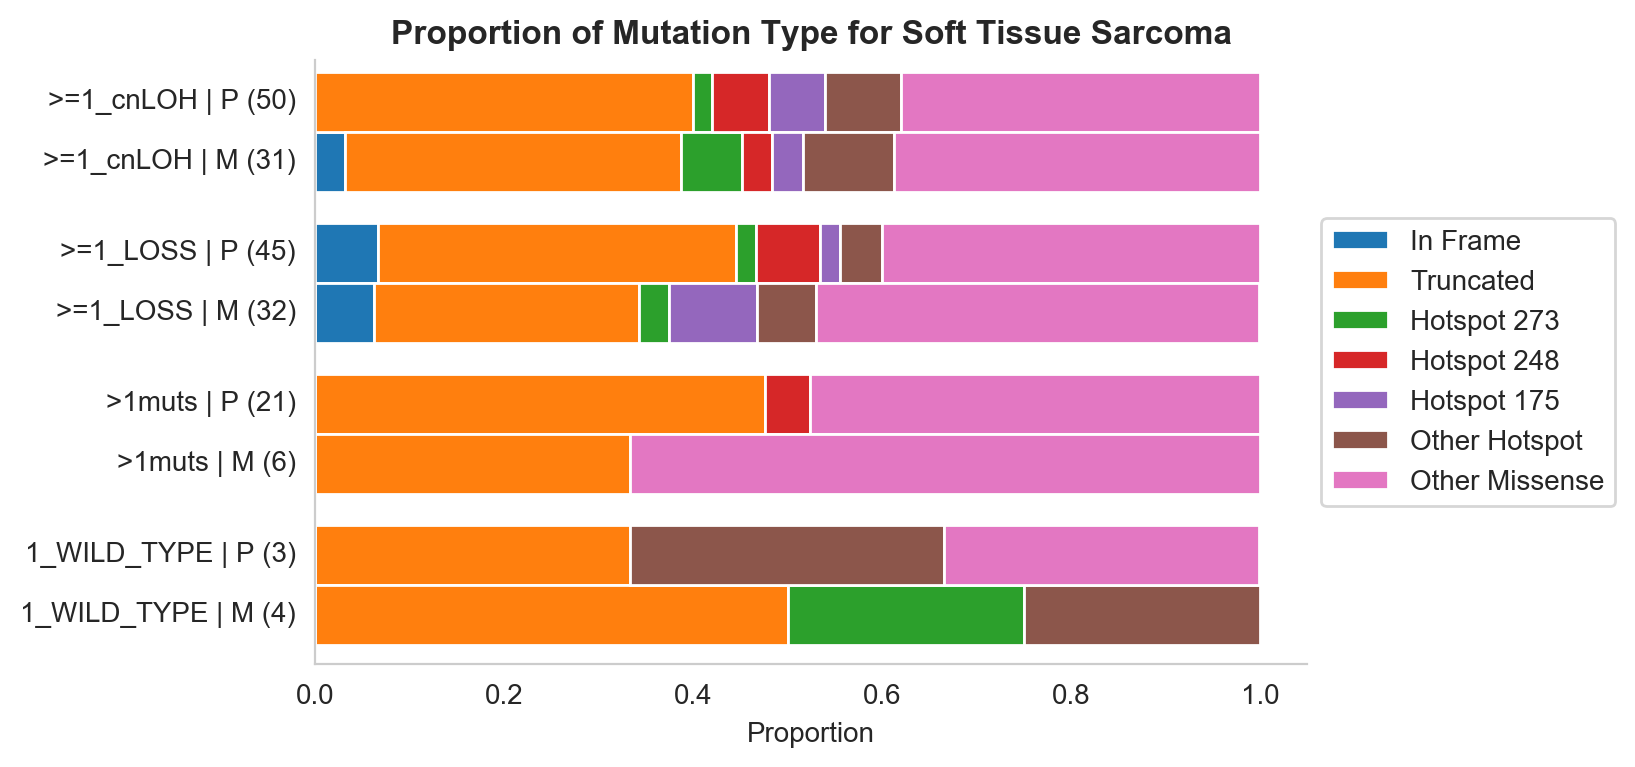

In [543]:
mut_subgroups = ['>=1_LOSS', '>=1_cnLOH', '1_WILD_TYPE', 'HOMDEL', '>1muts']
for subgroup in mut_subgroups:
    data_prim = master_cancer[master_cancer['tp53_group'] == subgroup][master_cancer['Sample_Type'] == 'Primary']
    data_met = master_cancer[master_cancer['tp53_group'] == subgroup][master_cancer['Sample_Type'] == 'Metastasis']
    data_1p = get_groupby(data_prim,'tp53_vc_group_1', 'count'); data_2p = get_groupby(data_prim,'tp53_vc_group_2', 'count'); data_3p = get_groupby(data_prim,'tp53_vc_group_3', 'count') ; data_4p = get_groupby(data_prim,'tp53_vc_group_4', 'count') ; data_5p = get_groupby(data_prim,'tp53_vc_group_5', 'count') 
    data_1m = get_groupby(data_met,'tp53_vc_group_1', 'count'); data_2m = get_groupby(data_met,'tp53_vc_group_2', 'count'); data_3m = get_groupby(data_met,'tp53_vc_group_3', 'count') ; data_4m = get_groupby(data_met,'tp53_vc_group_4', 'count') ; data_5m = get_groupby(data_met,'tp53_vc_group_5', 'count') 
    series_p = [data_1p,data_2p,data_3p,data_4p,data_5p]
    series_m = [data_1m,data_2m,data_3m,data_4m,data_5m]
    for i in range(len(series_p)):
        for line in ['175', '248', '273', 'hotspot', 'in_frame', 'missense', 'truncated']:
            if line not in list(series_p[i].index):
                series_p[i] = series_p[i].append(pd.Series({'count': 0}, name=line))
    for i in range(len(series_m)):
        for line in ['175', '248', '273', 'hotspot', 'in_frame', 'missense', 'truncated']:
            if line not in list(series_m[i].index):
                series_m[i] = series_m[i].append(pd.Series({'count': 0}, name=line))
    count_p = series_p[0].add(series_p[1]).add(series_p[2]).add(series_p[3]).add(series_p[4])
    count_m = series_m[0].add(series_m[1]).add(series_m[2]).add(series_m[3]).add(series_m[4])
    count_m.columns=[subgroup] ; count_p.columns=[subgroup]
    if subgroup == '>=1_LOSS': countm = count_m ; countp = count_p
        
    else: countm = pd.concat([countm, count_m], axis=1) ; countp = pd.concat([countp, count_p], axis=1)
        
countm = countm.T.fillna(0) ; countp = countp.T.fillna(0)

columns_m = list(countm.columns)
columns_p = list(countp.columns)

for column in columns_m:
    countm[column + '_r'] = countm.apply(lambda x: round(x[column]/x[columns_m].sum(),3), axis=1)
for column in columns_p:   
    countp[column + '_r'] = countp.apply(lambda x: round(x[column]/x[columns_p].sum(),3), axis=1)
display(countp)
countp['sum_p'] = countp[columns_p].sum(axis=1) ; countm['sum_m'] = countm[columns_m].sum(axis=1)
countm = countm.set_index(pd.Series(['>=1_LOSS | M', '>=1_cnLOH | M', '1_WILD_TYPE | M', 'HOMDEL | M', '>1muts | M']))
countp = countp.set_index(pd.Series(['>=1_LOSS | P', '>=1_cnLOH | P', '1_WILD_TYPE | P', 'HOMDEL | P', '>1muts | P']))

count = pd.concat([countp, countm], axis=0).fillna(0)
count = count.reindex(['1_WILD_TYPE | P','1_WILD_TYPE | M', '>1muts | P', '>1muts | M'
                       ,'>=1_LOSS | P','>=1_LOSS | M', '>=1_cnLOH | P', '>=1_cnLOH | M',
                        'HOMDEL | P','HOMDEL | M'])

count = count.drop(['HOMDEL | P', 'HOMDEL | M'])

for column in ['in_frame_r','truncated_r', '273_r', '248_r', '175_r','hotspot_r', 'missense_r']:
    if column not in list(count.columns):
        count[column] = [0]*8
#df = count[['in_frame_r','truncated_r', '273_r', '248_r', '175_r','hotspot_r', 'missense_r']]

fig, ax = get_mstacked_plot(count[['in_frame_r','truncated_r', '273_r', '248_r', '175_r','hotspot_r', 'missense_r']], 
                  'Proportion of Mutation Type for ' + cancer_type,
                  ['In Frame', 'Truncated', 'Hotspot 273','Hotspot 248','Hotspot 175', 'Other Hotspot', 'Other Missense'],
                  'Proportion',
                  'Subgroups',
                  figsize = (8,4),
                  horiz=True)

        


ax.set_ylabel('')

for container in ax.containers:
    for i, child in enumerate(container.get_children()):
        child.set_height(0.8)
        if i%2 == 1:
            child.set_y(child.get_y() - 0.2)
     
for container in ax.containers:
    for i, child in enumerate(container.get_children()):
        if i%2 == 1: child.set_y(child.get_y() - child.get_height())  
        if i%2 == 0: child.set_y(child.get_y() + child.get_height())

try:
        ax.set_yticklabels(['1_WILD_TYPE | P ('+ str(int(count.loc['1_WILD_TYPE | P', 'sum_p'])) + ')',
                            '1_WILD_TYPE | M ('+ str(int(count.loc['1_WILD_TYPE | M', 'sum_m'])) + ')',
                            '>1muts | P ('+ str(int(count.loc['>1muts | P', 'sum_p'])) + ')',
                            '>1muts | M ('+ str(int(count.loc['>1muts | M', 'sum_m'])) + ')',
                            '>=1_LOSS | P ('+ str(int(count.loc['>=1_LOSS | P', 'sum_p'])) + ')',
                            '>=1_LOSS | M ('+ str(int(count.loc['>=1_LOSS | M', 'sum_m'])) + ')',
                            '>=1_cnLOH | P ('+ str(int(count.loc['>=1_cnLOH | P', 'sum_p'])) + ')',
                            '>=1_cnLOH | M ('+ str(int(count.loc['>=1_cnLOH | M', 'sum_m'])) + ')'],
                             fontsize=10)
except: pass


ax.set_yticks([1, 0.2, 3,2.2, 5, 4.2, 7, 6.2])

In [152]:
data_prim = master_cancer[master_cancer['tp53_group'] == '>=1_cnLOH'][master_cancer['Sample_Type'] == 'Primary']
data_1p = get_groupby(data_prim,'tp53_vc_group_1', 'count'); data_2p = get_groupby(data_prim,'tp53_vc_group_2', 'count'); data_3p = get_groupby(data_prim,'tp53_vc_group_3', 'count') ; data_4p = get_groupby(data_prim,'tp53_vc_group_4', 'count') ; data_5p = get_groupby(data_prim,'tp53_vc_group_5', 'count')
series_p = [data_1p,data_2p,data_3p,data_4p,data_5p]
series_m = [data_1m,data_2m,data_3m,data_4m,data_5m]
for i in range(len(series_p)):
    for line in ['175', '248', '273', 'hotspot', 'in_frame', 'missense', 'truncated']:
        if line not in list(series_p[i].index):
            series_p[i] = series_p[i].append(pd.Series({'count': 0}, name=line))
for i in range(len(series_m)):
    for line in ['175', '248', '273', 'hotspot', 'in_frame', 'missense', 'truncated']:
        if line not in list(series_m[i].index):
            series_m[i] = series_m[i].append(pd.Series({'count': 0}, name=line))

count_p = series_p[0].add(series_p[1]).add(series_p[2]).add(series_p[3]).add(series_p[4])
count_m = series_m[0].add(series_m[1]).add(series_m[2]).add(series_m[3]).add(series_m[4])

count_p.sum()
count_m.sum()

count    14.0
dtype: float64

count_
0         40
dewd       0

# Clinical

## Age

"fig, ax = boxplot_sampletype(master_cancer_age, \n                             'Patient_Current_Age', \n                             figsize= (10,3), \n                             title='Patient Age distribution in ' + cancer_type, \n                             title_font=12,\n                             tp53_metrics=False,\n                             xlim=[0,1.2])"

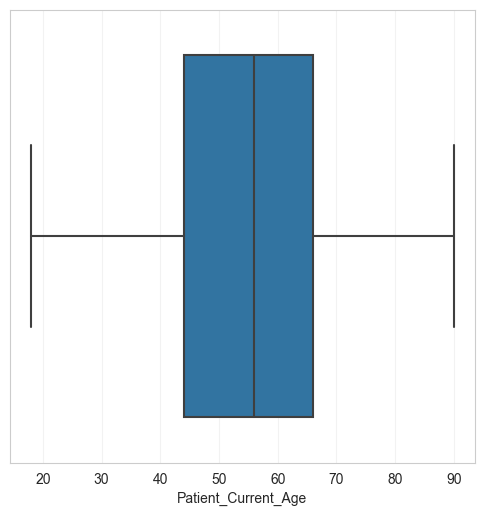

In [18]:
master_cancer_age = master_cancer.dropna(subset=['Patient_Current_Age'])


h = sns.boxplot(data=master_cancer,x='Patient_Current_Age', hue='Sample_Type', dodge=True)

'''fig, ax = boxplot_sampletype(master_cancer_age, 
                             'Patient_Current_Age', 
                             figsize= (10,3), 
                             title='Patient Age distribution in ' + cancer_type, 
                             title_font=12,
                             tp53_metrics=False,
                             xlim=[0,1.2])'''

## Sex

count_Sex
Sex              
Female       3930
Male           36

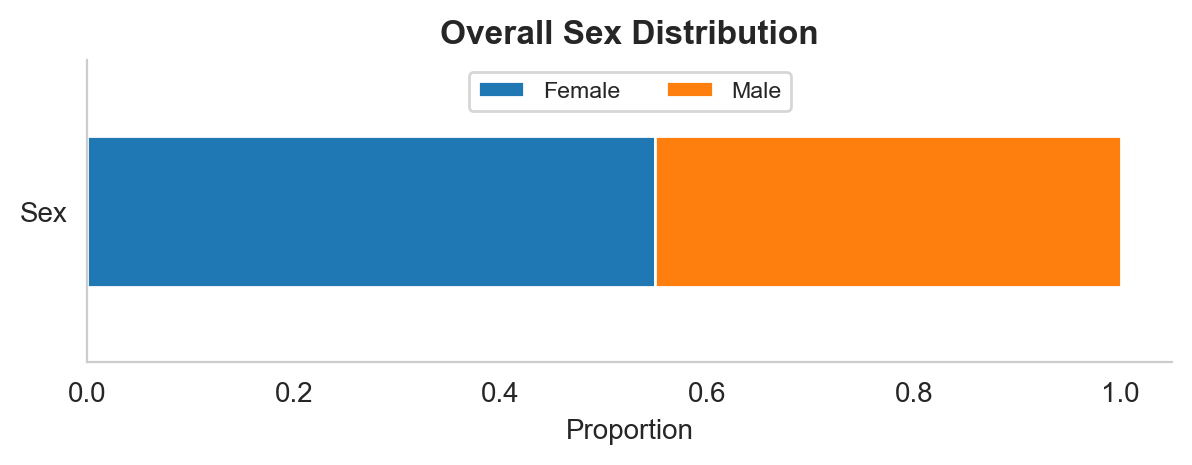

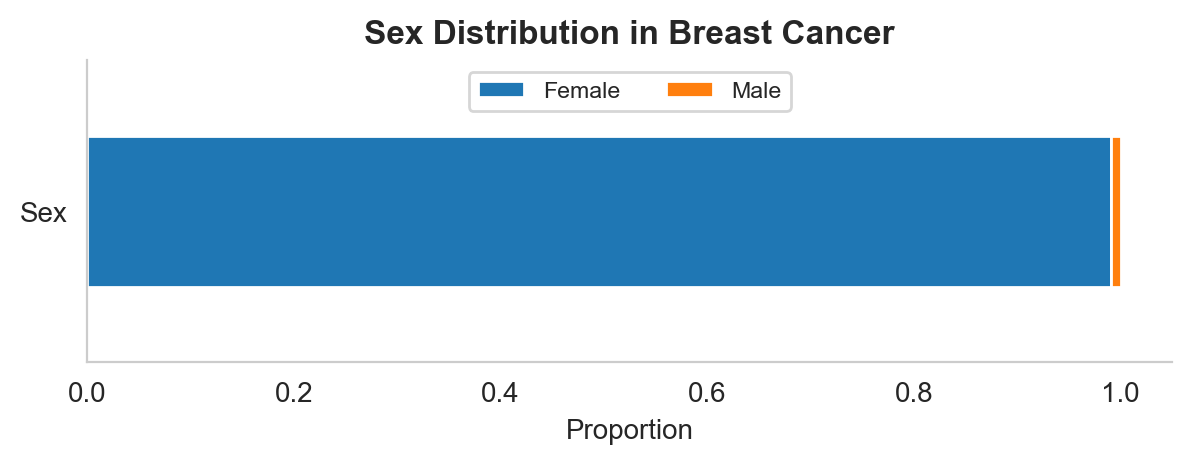

In [83]:
fig, ax = proportion_plot(master, 
                metrics='Sex',
                title= 'Overall Sex Distribution',
                figsize=(7,2),
                display_table=False, 
                ncol_legend =6)

fig, ax = proportion_plot(master_cancer, 
                metrics='Sex',
                title= 'Sex Distribution in ' + cancer_type,
                figsize=(7,2),
                display_table=True, 
                ncol_legend =6)

count_Race_Category
Race_Category                                      
WHITE                                         21233
ASIAN-FAR EAST/INDIAN SUBCONT                  1914
BLACK OR AFRICAN AMERICAN                      1796
PT REFUSED TO ANSWER                            932
OTHER                                           711
NO VALUE ENTERED                                567
UNKNOWN                                         143
NATIVE AMERICAN-AM IND/ALASKA                    51
NATIVE HAWAIIAN OR PACIFIC ISL                   10

count_Race_Category
Race_Category                                     
WHITE                                         2889
BLACK OR AFRICAN AMERICAN                      365
ASIAN-FAR EAST/INDIAN SUBCONT                  273
OTHER                                          140
PT REFUSED TO ANSWER                           136
NO VALUE ENTERED                               127
UNKNOWN                                         30
NATIVE AMERICAN-AM IND/ALASKA                    6

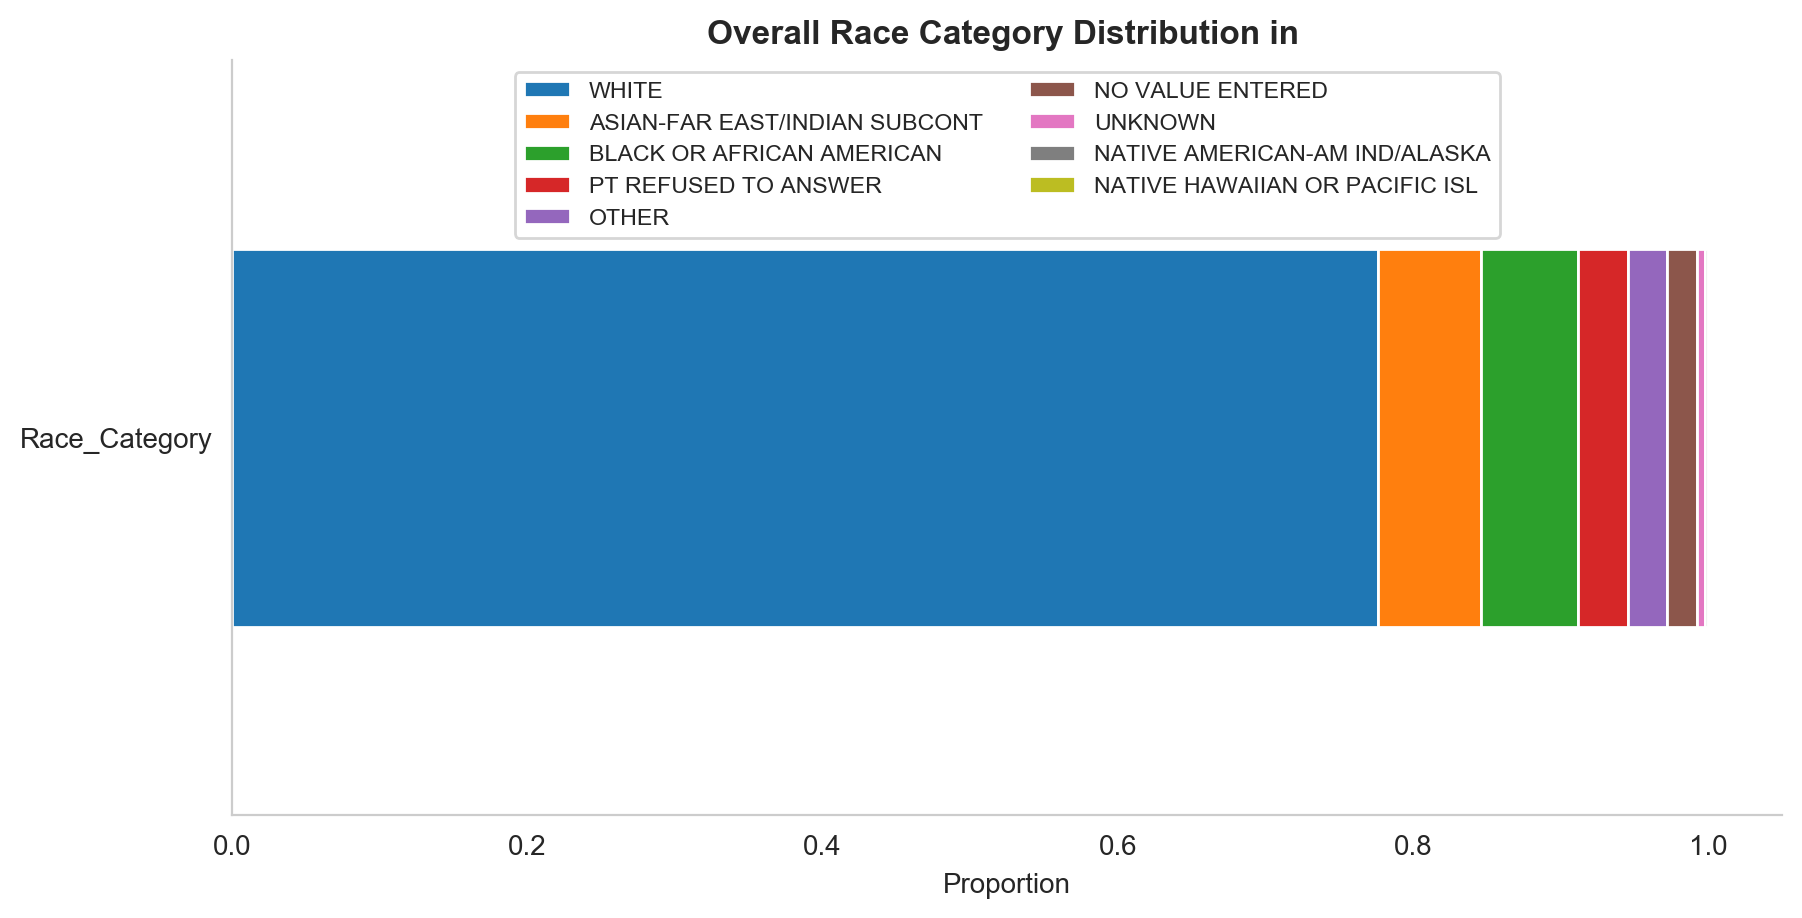

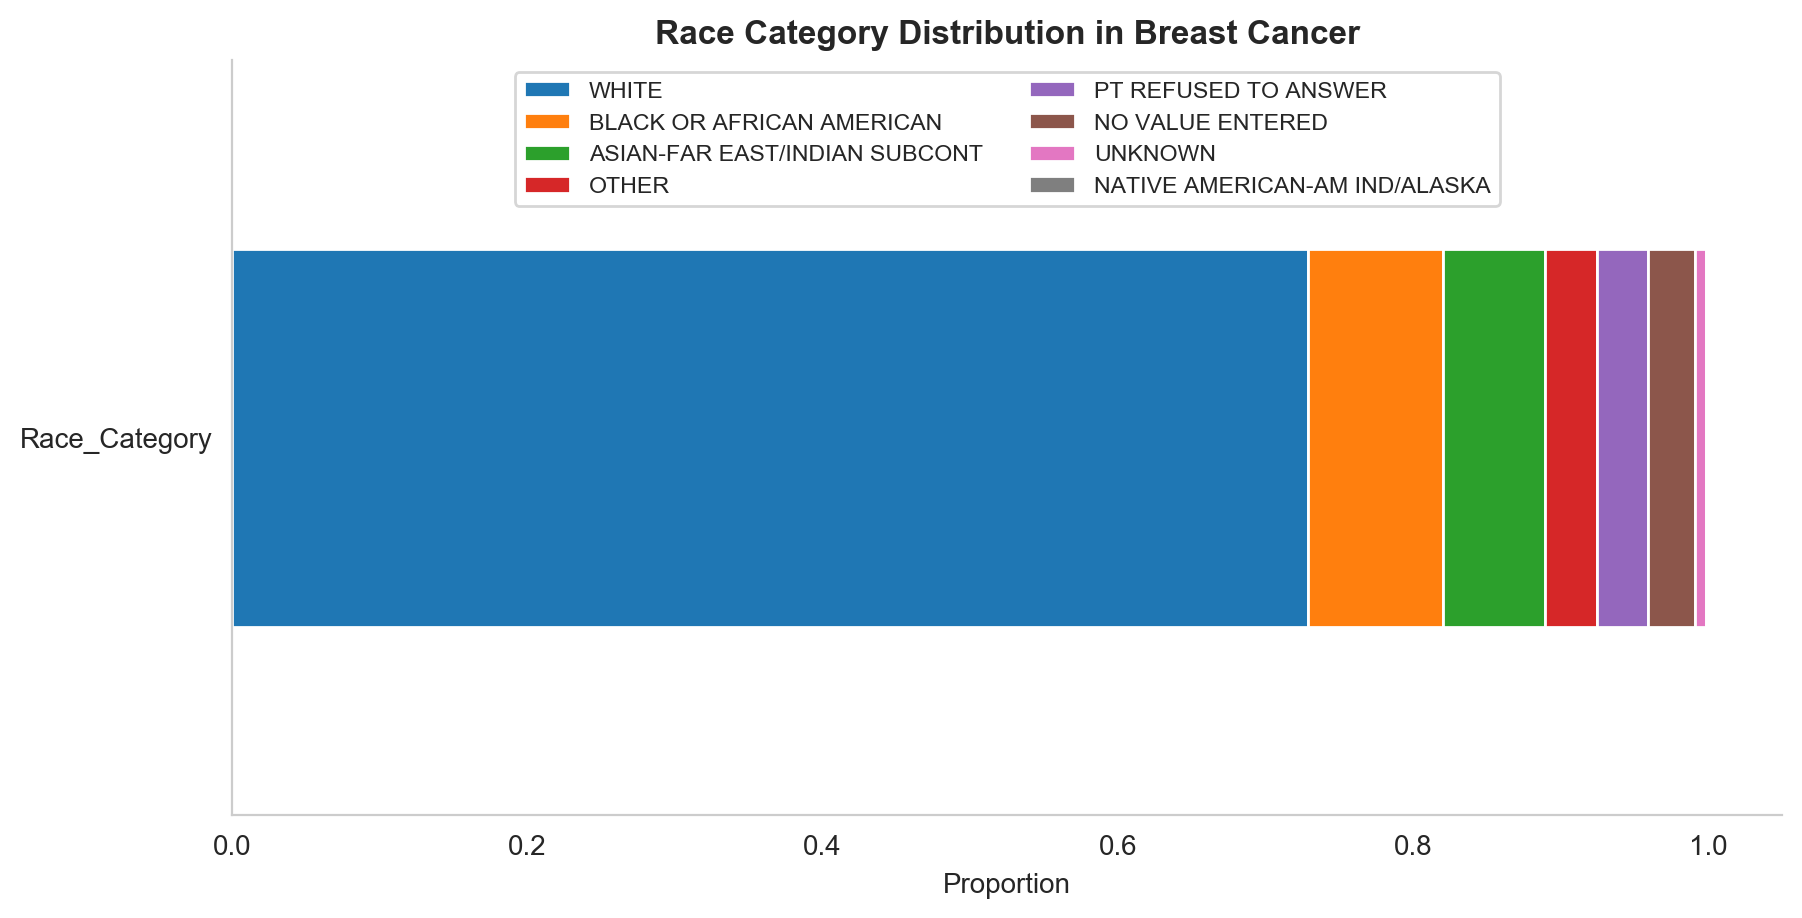

In [87]:
fig, ax = proportion_plot(master, 
                metrics='Race_Category',
                title= 'Overall Race Category Distribution in ',
                figsize=(10,5),
                display_table=True, 
                ncol_legend =2)

fig, ax = proportion_plot(master_cancer, 
                metrics='Race_Category',
                title= 'Race Category Distribution in ' + cancer_type,
                figsize=(10,5),
                display_table=True, 
                ncol_legend =2)

# Cancer Summary

In [44]:
plt.rc('text', usetex=False)

In [567]:
def plot_scatters(data: pd.DataFrame, title:str, metrics: str, ax, met_prim=False):
    data = data[data['tp53_count']>=2]
    if met_prim:
        data = data[data['Sample_Type'] == met_prim]
    data_ccf = data[[metrics + '_1', metrics + '_2',metrics + '_3',metrics + '_4',metrics + '_5']]
    max_table_ccf = pd.DataFrame(np.sort(data_ccf.fillna(0).values)[:,-2:], columns=['2nd-largest','largest'])
    max_table_ccf = pd.concat([max_table_ccf, data.reset_index().tp53_group], axis=1)
    
    sns.scatterplot(x='largest', y='2nd-largest', data=max_table_ccf, ax=ax, hue='tp53_group', palette=palette, legend=False, s=100)
    ax.plot([0,1], [0,1], linewidth=0.5, color='grey')
    ax.set_ylabel('')
    ax.set_xlabel('')
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
    ax.set_title(title, weight = 'bold', fontsize=20)
    ax.text(.5,.9, str(data.shape[0]) +' samples',
        horizontalalignment='center',
        transform=ax.transAxes, fontsize=18)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
def boxplot_sampletype(df: pd.DataFrame, metrics: str, ax, title: str = '',tp53_metrics=False, title_font: int=20, xlim=[0,1], continuous= False, legend=True):
    groupby = get_groupby(df, 'Sample_Type', 'count')

    if tp53_metrics:
        groupby= get_groupby(df[~df[metrics + '_1'].isna()], 'Sample_Type', 'count')
        data_1 =  pd.DataFrame(df[['Tumor_Id', metrics + '_1']])
        data_1.columns = ['Tumor_Id', metrics]
        data_2 = pd.DataFrame(df[['Tumor_Id', metrics + '_2']])
        data_2.columns = ['Tumor_Id', metrics]
        data_3 = pd.DataFrame(df[['Tumor_Id', metrics + '_3']])
        data_3.columns = ['Tumor_Id', metrics]
        data_4 = pd.DataFrame(df[['Tumor_Id', metrics + '_4']])
        data_4.columns = ['Tumor_Id', metrics]
        data_5 = pd.DataFrame(df[['Tumor_Id', metrics + '_5']])
        data_5.columns = ['Tumor_Id', metrics]
        data_tot = data_1.append(data_2)
        data_tot = data_tot.append(data_3)
        data_tot = data_tot.append(data_4)
        data_tot = data_tot.append(data_5)

        df = pd.merge(left=data_tot, right=df[['Tumor_Id','tp53_cn_state', 'tp53_tcn', 'Sample_Type']],how='left', left_on='Tumor_Id',right_on='Tumor_Id')
        data_cancer_prim = df[df['Sample_Type'] == 'Primary'][~df[metrics].isna()]
        data_cancer_met = df[df['Sample_Type'] == 'Metastasis'][~df[metrics].isna()]
        numbers = [data_cancer_prim.shape[0], data_cancer_met.shape[0]]
    if continuous == True:
        statistic, p_value = ranksums(df[df['Sample_Type'] == 'Primary'][metrics].dropna().values,df[df['Sample_Type'] == 'Metastasis'][metrics].dropna().values)
        if p_value<=0.001: s='***'
        elif p_value<=0.01: s='**'
        elif p_value<=0.05: s='*'
        elif p_value>0.05: s=''
        else: s=''
        ax.annotate(s=s, xy=(1,0.4), xycoords='axes fraction', fontsize=20)
    
    else:
        statistic, p_value = ranksums(df[df['Sample_Type'] == 'Primary'][metrics].dropna().values,df[df['Sample_Type'] == 'Metastasis'][metrics].dropna().values)
        if p_value<=0.001: s='***'
        elif p_value<=0.01: s='**'
        elif p_value<=0.05: s='*'
        elif p_value>0.05: s=''
        else: s=''
        ax.annotate(s=s, xy=(1,0.4), xycoords='axes fraction', fontsize=20)
    
    
    
    if continuous: sns.violinplot(x=metrics, y='Sample_Type',data=df,ax=ax, inner='quartile', dodge=False,order=['Primary', 'Metastasis'], palette='muted').set_title(title, weight='bold', fontsize=title_font)
    else: sns.boxplot(x=metrics, y='Sample_Type',data=df,ax=ax, dodge=False,order=['Primary', 'Metastasis'], palette='muted', showfliers=False).set_title(title, weight='bold', fontsize=title_font)
    
    if tp53_metrics:
        try:
            ax.set_yticklabels(['P (' + str(numbers[0]) + ')',
                                'M (' + str(numbers[1]) + ')'], 
                                fontsize=18)
        except: pass
    else: 
        try:
            ax.set_yticklabels(['P (' + str(int(groupby.loc['Primary'])) + ')',
                                'M (' + str(int(groupby.loc['Metastasis'])) + ')'], 
                                fontsize=18)
        except: pass

    ax.set_xlim(xlim)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        
    if legend == False:
        ax.axes.get_yaxis().set_ticks([])



def plot_mut_count_subgroups(df: pd.DataFrame, ax1, cancer_type: str, metrics: str, title: str = '',  xlim: int=25, met_prim = None, continuous=False, tp53_metrics=False, linewidth=1, width=1, hue=False, legend=True, colors=False):
    
    # Figure initialization
    if met_prim:
        df = df[df['Sample_Type'] == met_prim]

    ax1.set_xlim(0, xlim)
    ax1.tick_params(axis='both', which='major', labelsize=8)

    my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
    my_colors_remixed = [my_colors[5], my_colors[2], my_colors[3], my_colors[0], my_colors[4], my_colors[1]]
    my_colors_remixed_hue = [my_colors[5],my_colors[5], my_colors[2], my_colors[2],my_colors[3], my_colors[3],
                             my_colors[0],my_colors[0], my_colors[4],my_colors[4], my_colors[1], my_colors[1]]
    
    
    data = df
    data_cancer = data[data['Cancer_Type'] == cancer_type]

    if tp53_metrics:
        groupby= get_groupby(data_cancer[~data_cancer[metrics + '_1'].isna()], 'tp53_group', 'count')
        groupby_prim = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Primary'][~data_cancer[metrics + '_1'].isna()], 'tp53_group', 'count') 
        groupby_met = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Metastasis'][~data_cancer[metrics + '_1'].isna()], 'tp53_group', 'count')
        groupby = groupby.to_dict()['count'] ; groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
        data_1 =  pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_1']])
        data_1.columns = ['Tumor_Id', metrics]
        data_2 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_2']])
        data_2.columns = ['Tumor_Id', metrics]
        data_3 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_3']])
        data_3.columns = ['Tumor_Id', metrics]
        data_4 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_4']])
        data_4.columns = ['Tumor_Id', metrics]
        data_5 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_5']])
        data_5.columns = ['Tumor_Id', metrics]
        data_tot = data_1.append(data_2)
        data_tot = data_tot.append(data_3)
        data_tot = data_tot.append(data_4)
        data_tot = data_tot.append(data_5)

        data_cancer = pd.merge(left=data_tot, right=data_cancer[['Tumor_Id','tp53_group', 'tp53_tcn', 'Sample_Type']],how='left', left_on='Tumor_Id',right_on='Tumor_Id')
        
        data_cancer_prim = data_cancer[data_cancer['Sample_Type'] == 'Primary'][~data_cancer[metrics].isna()]
        data_cancer_met = data_cancer[data_cancer['Sample_Type'] == 'Metastasis'][~data_cancer[metrics].isna()]
        groupby_met = get_groupby(data_cancer_met, 'tp53_group', 'count')
        groupby_prim = get_groupby(data_cancer_prim, 'tp53_group', 'count')
        groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
        
    else:
        groupby = get_groupby(data_cancer, 'tp53_group', 'count') 
        groupby_prim = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Primary'], 'tp53_group', 'count') 
        groupby_met = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Metastasis'], 'tp53_group', 'count')
        groupby = groupby.to_dict()['count'] ; groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
    
    desired_order_list = [5, 2, 4, 3, 1]
    
    for groupbys in [groupby, groupby_prim, groupby_met]:
        for group in ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']:
            if group not in groupbys: groupbys[group] = 0
    
    desired_order_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']
    groupby_prim = {k: groupby_prim[k] for k in desired_order_list}
    groupby_met = {k: groupby_met[k] for k in desired_order_list}

    if continuous:
        if hue == True: 
            h=sns.violinplot(y="tp53_group",
                    x=metrics,
                    data=data_cancer,
                    ax=ax1,
                    dodge=False,
                    hue='Sample_Type',
                    split=True,
                    cut=0,
                    inner="quartile",
                    palette=['darkviolet', 'lightpink'],
                    order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL'],
                    linewidth=linewidth, 
                    width=width,
                    legend_out=False)
            #patch_violinplot(my_colors_remixed_hue, ax1, groupby_met, groupby_prim)
        else:
            h=sns.violinplot(y="tp53_group",
                    x=metrics,
                    data=data_cancer,
                    ax=ax1,
                    dodge=False,
                    split=True,
                    inner="quartile",
                    palette=my_colors_remixed,
                    order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL'],
                    linewidth=linewidth, 
                    width=width).set_title(title, weight='bold', fontsize=20)

    else:
        if hue==True:
            h=sns.boxplot(y="tp53_group",
                    x=metrics,
                    data=data_cancer,
                    ax=ax1,
                    dodge=True,
                    hue='Sample_Type',
                    palette=['darkviolet', 'lightpink'],
                    order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL'])
            
        else:
            h=sns.boxplot(y="tp53_group",
                    x=metrics,
                    data=data_cancer,
                    ax=ax1,
                    dodge=False,
                    palette=my_colors_remixed,
                    order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']
                         ).set_title(title, weight='bold', fontsize=20)

    ax1.set_xlabel('')
    ax1.set_ylabel('')
    if hue:
        ax1.set_yticklabels(['0_HETLOSS: P ' + str(int(groupby_prim['0_HETLOSS'])) + '\nM '+str(int(groupby_met['0_HETLOSS'])),
                             '1_WILD_TYPE: P '+ str(int(groupby_prim['1_WILD_TYPE']))+ '\nM '+str(int(groupby_met['1_WILD_TYPE'])),
                             '>1muts: P '+ str(int(groupby_prim['>1muts']))+ '\nM '+str(int(groupby_met['>1muts'])),
                             '>=1_LOSS: P '+ str(int(groupby_prim['>=1_LOSS']))+ '\nM '+str(int(groupby_met['>=1_LOSS'])),
                             '>=1_cnLOH: P '+ str(int(groupby_prim['>=1_cnLOH']))+ '\nM '+str(int(groupby_met['>=1_cnLOH'])),
                             'HOMDEL: P '+ str(int(groupby_prim['HOMDEL']))+ '\nM '+str(int(groupby_met['HOMDEL'])),
                              ], fontsize=18)
        ax1.legend_.remove()
        ax1.set_title(title, weight='bold', fontsize=20)
            
    
    else:   
        try:
            ax1.set_yticklabels(['0_HETLOSS (' + str(int(groupby['0_HETLOSS'])) + ')',
                                 '1_WILD_TYPE ('+ str(int(groupby['1_WILD_TYPE'])) + ')',
                                 '>1muts ('+ str(int(groupby['>1muts'])) + ')',
                                 '>=1_LOSS ('+ str(int(groupby['>=1_LOSS'])) + ')',
                                 '>=1_cnLOH ('+ str(int(groupby['>=1_cnLOH'])) + ')',
                                 'HOMDEL ('+ str(int(groupby['HOMDEL'])) + ')',
                                  ], fontsize=20)
        except: pass
    
    # Add significance
    
    for i,group in enumerate(['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']):
        master_group = data_cancer[data_cancer['tp53_group'] == group]
        statistic, p_value = ranksums(master_group[master_group['Sample_Type'] == 'Primary'][metrics].dropna().values,master_group[master_group['Sample_Type'] == 'Metastasis'][metrics].dropna().values)
        if p_value<=0.001: s='***'
        elif p_value<=0.01: s='**'
        elif p_value<=0.05: s='*'
        elif p_value>0.05: s=''
        else: s=''
        if continuous == True:
            ax1.annotate(s=s, xy=(1,0.9 - (1/6)*i), xycoords='axes fraction', fontsize=20)
        else:
            ax1.annotate(s=s, xy=(1.,0.9 - (1/6)*i), xycoords='axes fraction', fontsize=20)
    
    
    style(ax1)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(17)
        
    if legend == False:
        ax1.axes.get_yaxis().set_ticks([])
    
    if colors == True:
        color_list=[mc[5],mc[5],mc[2],mc[2],mc[3],mc[3],mc[4],mc[4],mc[0],mc[0],mc[1],mc[1]]
        color_list_final = ['']*12
        for i, key in enumerate(list(groupby_prim.keys())):
            if groupby_prim[key] != 0:
                color_list_final[2*i] = color_list[2*i]
        for i, key in enumerate(list(groupby_met.keys())):
            if groupby_met[key] != 0:
                color_list_final[2*i + 1] = color_list[2*i + 1]
        
        if '' in color_list_final: color_list_final.remove('')
            
        for i, artist in enumerate(ax1.artists):
            # Set the linecolor on the artist to the facecolor, and set the facecolor to None
            col = artist.get_facecolor()
            artist.set_edgecolor('black')
            artist.set_facecolor(color_list_final[i])

            # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
            # Loop over them here, and use the same colour as above
            for j in range(i * 6, i * 6 + 6):
                line = ax1.lines[j]
                if j % 6 == 4: line.set_color('black')
                else: line.set_color('black')
                #line.set_mfc('None')
                #line.set_mec('None')

In [597]:
# import matplotlib.gridspec as gridspec

def cancer_panel(cancer_type):
    
    
    mc = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
    palette ={'>=1_LOSS':mc[0], 'HOMDEL':mc[1], '1_WILD_TYPE':mc[2], '>1muts':mc[3], '>=1_cnLOH':mc[4], '0_HETLOSS':mc[5]}
    palette_list = [mc[5],mc[2],mc[3],mc[4],mc[0],mc[1]]
    group_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '>=1_LOSS','HOMDEL']
    master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
    # we remover indeterminate and NA tp53_cn_state samples
    master_cancer = master[master['Cancer_Type'] == cancer_type][master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]

    
    
    fig = plt.figure(figsize=(40,40))
    outer = gridspec.GridSpec(nrows=20, ncols=17)

    ##==================================================================================================================
    # PIE CHART + Prim/Met + # of muts + mutation_type

    inner = gridspec.GridSpecFromSubplotSpec(nrows=3, ncols=17, subplot_spec=outer[2:5  , :17],wspace=1.5, hspace=1)
    ax_inner_pie = plt.Subplot(fig, inner[:3,:2])
    ax_inner_num_mut = plt.Subplot(fig, inner[:3,2:6])
    ax_inner_sampletype = plt.Subplot(fig, inner[:3,6:9])
    ax_inner_subgroup = plt.Subplot(fig, inner[:3,9:10])
    ax_inner_subgroup2 =  plt.Subplot(fig, inner[:3,10:11])
    
    ax_inner_muttype = plt.Subplot(fig, inner[:3,13:17])


    # PIE
    sizes = [master_cancer.shape[0] - master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] == 'DIPLOID'].shape[0] - master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0] - master_cancer[master_cancer['tp53_count'] ==0][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0], 
        master_cancer[master_cancer['tp53_count'] == 0][(master_cancer['tp53_cn_state'] == 'HOMDEL')| (master_cancer['tp53_cn_state'] == 'HETLOSS')].shape[0],
        master_cancer[master_cancer['tp53_count'] ==0][master_cancer['tp53_cn_state'] != 'DIPLOID'][~((master_cancer['tp53_cn_state'] == 'HOMDEL')| (master_cancer['tp53_cn_state'] == 'HETLOSS'))].shape[0],
        master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0],
        master_cancer[master_cancer['tp53_count'] >=1][master_cancer['tp53_cn_state'] == 'DIPLOID'].shape[0]  
        ]

    colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

    labels = ['No TP53 hit\n    (' + str(sizes[0])+')', 'TP53 LOSS hit\n     ('+str(sizes[1])+')    ','TP53 Other CN hit\n     ('+str(sizes[2])+')    ', 'TP53 CN+mut hit\n     ('+str(sizes[3])+')     ',  '    TP53 mut\n        ('+str(sizes[4])+')     ']
    patches, texts = ax_inner_pie.pie(sizes, labels=labels, startangle=330, colors=sns.xkcd_palette(colors))
    texts = [ _.set_fontsize(17) for _ in texts ]
    ax_inner_pie.set_title('TP53 Status', weight='bold', fontsize=20)

    fig.add_subplot(ax_inner_pie)

    # Subgroup Proportion (Numbers)
    
    
    group_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '>=1_LOSS','HOMDEL']
    ax_inner_sampletype.set_title('            Subgroup Proportion', fontsize=20, weight='bold')
    master_cancer_prim = master_cancer[master_cancer['Sample_Type'] == 'Primary']
    master_cancer_met = master_cancer[master_cancer['Sample_Type'] == 'Metastasis']
    master_cancer_new = master_cancer_prim.append(master_cancer_met)
    groupby_met = get_groupby(master_cancer_met, 'tp53_group', 'count')
    groupby_prim = get_groupby(master_cancer_prim, 'tp53_group', 'count')
    groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']

    for groupbys in [groupby_prim, groupby_met]:
        for group in ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']:
            if group not in groupbys: groupbys[group] = 0

    desired_order_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']
    groupby_prim = {k: groupby_prim[k] for k in desired_order_list}
    groupby_met = {k: groupby_met[k] for k in desired_order_list}


    g = sns.countplot(data=master_cancer_new, x='tp53_group', ax=ax_inner_sampletype, hue='Sample_Type',
                      order=group_list)
    ax_inner_sampletype.spines['right'].set_visible(False)
    ax_inner_sampletype.spines['top'].set_visible(False)
    ax_inner_sampletype.set_xlabel('')
    ax_inner_sampletype.set_ylabel('')
    ax_inner_sampletype.xaxis.set_tick_params(labelsize=14)
    ax_inner_sampletype.yaxis.set_tick_params(labelsize=14)
    ax_inner_sampletype.set_xticklabels(['P   M']*6)
    ax_inner_sampletype.get_legend().remove()

    rects = ax_inner_sampletype.patches
    labels = group_list*2
    for rect, label, i in zip(rects, labels, range(12)):
        height = rect.get_height()
        width = rect.get_width()
        rect.set_width(1*width)
        if np.isnan(height) : height = 0
        if i<=5:
            if int(groupby_prim[group_list[i]])<10:
                 ax_inner_sampletype.text(rect.get_x() + width/3 ,height*(101/100),  str(groupby_prim[group_list[i]]),
                ha='left', va='bottom', fontsize=15)
            elif int(groupby_prim[group_list[i]])<100:
                 ax_inner_sampletype.text(rect.get_x() + width/4 ,height*(101/100),  str(groupby_prim[group_list[i]]),
                ha='left', va='bottom', fontsize=15)
            else: 
                ax_inner_sampletype.text(rect.get_x(),height*(101/100),  str(groupby_prim[group_list[i]]),
                ha='left', va='bottom', fontsize=15)
        if i>5:
            if int(groupby_met[group_list[i-6]])<10:
                ax_inner_sampletype.text(rect.get_x()+ width/3,height*(101/100),  str(groupby_met[group_list[i-6]]),
                ha='left', va='bottom', fontsize=15)
            elif int(groupby_met[group_list[i-6]])<100:
                ax_inner_sampletype.text(rect.get_x()+ width/4,height*(101/100),  str(groupby_met[group_list[i-6]]),
                ha='left', va='bottom', fontsize=15)
            else:
                ax_inner_sampletype.text(rect.get_x(),height*(101/100),  str(groupby_met[group_list[i-6]]),
                ha='left', va='bottom', fontsize=15)
        rect.set_facecolor(palette[label])
    

    fig.add_subplot(ax_inner_sampletype)


    # Subgroup Proportion [0,1]
   
    metrics='tp53_group'

    count_prim = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Primary'], metrics, 'count_prim_' + metrics)
    count_met = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'], metrics, 'count_met_' + metrics)
    freq_prim = pd.DataFrame(count_prim['count_prim_' + metrics]).sort_values(by=['count_prim_' + metrics], ascending=False)/ pd.DataFrame(count_prim['count_prim_' + metrics]).sum()
    freq_met = pd.DataFrame(count_met['count_met_' + metrics]).sort_values(by=['count_met_' + metrics], ascending=False)/ pd.DataFrame(count_met['count_met_' + metrics]).sum()
    freq_prim.columns=['P'] ; freq_met.columns=['M']
    freq = pd.concat([freq_prim, freq_met], axis=1)
    freq = freq.reindex(group_list)

    freq.T.plot(kind = 'bar', stacked=True, ax=ax_inner_subgroup, yticks=[0,0.25,0.5,0.75,1], color=palette_list)
    ax_inner_subgroup.set_title('', weight = 'bold', fontsize=20)
    ax_inner_subgroup.legend_.remove()
    ax_inner_subgroup.xaxis.set_major_formatter(matplotlib.ticker.IndexFormatter([ 'P\n' + str(pd.DataFrame(count_prim['count_prim_' + metrics]).sum().values), 'M\n' + str(pd.DataFrame(count_met['count_met_' + metrics]).sum().values)]))

    ax_inner_subgroup.spines['right'].set_visible(False)
    ax_inner_subgroup.spines['top'].set_visible(False)

    for container in ax_inner_subgroup.containers:
        for i, child in enumerate(container.get_children()):
            child.set_x(child.get_x() - 0.2)
            child.set_width(1)

    for tick in ax_inner_subgroup.get_xticklabels():
        tick.set_rotation(0)
    for tick in ax_inner_subgroup.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax_inner_subgroup.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    
    fig.add_subplot(ax_inner_subgroup)
    
    
    
    # tp53 residual Subgroup [0,1]
    metrics='tp53_res_group'
    res_group_list = ['no_tp53_res','tp53_res', 'uncertain']
    palette_res = ['#1E8449','#2ECC71',  '#7F8C8D']
    
    count_prim = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Primary'], metrics, 'count_prim_' + metrics)
    count_met = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'], metrics, 'count_met_' + metrics)
    freq_prim = pd.DataFrame(count_prim['count_prim_' + metrics]).sort_values(by=['count_prim_' + metrics], ascending=False)/ pd.DataFrame(count_prim['count_prim_' + metrics]).sum()
    freq_met = pd.DataFrame(count_met['count_met_' + metrics]).sort_values(by=['count_met_' + metrics], ascending=False)/ pd.DataFrame(count_met['count_met_' + metrics]).sum()
    freq_prim.columns=['P'] ; freq_met.columns=['M']
    freq = pd.concat([freq_prim, freq_met], axis=1)
    freq = freq.reindex(res_group_list )

    freq.T.plot(kind = 'bar', stacked=True, ax=ax_inner_subgroup2, yticks=[], color=palette_res)
    ax_inner_subgroup2.set_title('', weight = 'bold', fontsize=12)

    # Shrink current axis by 20%
    box = ax_inner_subgroup2.get_position()
    ax_inner_subgroup2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax_inner_subgroup2.legend(['no tp53 residual', 'tp53 residual', 'uncertain'],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
    ax_inner_subgroup2.xaxis.set_major_formatter(matplotlib.ticker.IndexFormatter([ 'P\n' + str(pd.DataFrame(count_prim['count_prim_' + metrics]).sum().values), 'M\n' + str(pd.DataFrame(count_met['count_met_' + metrics]).sum().values)]))

    ax_inner_subgroup2.spines['right'].set_visible(False)
    ax_inner_subgroup2.spines['top'].set_visible(False)

    for container in ax_inner_subgroup2.containers:
        for i, child in enumerate(container.get_children()):
            child.set_x(child.get_x() - 0.2)
            child.set_width(1)

    for tick in ax_inner_subgroup2.get_xticklabels():
        tick.set_rotation(0)
        
    for tick in ax_inner_subgroup2.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax_inner_subgroup2.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
        
    fig.add_subplot(ax_inner_subgroup2)


    # # of Muts
    groups = ['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL']

    for i,group in enumerate(groups):
        master_group = master_cancer[master_cancer['tp53_group'] == group]#[master_cancer['tp53_count']<4]
        groupby_prim = get_groupby(master_group[master_group['Sample_Type'] == 'Primary'], 'tp53_count', group + '_count')
        groupby_met = get_groupby(master_group[master_group['Sample_Type'] == 'Metastasis'], 'tp53_count', group + '_count')
        if i == 0 : met = groupby_met ; prim = groupby_prim
        else: met = pd.concat([met, groupby_met], axis=1) ; prim = pd.concat([prim, groupby_prim], axis=1)
    for i in [0,1,2,3,4,5]:
        if i not in met.index: met.loc[i]=[0]*6
        if i not in prim.index: prim.loc[i]=[0]*6   
    met = met.fillna(0) ; prim = prim.fillna(0)
    met.index = ['0 | M', '1 | M', '2 | M', '3 | M', '4 | M', '5 | M'] ; prim.index = ['0 | P', '1 | P', '2 | P', '3 | P', '4 | P', '5 | P']
    count = pd.concat([met, prim], axis=0)
    count= count.fillna(0)
    count = count.reindex(['0 | P', '0 | M','1 | P','1 | M','2 | P','2 | M','3 | P','3 | M', '4 | P', '4 | M', '5 | P', '5 | M'])
    count.loc['>2 | M'] = count.apply(lambda x: x['3 | M'] + x['4 | M'] + x['5 | M'], axis=0)
    count.loc['>2 | P'] = count.apply(lambda x: x['3 | P'] + x['4 | P'] + x['5 | P'], axis=0)
    count = count.drop(['3 | P','3 | M', '4 | P', '4 | M', '5 | P', '5 | M'])

    h = count.plot(kind = 'bar', stacked=True, ax=ax_inner_num_mut)
    h.set_xticklabels(['0|P', '0|M','1|P','1|M','2|P','2|M','>2|P','>2|M'], rotation=0)

    # Put a legend to the right of the current axis
    ax_inner_num_mut.set_title('Number of TP53 mutations per sample',weight='bold', fontsize=20)
    ax_inner_num_mut.spines['right'].set_visible(False)
    ax_inner_num_mut.spines['top'].set_visible(False)
    ax_inner_num_mut.grid(True)

    palette_list_new = [mc[5],mc[4],mc[0],mc[3],mc[2], mc[1]]
    for j,container in enumerate(ax_inner_num_mut.containers):
        for i, child in enumerate(container.get_children()):
            child.set_facecolor(palette_list_new[j])
            if i%2 == 1: child.set_x(child.get_x() - 0.2)
            child.set_width(0.8)

    ax_inner_num_mut.set_xticks([0.1, 0.9, 2.1, 2.9, 4.1, 4.9, 6.1, 6.9])

    ax_inner_num_mut.legend(['0_HETLOSS', '>=1_cnLOH', '>=1_LOSS', '>1muts', '1_WILD_TYPE','HOMDEL'], fontsize=18)

    for tick in ax_inner_num_mut.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax_inner_num_mut.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 



    fig.add_subplot(ax_inner_num_mut)


    # Mutation Type
    
    mut_subgroups = ['>=1_LOSS', '>=1_cnLOH', '1_WILD_TYPE', 'HOMDEL', '>1muts']
    for subgroup in mut_subgroups:
        data_prim = master_cancer[master_cancer['tp53_group'] == subgroup][master_cancer['Sample_Type'] == 'Primary']
        data_met = master_cancer[master_cancer['tp53_group'] == subgroup][master_cancer['Sample_Type'] == 'Metastasis']
        data_1p = get_groupby(data_prim,'tp53_vc_group_1', 'count'); data_2p = get_groupby(data_prim,'tp53_vc_group_2', 'count'); data_3p = get_groupby(data_prim,'tp53_vc_group_3', 'count') ; data_4p = get_groupby(data_prim,'tp53_vc_group_4', 'count') ; data_5p = get_groupby(data_prim,'tp53_vc_group_5', 'count') 
        data_1m = get_groupby(data_met,'tp53_vc_group_1', 'count'); data_2m = get_groupby(data_met,'tp53_vc_group_2', 'count'); data_3m = get_groupby(data_met,'tp53_vc_group_3', 'count') ; data_4m = get_groupby(data_met,'tp53_vc_group_4', 'count') ; data_5m = get_groupby(data_met,'tp53_vc_group_5', 'count') 
        series_p = [data_1p,data_2p,data_3p,data_4p,data_5p]
        series_m = [data_1m,data_2m,data_3m,data_4m,data_5m]
        for i in range(len(series_p)):
            for line in ['175', '248', '273', 'hotspot', 'in_frame', 'missense', 'truncated']:
                if line not in list(series_p[i].index):
                    series_p[i] = series_p[i].append(pd.Series({'count': 0}, name=line))
        for i in range(len(series_m)):
            for line in ['175', '248', '273', 'hotspot', 'in_frame', 'missense', 'truncated']:
                if line not in list(series_m[i].index):
                    series_m[i] = series_m[i].append(pd.Series({'count': 0}, name=line))
        count_p = series_p[0].add(series_p[1]).add(series_p[2]).add(series_p[3]).add(series_p[4])
        count_m = series_m[0].add(series_m[1]).add(series_m[2]).add(series_m[3]).add(series_m[4])
        count_m.columns=[subgroup] ; count_p.columns=[subgroup]
        if subgroup == '>=1_LOSS': countm = count_m ; countp = count_p

        else: countm = pd.concat([countm, count_m], axis=1) ; countp = pd.concat([countp, count_p], axis=1)

    countm = countm.T.fillna(0) ; countp = countp.T.fillna(0)

    columns_m = list(countm.columns)
    columns_p = list(countp.columns)

    for column in columns_m:
        countm[column + '_r'] = countm.apply(lambda x: round(x[column]/x[columns_m].sum(),3), axis=1)
    for column in columns_p:   
        countp[column + '_r'] = countp.apply(lambda x: round(x[column]/x[columns_m].sum(),3), axis=1)
    countp['sum_p'] = countp[columns_p].sum(axis=1) ; countm['sum_m'] = countm[columns_m].sum(axis=1)
    countm = countm.set_index(pd.Series(['>=1_LOSS | M', '>=1_cnLOH | M', '1_WILD_TYPE | M', 'HOMDEL | M', '>1muts | M']))
    countp = countp.set_index(pd.Series(['>=1_LOSS | P', '>=1_cnLOH | P', '1_WILD_TYPE | P', 'HOMDEL | P', '>1muts | P']))

    count = pd.concat([countp, countm], axis=0).fillna(0)
    count = count.reindex(['1_WILD_TYPE | P','1_WILD_TYPE | M', '>1muts | P', '>1muts | M'
                           ,'>=1_LOSS | P','>=1_LOSS | M', '>=1_cnLOH | P', '>=1_cnLOH | M',
                            'HOMDEL | P','HOMDEL | M'])

    count = count.drop(['HOMDEL | P', 'HOMDEL | M'])

    df = count[['in_frame_r','truncated_r', '273_r', '248_r', '175_r','hotspot_r', 'missense_r']]
    h = df.plot(kind = 'barh', stacked=True, ax=ax_inner_muttype, yticks=[], colormap="Accent")
    ax_inner_muttype.legend(fontsize='small', ncol=1)
    ax_inner_muttype.set_xlabel('Proportion', fontsize=17)

    ax_inner_muttype.spines['right'].set_visible(False)
    ax_inner_muttype.spines['top'].set_visible(False)
    ax_inner_muttype.set_ylabel('')

    # Shrink current axis by 20%
    box = ax_inner_muttype.get_position()
    ax_inner_muttype.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax_inner_muttype.legend(['In Frame', 'Truncated', 'Hotspot 273','Hotspot 248','Hotspot 175', 'Other Hotspot', 'Other Missense'],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
    ax_inner_muttype.set_title('Mutation Type Proportion',weight='bold', fontsize=20)


    for container in ax_inner_muttype.containers:
        for i, child in enumerate(container.get_children()):
            child.set_height(0.8)
            if i%2 == 1:
                child.set_y(child.get_y() - 0.2)


    for container in ax_inner_muttype.containers:
        for i, child in enumerate(container.get_children()):
            if i%2 == 1: child.set_y(child.get_y() - child.get_height())  
            if i%2 == 0: child.set_y(child.get_y() + child.get_height())


    try:
            ax_inner_muttype.set_yticklabels(['1_WILD_TYPE | P ('+ str(int(count.loc['1_WILD_TYPE | P', 'sum_p'])) + ')',
                                '1_WILD_TYPE | M ('+ str(int(count.loc['1_WILD_TYPE | M', 'sum_m'])) + ')',
                                '>1muts | P ('+ str(int(count.loc['>1muts | P', 'sum_p'])) + ')',
                                '>1muts | M ('+ str(int(count.loc['>1muts | M', 'sum_m'])) + ')',
                                '>=1_LOSS | P ('+ str(int(count.loc['>=1_LOSS | P', 'sum_p'])) + ')',
                                '>=1_LOSS | M ('+ str(int(count.loc['>=1_LOSS | M', 'sum_m'])) + ')',
                                '>=1_cnLOH | P ('+ str(int(count.loc['>=1_cnLOH | P', 'sum_p'])) + ')',
                                '>=1_cnLOH | M ('+ str(int(count.loc['>=1_cnLOH | M', 'sum_m'])) + ')'],
                                 fontsize=10)
    except: pass

    ax_inner_muttype.set_yticks([1, 0.2, 3,2.2, 5, 4.2, 7, 6.2])
    for tick in ax_inner_muttype.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax_inner_muttype.yaxis.get_major_ticks():
        tick.label.set_fontsize(17)


    fig.add_subplot(ax_inner_muttype)
    
    
     ##==================================================================================================================
    # mutation_count / chr_affected / chr_loss / chr_cnloh / chr_gain met VS prim

    inner_ter = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=5, subplot_spec=outer[6:7, :17],wspace=0.2, hspace=0)
    
    ax_inner_mut = plt.Subplot(fig, inner_ter[0])
    ax_inner_aff = plt.Subplot(fig, inner_ter[1])
    ax_inner_loss = plt.Subplot(fig, inner_ter[2])
    ax_inner_cnloh = plt.Subplot(fig, inner_ter[3])
    ax_inner_gain = plt.Subplot(fig, inner_ter[4])

    master_cancer_gi = master_cancer[master_cancer['chr_affected']!='NaN']
    
    boxplot_sampletype(master_cancer,
                     'mutation_count',
                     title='Overall Mutation Count', 
                     ax=ax_inner_mut,
                     title_font=20,
                     xlim=[0,25],
                    continuous=False)

    boxplot_sampletype(master_cancer_gi,
                     'chr_affected',
                     title='# of chr affected chromosomes', 
                     ax=ax_inner_aff,
                     title_font=20,
                     xlim=[0,25],
                    continuous=False,
                    legend=False)

    boxplot_sampletype(master_cancer_gi,
                     'chr_loss',
                     title='# of chr affected by a LOSS',
                     ax=ax_inner_loss,
                     tp53_metrics=False,
                     title_font=20,
                     xlim=[0,25],
                     continuous=False,
                     legend=False)

    boxplot_sampletype(master_cancer_gi,
                     'chr_cnloh',
                     title='# of chr affected by a CNLOH', 
                     title_font=20,
                     ax=ax_inner_cnloh,
                     tp53_metrics= False,
                     xlim=[0,25],
                     continuous=False,
                      legend=False)

    boxplot_sampletype(master_cancer_gi,
                     'chr_gain',
                     title='# of chr affected by a GAIN', 
                     title_font=20,
                     ax=ax_inner_gain,
                     tp53_metrics= False,
                     xlim=[0,25],
                     continuous=False,
                      legend=False)

    fig.add_subplot(ax_inner_mut)
    fig.add_subplot(ax_inner_aff)
    fig.add_subplot(ax_inner_loss)
    fig.add_subplot(ax_inner_cnloh)
    fig.add_subplot(ax_inner_gain)


    ##==================================================================================================================
    # mutation_count / chr_affected / chr_loss / chr_cnloh / chr_gain subgroups

    inner_4 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=5, subplot_spec=outer[7:11, :17],wspace=0.2, hspace=0)
    ax_inner_mutsub = plt.Subplot(fig, inner_4[0])
    ax_inner_aff = plt.Subplot(fig, inner_4[1])
    ax_inner_loss = plt.Subplot(fig, inner_4[2])
    ax_inner_cnloh = plt.Subplot(fig, inner_4[3])
    ax_inner_gain = plt.Subplot(fig, inner_4[4])
    
    plot_mut_count_subgroups(master_cancer,
                             ax1=ax_inner_mutsub,
                             cancer_type=cancer_type, 
                             metrics='mutation_count', 
                             title= '', 
                             xlim=50, 
                             met_prim = None,
                             hue=True,
                             continuous=False,
                            colors=True)

    plot_mut_count_subgroups(master_cancer_gi,
                             ax1=ax_inner_aff,
                             cancer_type=cancer_type, 
                             metrics='chr_affected', 
                             title= '', 
                             xlim=25, 
                             met_prim = None,
                             hue=True,
                             legend=False,
                             continuous=False,
                            colors=True)

    plot_mut_count_subgroups(master_cancer_gi,
                             ax1=ax_inner_loss,
                             cancer_type=cancer_type, 
                             metrics='chr_loss', 
                             title= '', 
                             xlim=25, 
                             met_prim = None,
                             hue=True,
                             continuous=False,
                            legend=False,
                            colors=True)

    plot_mut_count_subgroups(master_cancer_gi,
                             ax1=ax_inner_cnloh,
                             cancer_type=cancer_type, 
                             metrics='chr_cnloh', 
                             title= '', 
                             xlim=25, 
                             met_prim = None,
                             hue=True,
                             continuous=False,
                            legend=False,
                            colors=True)
    
    plot_mut_count_subgroups(master_cancer_gi,
                             ax1=ax_inner_gain,
                             cancer_type=cancer_type, 
                             metrics='chr_gain', 
                             title= '', 
                             xlim=25, 
                             met_prim = None,
                             hue=True,
                             continuous=False,
                             legend=False,
                            colors=True)
    
    fig.add_subplot(ax_inner_mutsub)
    fig.add_subplot(ax_inner_aff)
    fig.add_subplot(ax_inner_loss)
    fig.add_subplot(ax_inner_cnloh)
    fig.add_subplot(ax_inner_gain)


    
    
    ##==================================================================================================================
    # Purity / tp53_vaf / tp53_ccf MET vs PRIM

    inner = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=3, subplot_spec=outer[12:13, :8],wspace=0.2, hspace=3)
    ax_inner_pur = plt.Subplot(fig, inner[0,0])
    ax_inner_vaf = plt.Subplot(fig, inner[0,1])
    ax_inner_ccf = plt.Subplot(fig, inner[0,2])

    boxplot_sampletype(master_cancer,
                     'purity',
                     title='Purity', 
                     ax=ax_inner_pur,
                     title_font=20,
                    continuous=True)

    boxplot_sampletype(master_cancer,
                     'tp53_vaf',
                     title='TP53_VAF',
                     ax=ax_inner_vaf,
                     tp53_metrics=True,
                     title_font=20,
                     continuous=True,
                    legend=False)

    boxplot_sampletype(master_cancer,
                     'tp53_ccf',
                     title='TP53_CCF', 
                     title_font=20,
                     ax=ax_inner_ccf,
                     tp53_metrics= True,
                     continuous=True,
                     legend=False)

    fig.add_subplot(ax_inner_pur)
    fig.add_subplot(ax_inner_vaf)
    fig.add_subplot(ax_inner_ccf)

    ##==================================================================================================================
    # Purity / tp53_vaf / tp53_ccf met/prim Subgroups

    inner_bis = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=3, subplot_spec=outer[13:17, :8],wspace=0.2, hspace=0)
    ax_inner_pursub = plt.Subplot(fig, inner_bis[0,0])
    ax_inner_vafsub = plt.Subplot(fig, inner_bis[0,1])
    ax_inner_ccfsub = plt.Subplot(fig, inner_bis[0,2])

    plot_mut_count_subgroups(master_cancer,
                             ax1=ax_inner_pursub,
                             cancer_type=cancer_type, 
                             metrics='purity', 
                             title= 'Purity', 
                             xlim=1, 
                             met_prim = None,
                             hue=True,
                             continuous=True,
                             linewidth=1)

    plot_mut_count_subgroups(master_cancer, 
                             ax1=ax_inner_vafsub,
                             cancer_type=cancer_type, 
                             metrics='tp53_vaf', 
                             title= 'TP53_VAF', 
                             xlim=1, 
                             met_prim = None,
                             tp53_metrics=True,
                             hue=True,
                             continuous=True,
                             linewidth=1,
                            legend=False)

    plot_mut_count_subgroups(master_cancer, 
                             ax1=ax_inner_ccfsub,
                             cancer_type=cancer_type, 
                             metrics='tp53_ccf', 
                             title= 'TP53_CCF', 
                             xlim=1, 
                             met_prim = None,
                             hue=True,
                             tp53_metrics=True,
                             continuous=True,
                             linewidth=1,
                            legend=False)

    fig.add_subplot(ax_inner_pursub)
    fig.add_subplot(ax_inner_vafsub)
    fig.add_subplot(ax_inner_ccfsub)

    ##==================================================================================================================
    # ScatterPlots

    inner = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, subplot_spec=outer[12:17  , 9:17],wspace=0.2, hspace=0.3)
    ax_inner_vafm = plt.Subplot(fig, inner[0,0])
    ax_inner_vafp = plt.Subplot(fig, inner[1,0])
    ax_inner_ccfm = plt.Subplot(fig, inner[0,1])
    ax_inner_ccfp = plt.Subplot(fig, inner[1,1])

    plot_scatters(master_cancer, 
                  title='ScatterPlot for TP53_VAF - Metastasis', 
                  metrics='tp53_vaf', 
                  met_prim='Metastasis',
                  ax=ax_inner_vafm)
    plot_scatters(master_cancer, 
                  title='ScatterPlot for TP53_VAF - Primary', 
                  metrics='tp53_vaf', 
                  met_prim='Primary',
                  ax=ax_inner_vafp)
    plot_scatters(master_cancer, 
                  title='ScatterPlot for TP53_CCF - Metastasis', 
                  metrics='tp53_ccf', 
                  met_prim='Metastasis',
                  ax=ax_inner_ccfm)
    plot_scatters(master_cancer, 
                  title='ScatterPlot for TP53_CCF - Primary', 
                  metrics='tp53_ccf', 
                  met_prim='Primary',
                  ax=ax_inner_ccfp)


    fig.add_subplot(ax_inner_vafp)
    fig.add_subplot(ax_inner_vafm)
    fig.add_subplot(ax_inner_ccfp)
    fig.add_subplot(ax_inner_ccfm)
    

    fig.subplots_adjust(left=0.05, bottom=0.10, right=0.92, top=0.90, wspace=2, hspace=1)

    fig.suptitle(cancer_type.upper() + 
                 '\n' + 
                 '{} samples - {} % of the cohort (P: {} - {} % | M: {} - {} %)'.format(master_cancer.shape[0],
                                                                                        round(100*float(len(master_cancer))/float(len(master)),2),
                                                                                        master_cancer[master_cancer['Sample_Type'] == 'Primary'].shape[0],
                                                                                        round(100*float(master_cancer[master_cancer['Sample_Type'] == 'Primary'].shape[0])/float(len(master_cancer)),1),
                                                                                        master_cancer[master_cancer['Sample_Type'] == 'Metastasis'].shape[0],
                                                                                        round(100*float(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'].shape[0])/float(len(master_cancer)),1)) +
                 '\n'+
                 '{} samples with TP53 hits (P: {} - {} % | M: {} - {} %)'.format(master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')].shape[0],
                                                                                  master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')][master_cancer['Sample_Type'] == 'Primary'].shape[0],
                                                                                  round(100*float(master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')][master_cancer['Sample_Type'] == 'Primary'].shape[0])/float(master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')].shape[0]),1),
                                                                                  master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')][master_cancer['Sample_Type'] == 'Metastasis'].shape[0],
                                                                                 round(100*float(master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')][master_cancer['Sample_Type'] == 'Metastasis'].shape[0])/float(master_cancer[(master_cancer['tp53_count'] >=1) | (master_cancer['tp53_cn_state'] != 'DIPLOID')].shape[0]),1)
                                                                                 ),

                 fontsize=40,fontweight='bold')

    plt.tight_layout()
    fig.savefig('./cancer_summaries/%s_overall_summary.pdf' % cancer_type, format='pdf')
    #plt.show(fig)

## Launch Cancer Panel Code

In [599]:
cancer_count = get_groupby(master, 'Cancer_Type', 'count').sort_values(by='count', ascending = False)
cancer_list = list(cancer_count[cancer_count['count']>=200].index.values)

'''for cancer in cancer_list:
    cancer_panel(cancer)'''
cancer_panel('Colorectal Cancer')

In [519]:
master_cancer = master[master['Cancer_Type'] == 'Colorectal Cancer'][master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]
h = master_cancer[master_cancer['tp53_count'] == 0][master_cancer['tp53_cn_state'] != 'DIPLOID']
get_groupby(h, 'tp53_cn_state', 'count')#.sum()


count
tp53_cn_state             
AMP (BALANCED)           2
CNLOH                   10
CNLOH & GAIN             1
CNLOH AFTER              3
CNLOH BEFORE             3
CNLOH BEFORE & LOSS      8
DOUBLE LOSS AFTER       21
GAIN                    29
HETLOSS                 70
HOMDEL                  45
LOSS AFTER              34
LOSS BEFORE             17
LOSS BEFORE & AFTER      5
TETRAPLOID              19

In [516]:
master_cancer[master_cancer['tp53_count'] ==0][master_cancer['tp53_cn_state'] != 'DIPLOID'].shape[0]

267

In [351]:
master_cancer_samp = master_cancer[master_cancer['Sample_Type'] == 'Metastasis']
master_cancer_samp_gr =master_cancer_samp[master_cancer_samp['tp53_group'] == '>=1_cnLOH']
master_cancer_samp_gr.chr_affected.describe()

count     250
unique     18
top        19
freq       48
Name: chr_affected, dtype: int64

In [295]:
cancer_list[0:11]

['Breast Cancer',
 'Non-Small Cell Lung Cancer',
 'Colorectal Cancer',
 'Glioma',
 'Prostate Cancer',
 'Pancreatic Cancer',
 'Melanoma',
 'Soft Tissue Sarcoma',
 'Ovarian Cancer',
 'Endometrial Cancer',
 'Bladder Cancer']

In [27]:
def patch_violinplot(palette, ax, groupby_met, groupby_prim):
    from matplotlib.collections import PolyCollection
    from collections import Counter
    met = Counter(groupby_met) ; prim = Counter(groupby_prim)
    total = dict(met+prim)
    violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
    '''violins_final = [None]*12
    for i, group in enumerate(['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']):
        if groupby_met[group]<5:
            violins_final[2*i + 1] = 0
        if groupby_prim[group]<5:
            violins_final[2*i ] = 0
    for i,art_final in enumerate(violins_final):
        for art in violins:
            if art_final == None: violins_final[i] = art
        
    print(violins_final)
    print(violins)'''
    for i in range(len(violins)):
        try:
            violins[i].set_facecolor(palette[i])
        except: pass

def plot_mut_count_subgroups(df: pd.DataFrame, ax1, cancer_type: str, metrics: str, title: str = '',  xlim: int=25, met_prim = None, continuous=False, tp53_metrics=False, linewidth=1, width=1, hue=False):
    
    # Figure initialization
    if met_prim:
        df = df[df['Sample_Type'] == met_prim]

    ax1.set_xlim(0, xlim)
    ax1.tick_params(axis='both', which='major', labelsize=8)

    my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
    my_colors_remixed = [my_colors[5], my_colors[2], my_colors[3], my_colors[0], my_colors[4], my_colors[1]]
    my_colors_remixed_hue = [my_colors[5],my_colors[5], my_colors[2], my_colors[2],my_colors[3], my_colors[3],
                             my_colors[0],my_colors[0], my_colors[4],my_colors[4], my_colors[1], my_colors[1]]
    
    
    data = df
    data_cancer = data[data['Cancer_Type'] == cancer_type]

    if tp53_metrics:
        groupby= get_groupby(data_cancer[~data_cancer[metrics + '_1'].isna()], 'tp53_group', 'count')
        groupby_prim = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Primary'][~data_cancer[metrics + '_1'].isna()], 'tp53_group', 'count') 
        groupby_met = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Metastasis'][~data_cancer[metrics + '_1'].isna()], 'tp53_group', 'count')
        groupby = groupby.to_dict()['count'] ; groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
        data_1 =  pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_1']])
        data_1.columns = ['Tumor_Id', metrics]
        data_2 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_2']])
        data_2.columns = ['Tumor_Id', metrics]
        data_3 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_3']])
        data_3.columns = ['Tumor_Id', metrics]
        data_4 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_4']])
        data_4.columns = ['Tumor_Id', metrics]
        data_5 = pd.DataFrame(data_cancer[['Tumor_Id', metrics + '_5']])
        data_5.columns = ['Tumor_Id', metrics]
        data_tot = data_1.append(data_2)
        data_tot = data_tot.append(data_3)
        data_tot = data_tot.append(data_4)
        data_tot = data_tot.append(data_5)

        data_cancer = pd.merge(left=data_tot, right=data_cancer[['Tumor_Id','tp53_group', 'tp53_tcn', 'Sample_Type']],how='left', left_on='Tumor_Id',right_on='Tumor_Id')
        data_cancer_prim = data_cancer[data_cancer['Sample_Type'] == 'Primary'][~data_cancer[metrics].isna()]
        data_cancer_met = data_cancer[data_cancer['Sample_Type'] == 'Metastasis'][~data_cancer[metrics].isna()]
        groupby_met = get_groupby(data_cancer_met, 'tp53_group', 'count')
        groupby_prim = get_groupby(data_cancer_prim, 'tp53_group', 'count')
        groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
    else:
        groupby = get_groupby(data_cancer, 'tp53_group', 'count') 
        groupby_prim = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Primary'], 'tp53_group', 'count') 
        groupby_met = get_groupby(data_cancer[data_cancer['Sample_Type'] == 'Metastasis'], 'tp53_group', 'count')
        groupby = groupby.to_dict()['count'] ; groupby_prim = groupby_prim.to_dict()['count'] ; groupby_met = groupby_met.to_dict()['count']
    
    for groupbys in [groupby, groupby_prim, groupby_met]:
        for group in ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']:
            if group not in groupbys: groupbys[group] = 0

    if continuous:
        if hue == True: 
            h=sns.violinplot(y="tp53_group",
                    x=metrics,
                    data=data_cancer,
                    ax=ax1,
                    dodge=False,
                    hue='Sample_Type',
                    split=True,
                    cut=0,
                    inner="quartile",
                    palette=my_colors_remixed,
                    order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL'],
                    linewidth=linewidth, 
                    width=width,
                    legend_out=False)
            #patch_violinplot(my_colors_remixed_hue, ax1, groupby_met, groupby_prim)
        else:
            h=sns.violinplot(y="tp53_group",
                    x=metrics,
                    data=data_cancer,
                    ax=ax1,
                    dodge=False,
                    split=True,
                    inner="quartile",
                    palette=my_colors_remixed,
                    order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL'],
                    linewidth=linewidth, 
                    width=width).set_title(title, weight='bold', fontsize=20)

    else:
        h=sns.boxplot(y="tp53_group",
                x=metrics,
                data=data_cancer,
                ax=ax1,
                dodge=False,
                palette=my_colors_remixed,
                order=['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']
                     ).set_title(title, weight='bold', fontsize=20)
    
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    if hue: 
        ax1.set_yticklabels(['0_HETLOSS: P ' + str(int(groupby_prim['0_HETLOSS'])) + '\nM '+str(int(groupby_met['0_HETLOSS'])),
                                 '1_WILD_TYPE: P '+ str(int(groupby_prim['1_WILD_TYPE']))+ '\nM '+str(int(groupby_met['1_WILD_TYPE'])),
                                 '>1muts: P '+ str(int(groupby_prim['>1muts']))+ '\nM '+str(int(groupby_met['>1muts'])),
                                 '>=1_LOSS: P '+ str(int(groupby_prim['>=1_LOSS']))+ '\nM '+str(int(groupby_met['>=1_LOSS'])),
                                 '>=1_cnLOH: P '+ str(int(groupby_prim['>=1_cnLOH']))+ '\nM '+str(int(groupby_met['>=1_cnLOH'])),
                                 'HOMDEL: P '+ str(int(groupby_prim['HOMDEL']))+ '\nM '+str(int(groupby_met['HOMDEL'])),
                                  ], fontsize=18)
        ax1.legend_.remove()
        ax1.set_title(title, weight='bold', fontsize=12)
            
    
    else:   
        try:
            ax1.set_yticklabels(['0_HETLOSS (' + str(int(groupby['0_HETLOSS'])) + ')',
                                 '1_WILD_TYPE ('+ str(int(groupby['1_WILD_TYPE'])) + ')',
                                 '>1muts ('+ str(int(groupby['>1muts'])) + ')',
                                 '>=1_LOSS ('+ str(int(groupby['>=1_LOSS'])) + ')\n123',
                                 '>=1_cnLOH ('+ str(int(groupby['>=1_cnLOH'])) + ')',
                                 'HOMDEL ('+ str(int(groupby['HOMDEL'])) + ')',
                                  ], fontsize=18)
        except: pass
    
    # Add significance

    for i,group in enumerate(['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH','HOMDEL']):
        master_group = data_cancer[data_cancer['tp53_group'] == group]
        statistic, p_value = ranksums(master_group[master_group['Sample_Type'] == 'Primary'][metrics].dropna().values,master_group[master_group['Sample_Type'] == 'Metastasis'][metrics].dropna().values)
        #print(p_value)
        if p_value<0.001:
            s='P<0.001'
        else:
            s='P=%.3f'%p_value
        ax1.annotate(s=s, xy=(0,0.97 - (1/6)*i), xycoords='axes fraction', fontsize=7)
    
    
    style(ax1)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(10) 
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
   
    
        
        

Tumor_Id  tp53_vaf   tp53_group  tp53_tcn Sample_Type
0     P-0006554-T01-IM5       NaN         None       2.0     Primary
1     P-0010003-T01-IM5       NaN         None       2.0     Primary
2     P-0004584-T01-IM5       NaN         None       2.0     Primary
3     P-0022536-T01-IM6  0.298893       >1muts       2.0  Metastasis
4     P-0001253-T01-IM3  0.424779       >1muts       2.0     Primary
...                 ...       ...          ...       ...         ...
7695  P-0036307-T04-IM6       NaN         None       2.0  Metastasis
7696  P-0050463-T01-IM6       NaN         None       2.0     Primary
7697  P-0050620-T01-IM6       NaN         None       2.0     Primary
7698  P-0050659-T01-IM6       NaN         None       2.0     Primary
7699  P-0050637-T01-IM6       NaN  1_WILD_TYPE       2.0     Primary

[7700 rows x 5 columns]

count 
 
 
 tp53_group 
 
 
 
 
 
 1_WILD_TYPE 
 5 
 
 
 >1muts 
 14 
 
 
 >=1_LOSS 
 4 
 
 
 >=1_cnLOH 
 13 
 
 
 
 
 
 
 count 
 
 
 tp53_group 
 
 
 
 
 
 1_WILD_TYPE 
 60 
 
 
 >1muts 
 196 
 
 
 >=1_LOSS 
 90 
 
 
 >=1_cnLOH 
 172 
 
 
 HOMDEL 
 2

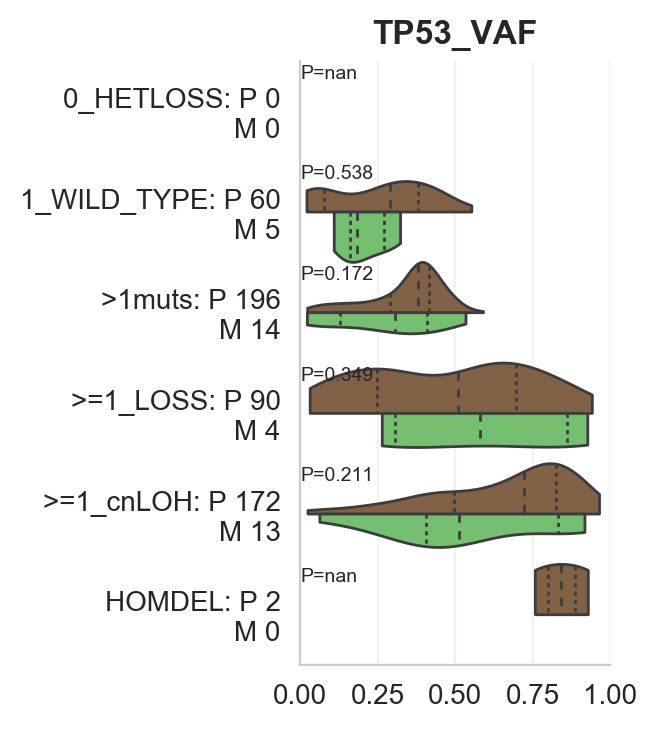

In [28]:
fig = plt.figure(figsize=(2,4))
ax = plt.subplot()


plot_mut_count_subgroups(master_cancer,
                         ax1=ax, 
                         cancer_type=cancer_type, 
                         metrics='tp53_vaf',
                         title='TP53_VAF',  
                         xlim=1, 
                         met_prim = None,
                         continuous=True,
                         tp53_metrics=True,
                         linewidth=1,
                         width=1,
                         hue=True)

In [580]:
get_groupby(master,'mutationStatus', 'count')

count
mutationStatus       
NA                535
SOMATIC         25637
UNKNOWN           241

In [582]:
master = master[master['Somatic_Status']!='Unmatched']

In [583]:
get_groupby(master,'mutationStatus', 'count')

count
mutationStatus       
NA                534
SOMATIC         25637
UNKNOWN            54

In [584]:
master_NA = master[master['mutationStatus'] == 'NA']
get_groupby(master_NA, 'tp53_group', 'NA status')

NA status
tp53_group           
0_HETLOSS          77
>=1_LOSS           11
>=1_cnLOH           5
HOMDEL             13

In [586]:
master_unknown = master[master['mutationStatus'] == 'UNKNOWN']
get_groupby(master_unknown, 'tp53_group', 'Unknown status')

Unknown status
tp53_group                
0_HETLOSS                6
>=1_LOSS                 7
>=1_cnLOH                5

In [588]:
master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
master_unmatched = master[master['Somatic_Status']=='Unmatched']
get_groupby(master_unmatched, 'tp53_cn_state', 'count')

count
tp53_cn_state             
AMP (BALANCED)           1
CNLOH                    1
CNLOH AFTER              1
CNLOH BEFORE             2
CNLOH BEFORE & LOSS      7
DIPLOID                 91
DOUBLE LOSS AFTER        4
GAIN                     4
HETLOSS                 43
HOMDEL                   2
INDETERMINATE           14
LOSS & GAIN              1
LOSS AFTER               3
LOSS BEFORE             17
LOSS BEFORE & AFTER      1
TETRAPLOID               1

In [590]:
display_side_by_side(get_groupby(master_unmatched, 'chr_affected', 'chr_aff_count'),
                     get_groupby(master_unmatched, 'chr_loss', 'chr_loss_count'),
                     get_groupby(master_unmatched, 'chr_cnloh', 'chr_cnloh_count'),
                     get_groupby(master_unmatched, 'chr_gain', 'chr_gain_count'))

chr_aff_count 
 
 
 chr_affected 
 
 
 
 
 
 0.0 
 2 
 
 
 1 
 11 
 
 
 2 
 11 
 
 
 3 
 17 
 
 
 4 
 20 
 
 
 5 
 13 
 
 
 6 
 12 
 
 
 7 
 11 
 
 
 8 
 9 
 
 
 9 
 14 
 
 
 10 
 4 
 
 
 11 
 5 
 
 
 12 
 8 
 
 
 13 
 7 
 
 
 14 
 6 
 
 
 15 
 1 
 
 
 16 
 3 
 
 
 17 
 4 
 
 
 18 
 2 
 
 
 19 
 7 
 
 
 20 
 11 
 
 
 21 
 13 
 
 
 22 
 3 
 
 
 NaN 
 4 
 
 
 
 
 
 
 chr_loss_count 
 
 
 chr_loss 
 
 
 
 
 
 0.0 
 22 
 
 
 1 
 39 
 
 
 2 
 23 
 
 
 3 
 17 
 
 
 4 
 7 
 
 
 5 
 13 
 
 
 6 
 10 
 
 
 7 
 4 
 
 
 8 
 5 
 
 
 9 
 5 
 
 
 10 
 4 
 
 
 11 
 5 
 
 
 12 
 8 
 
 
 13 
 5 
 
 
 14 
 5 
 
 
 16 
 3 
 
 
 17 
 3 
 
 
 18 
 4 
 
 
 19 
 2 
 
 
 20 
 5 
 
 
 21 
 4 
 
 
 22 
 1 
 
 
 NaN 
 4 
 
 
 
 
 
 
 chr_cnloh_count 
 
 
 chr_cnloh 
 
 
 
 
 
 0 
 74 
 
 
 1 
 55 
 
 
 2 
 31 
 
 
 3 
 14 
 
 
 4 
 4 
 
 
 5 
 6 
 
 
 6 
 7 
 
 
 7 
 2 
 
 
 8 
 1 
 
 
 NaN 
 4 
 
 
 
 
 
 
 chr_gain_count 
 
 
 chr_gain 
 
 
 
 
 
 0 
 28 
 
 
 1 
 41 
 
 
 2 
 36 
 
 
 3 
 23 
 
 
 4 
 27 
 
 
 5 
 11 
 
 
 6 
 7 
 
 
 7 
 5 
 
 
 8 
 6 
 
 
 9 
 6 
 
 
 10 
 3 
 
 
 17 
 1 
 
 
 NaN 
 4